In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/matches.csv')

## First we need to clean the data 

In [3]:
def join_dates(row):
    if row['date'] != None:
        return row['date']
    else:
        return row['estimatedDate']

In [4]:
df['date'] = df.apply(lambda row: join_dates(row), axis = 1)

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [6]:
df.loc[df['location'] == 'Bazaly', 'location'] = 'Bazaly, Ostrava'

In [7]:
df['city'] = df['location'].apply(lambda x: x.split(',')[-1].split('(')[0].strip() if isinstance(x, str) else x)

In [8]:
df.loc[df['city'] == 'Leningrad', 'city'] = 'Saint Petersburg'

In [9]:
df.loc[df['homeTeamUrl'] == 'Bohemian_F.C.', 'homeTeam'] = 'Bohemian F.C.'
df.loc[df['awayTeamUrl'] == 'Bohemian_F.C.', 'awayTeam'] = 'Bohemian F.C.'

In [10]:
sjednoceni = {
    'Praha': 'Prague',
    'Chişinău': 'Chisinau',
    'Chișinău': 'Chisinau',
    'Warszawa': 'Warsaw',
    'Moskva': 'Moscow',
    'Münich':'Munich',
    'Kiev': 'Kyiv',
    'Spartak Prague Sokolovo': 'Sparta Prague',
    'Bohemians ČKD Prague':'Bohemians Prague',
    'FC Carl Zeiss Jena': 'Carl Zeiss Jena',
    'F.C. Barcelona': 'Barcelona',
    'Internazionale': 'Inter Milan',
    '1. FC Kaiserslautern':'Kaiserslautern',
    'FC Sochaux':'Sochaux',
    'Zenit St Petersburg': 'Zenit Saint Petersburg',
    'AaB': 'Aalborg BK',
    'FK Partizan':'Partizan',
    'FC Barcelona':'Barcelona',
    'Banik Ostrava': 'Baník Ostrava',
    'București':'Bucharest',
    'Ploieşti':'Ploiești'
        }

In [11]:
for puvodni, spravny in sjednoceni.items():
    df['homeTeam'] = df['homeTeam'].apply(lambda x: str(x).replace(puvodni, spravny))
    df['awayTeam'] = df['awayTeam'].apply(lambda x: str(x).replace(puvodni, spravny))

In [12]:
intertoto = df[df['competition'] == 'Intertoto']

In [13]:
icfc = df[df['competition'] == 'ICFC']

In [14]:
df = df[df['competition'] != 'Intertoto']
df = df[df['competition'] != 'ICFC']
df = df[~df['score'].str.contains('Annulled',na=False)]

In [15]:
allseasons = df['season'].drop_duplicates().to_list()
allseasons.sort()

In [16]:
df[df['season'] == '1958-60']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city


## Now we're going to count the remaining teams for every stage/season/cup

(After cleaning the original data for two more days, this whole laptop baking adventure became sort of useless.)

In [17]:
compdates = df[['season','competition','date','homeTeam','awayTeam','phase']]

In [18]:
compdates

,season,competition,date,homeTeam,awayTeam,phase
0,1955-56,UCL,1955-09-04,Sporting CP,Partizan,first round
1,1955-56,UCL,1955-09-07,Vörös Lobogó,Anderlecht,first round
2,1955-56,UCL,1955-09-08,Servette,Real Madrid,first round
3,1955-56,UCL,1955-09-14,Rot-Weiss Essen,Hibernian,first round
4,1955-56,UCL,1955-09-20,Djurgården,Gwardia Warsaw,first round
...,...,...,...,...,...,...
27904,2024-25,UECL,2024-08-22,Rijeka,Olimpija Ljubljana,play-off round
27905,2024-25,UECL,2024-08-22,St Patrick's Athletic,İstanbul Başakşehir,play-off round
27906,2024-25,UECL,2024-08-22,St. Gallen,Trabzonspor,play-off round
27907,2024-25,UECL,2024-08-22,Víkingur Reykjavík,UE Santa Coloma,play-off round


In [19]:
first_match = pd.DataFrame(compdates.groupby(['season','competition','phase'])['date'].min()).reset_index()
first_match

,season,competition,phase,date
0,1955-56,UCL,final,1956-06-13
1,1955-56,UCL,first round,1955-09-04
2,1955-56,UCL,quarter-finals,1955-11-23
3,1955-56,UCL,semi-finals,1956-04-04
4,1956-57,UCL,final,1957-05-30
...,...,...,...,...
1113,2024-25,UCL,third qualifying round,2024-08-06
1114,2024-25,UECL,first qualifying round,2024-07-10
1115,2024-25,UECL,play-off round,2024-08-20
1116,2024-25,UECL,second qualifying round,2024-07-23


In [20]:
def remaining_phases(row):
    return df[(df['date'] >= row['date']) & (df['competition'] == row['competition']) & (df['season'] == row['season'])]['phase'].drop_duplicates().to_list()

In [21]:
first_match['remaining_phases'] = first_match.apply(lambda x: remaining_phases(x), axis=1)

In [22]:
first_match

,season,competition,phase,date,remaining_phases
0,1955-56,UCL,final,1956-06-13,[final]
1,1955-56,UCL,first round,1955-09-04,"[first round, quarter-finals, semi-finals, final]"
2,1955-56,UCL,quarter-finals,1955-11-23,"[quarter-finals, first round, semi-finals, final]"
3,1955-56,UCL,semi-finals,1956-04-04,"[semi-finals, final]"
4,1956-57,UCL,final,1957-05-30,[final]
...,...,...,...,...,...
1113,2024-25,UCL,third qualifying round,2024-08-06,"[third qualifying round, play-off round]"
1114,2024-25,UECL,first qualifying round,2024-07-10,"[first qualifying round, second qualifying rou..."
1115,2024-25,UECL,play-off round,2024-08-20,[play-off round]
1116,2024-25,UECL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying rou..."


In [23]:
def remaining_teams(row):
    rem_phases = row['remaining_phases']
    remaining_teams = []
    for r in rem_phases:
        ht = df[(df['competition'] == row['competition']) & (df['season'] == row['season']) & (df['phase'] == r)]['homeTeam'].drop_duplicates().to_list()
        at = df[(df['competition'] == row['competition']) & (df['season'] == row['season']) & (df['phase'] == r)]['awayTeam'].drop_duplicates().to_list()
        remaining_teams = remaining_teams + ht + at
    return list(set(remaining_teams))

In [24]:
first_match['remaining_teams'] = first_match.apply(lambda x: remaining_teams(x), axis=1)

In [25]:
first_match['remaining_teams_count'] = first_match['remaining_teams'].apply(lambda x: len(x))

In [26]:
df[(df['season'] == '1980-81') & (df['competition'] == 'EL')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city
4386,EL,1980-09-16,0-2,Sliema Wanderers,Malta,Sliema_Wanderers_F.C.,Barcelona,Spain,FC_Barcelona,"Ta' Qali National Stadium, Ta' Qali",first round,9094.0,NaN,1980%E2%80%9381 UEFA Cup,1980-81,Ta' Qali
4387,EL,1980-09-16,0-4,ÍA,Iceland,%C3%8D%C3%BEr%C3%B3ttabandalag_Akraness,Köln,West Germany,1._FC_K%C3%B6ln,"Akranesvöllur, Akranes",first round,3485.0,NaN,1980%E2%80%9381 UEFA Cup,1980-81,Akranes
4388,EL,1980-09-16,1-1,Újpest,Hungary,%C3%9Ajpest_FC,Real Sociedad,Spain,Real_Sociedad,"Ferenc Szusza Stadium, Budapest",first round,8500.0,NaN,1980%E2%80%9381 UEFA Cup,1980-81,Budapest
4389,EL,1980-09-17,6-0,AZ Alkmaar,Netherlands,AZ_Alkmaar,Red Boys Differdange,Luxembourg,FA_Red_Boys_Differdange,"Alkmaarderhout, Alkmaar",first round,4770.0,NaN,1980%E2%80%9381 UEFA Cup,1980-81,Alkmaar
4390,EL,1980-09-17,0-0,Argeș Pitești,Romania,FC_Arge%C8%99_Pite%C8%99ti,Utrecht,Netherlands,FC_Utrecht,"Stadionul 1 Mai, Pitești",first round,14000.0,NaN,1980%E2%80%9381 UEFA Cup,1980-81,Pitești
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,EL,1981-04-08,1-0,Ipswich Town,England,Ipswich_Town_F.C.,Köln,Germany,1._FC_K%C3%B6ln,"Portman Road, Ipswich",semi-finals,24780.0,NaN,1980%E2%80%9381 UEFA Cup,1980-81,Ipswich
4508,EL,1981-04-22,3-2,AZ Alkmaar,Netherlands,AZ_Alkmaar,Sochaux,France,FC_Sochaux-Montb%C3%A9liard,"Alkmaarderhout, Alkmaar",semi-finals,9085.0,NaN,1980%E2%80%9381 UEFA Cup,1980-81,Alkmaar
4509,EL,1981-04-22,0-1,Köln,Germany,1._FC_K%C3%B6ln,Ipswich Town,England,Ipswich_Town_F.C.,"Müngersdorfer Stadion, Cologne",semi-finals,55000.0,NaN,1980%E2%80%9381 UEFA Cup,1980-81,Cologne
4510,EL,1981-05-06,3-0,Ipswich Town,England,Ipswich_Town_F.C.,AZ Alkmaar,Netherlands,AZ_Alkmaar,"Portman Road, Ipswich",final,27532.0,NaN,1980%E2%80%9381 UEFA Cup,1980-81,Ipswich


In [27]:
first_match[first_match['remaining_teams_count'] == 5]['remaining_teams'].to_list()

[]

In [28]:
df[(df['competition'] == 'CWC')].groupby("season").size()

season
1960-61    18
1961-62    45
1962-63    50
1963-64    61
1964-65    58
1965-66    61
1966-67    61
1967-68    63
1968-69    53
1969-70    65
1970-71    66
1971-72    67
1972-73    60
1973-74    65
1974-75    61
1975-76    61
1976-77    63
1977-78    63
1978-79    69
1979-80    65
1980-81    44
1981-82    63
1982-83    65
1983-84    63
1984-85    62
1985-86    59
1986-87    61
1987-88    62
1988-89    63
1989-90    63
1990-91    63
1991-92    65
1992-93    69
1993-94    83
1994-95    85
1995-96    93
1996-97    95
1997-98    91
1998-99    95
dtype: int64

In [29]:
df[(df['competition'] == 'UCL') & (df['phase'] =='quarter-finals')].groupby("season").size().reindex(allseasons).head(50)

season
1955-56    8.0
1956-57    8.0
1957-58    8.0
1958-59    9.0
1959-60    9.0
1960-61    8.0
1961-62    9.0
1962-63    8.0
1963-64    8.0
1964-65    9.0
1965-66    8.0
1966-67    8.0
1967-68    9.0
1968-69    9.0
1969-70    8.0
1970-71    8.0
1971-72    8.0
1972-73    8.0
1973-74    8.0
1974-75    8.0
1975-76    8.0
1976-77    8.0
1977-78    8.0
1978-79    8.0
1979-80    8.0
1980-81    8.0
1981-82    8.0
1982-83    8.0
1983-84    8.0
1984-85    8.0
1985-86    8.0
1986-87    8.0
1987-88    8.0
1988-89    8.0
1989-90    8.0
1990-91    8.0
1991-92    NaN
1992-93    NaN
1993-94    NaN
1994-95    8.0
1995-96    NaN
1996-97    8.0
1997-98    8.0
1998-99    8.0
1999-00    8.0
2000-01    8.0
2001-02    8.0
2002-03    8.0
2003-04    8.0
2004-05    8.0
dtype: float64

In [30]:
df[(df['competition'] == 'CWC') & (df['phase'] =='quarter-finals')].groupby("season").size().reindex(allseasons).head(50)

season
1955-56     NaN
1956-57     NaN
1957-58     NaN
1958-59     NaN
1959-60     NaN
1960-61     8.0
1961-62     9.0
1962-63     9.0
1963-64     9.0
1964-65     8.0
1965-66     8.0
1966-67     8.0
1967-68    10.0
1968-69     8.0
1969-70     8.0
1970-71     8.0
1971-72     8.0
1972-73     7.0
1973-74     8.0
1974-75     8.0
1975-76     8.0
1976-77     8.0
1977-78     8.0
1978-79     8.0
1979-80     8.0
1980-81     8.0
1981-82     8.0
1982-83     8.0
1983-84     8.0
1984-85     8.0
1985-86     8.0
1986-87     8.0
1987-88     7.0
1988-89     8.0
1989-90     8.0
1990-91     8.0
1991-92     8.0
1992-93     8.0
1993-94     8.0
1994-95     8.0
1995-96     8.0
1996-97     8.0
1997-98     8.0
1998-99     8.0
1999-00     NaN
2000-01     NaN
2001-02     NaN
2002-03     NaN
2003-04     NaN
2004-05     NaN
dtype: float64

In [31]:
first_match[first_match['remaining_teams_count'].isin([1,3,5,7])]

,season,competition,phase,date,remaining_phases,remaining_teams,remaining_teams_count


In [32]:
first_match[first_match['remaining_teams_count'].isin([1,3,5,7,9,11,13,15,17,19,21,23])]

,season,competition,phase,date,remaining_phases,remaining_teams,remaining_teams_count
35,1961-62,CWC,preliminary round,1961-09-07,"[preliminary round, first round, quarter-final...","[St Patrick's Athletic, La Chaux-de-Fonds, Gle...",23
187,1973-74,UCL,second round,1973-10-24,"[second round, quarter-finals, semi-finals, fi...","[Atlético Madrid, Vejle, Basel, FC Basel, Ajax...",17
258,1978-79,CWC,second round,1978-10-18,"[second round, quarter-finals, semi-finals, fi...","[AS Nancy, Inter Milan, Servette FC, K.S.K. Be...",17
342,1982-83,UCL,second round,1982-10-19,"[second round, quarter-finals, semi-finals, fi...","[Hamburg, Aston Villa, Widzew Łódź, HJK Helsin...",15
407,1986-87,UCL,second round,1986-10-22,"[second round, quarter-finals, semi-finals, fi...","[Brøndby, BFC Dynamo, Beşiktaş, Vítkovice, Dyn...",15
1020,2021-22,EL,knockout round play-offs,2022-02-17,"[knockout round play-offs, round of 16, quarte...","[Bayer Leverkusen, Napoli, Red Star Belgrade, ...",23
1023,2021-22,EL,round of 16,2022-03-09,"[round of 16, quarter-finals, semi-finals, final]","[Braga, Bayer Leverkusen, Galatasaray, Real Be...",15


In [33]:
first_match[first_match['remaining_teams_count'].isin([1,3,5,7,9,11,13,15,17,19,21,23])].iloc[1]['remaining_teams']

['Atlético Madrid',
 'Vejle',
 'Basel',
 'FC Basel',
 'Ajax',
 'Red Star Belgrade',
 'CSKA September Flag',
 'Celtic',
 'Spartak Trnava',
 'Bayern Munich',
 'Liverpool',
 'Zorya Voroshilovgrad',
 'Újpesti Dózsa',
 'Club Brugge',
 'Dynamo Dresden',
 'Benfica',
 'Dinamo Bucharest']

In [34]:
df[(df['season'] == '1995-96') & (df['homeTeam'] == 'Dynamo Kyiv')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city
8670,UCL,1995-08-09,1-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Aalborg BK,Denmark,AaB_Fodbold,"Republican Stadium, Kyiv",qualifying round,61000.0,NaN,1995%E2%80%9396 UEFA Champions League qualifyi...,1995-96,Kyiv


In [35]:
first_match[first_match['remaining_teams_count'].isin([1,3,5,7,9,11,13,15,17,19,21,23])].iloc[-2]['remaining_teams']

['Bayer Leverkusen',
 'Napoli',
 'Red Star Belgrade',
 'Sheriff Tiraspol',
 'Galatasaray',
 'Sevilla',
 'Real Betis',
 'Real Sociedad',
 'Lyon',
 'Porto',
 'Zenit Saint Petersburg',
 'Braga',
 'Eintracht Frankfurt',
 'Dinamo Zagreb',
 'Monaco',
 'West Ham United',
 'Olympiacos',
 'Lazio',
 'Borussia Dortmund',
 'Barcelona',
 'Atalanta',
 'Rangers',
 'RB Leipzig']

In [36]:
first_match

,season,competition,phase,date,remaining_phases,remaining_teams,remaining_teams_count
0,1955-56,UCL,final,1956-06-13,[final],"[Reims, Real Madrid]",2
1,1955-56,UCL,first round,1955-09-04,"[first round, quarter-finals, semi-finals, final]","[Servette, Hibernian, Rapid Wien, Partizan, Re...",16
2,1955-56,UCL,quarter-finals,1955-11-23,"[quarter-finals, first round, semi-finals, final]","[Servette, Hibernian, Rapid Wien, Partizan, Re...",16
3,1955-56,UCL,semi-finals,1956-04-04,"[semi-finals, final]","[Milan, Hibernian, Reims, Real Madrid]",4
4,1956-57,UCL,final,1957-05-30,[final],"[Fiorentina, Real Madrid]",2
...,...,...,...,...,...,...,...
1113,2024-25,UCL,third qualifying round,2024-08-06,"[third qualifying round, play-off round]","[Red Bull Salzburg, Midtjylland, Red Star Belg...",24
1114,2024-25,UECL,first qualifying round,2024-07-10,"[first qualifying round, second qualifying rou...","[St Joseph's, Inter Club d'Escaldes, Vaduz, AE...",152
1115,2024-25,UECL,play-off round,2024-08-20,[play-off round],"[Celje, Maribor, KÍ, St Patrick's Athletic, Zi...",48
1116,2024-25,UECL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying rou...","[Inter Club d'Escaldes, Vaduz, AEK Larnaca, St...",127


In [37]:
df = df.merge(first_match[['competition','season','phase','remaining_teams_count']], on=['competition','season','phase'], how='outer')

In [38]:
df.loc[df['season'] == '2024-25', 'remaining_teams_count'] = None

In [39]:
df[df['phase'] == 'quarter-finals'].groupby(['season','competition'])['homeTeam'].nunique().nsmallest(10)

season   competition
2019-20  EL             4
         UCL            4
1972-73  CWC            7
1987-88  CWC            7
1955-56  UCL            8
1956-57  UCL            8
1957-58  UCL            8
1958-59  UCL            8
1959-60  UCL            8
1960-61  CWC            8
Name: homeTeam, dtype: int64

In [40]:
df[df['phase'] == 'semi-finals'].groupby(['season','competition'])['homeTeam'].nunique().nlargest(10)

season   competition
1955-56  UCL            4
1956-57  UCL            4
1957-58  UCL            4
1958-59  UCL            4
1959-60  UCL            4
1960-61  CWC            4
         UCL            4
1961-62  CWC            4
         UCL            4
1962-63  CWC            4
Name: homeTeam, dtype: int64

In [41]:
df[(df['phase'] == 'semi-finals') & (df['competition'] == 'CWC') & (df['season'] == '1978-79')]['awayTeam'].drop_duplicates().to_list()

['K.S.K. Beveren', 'Baník Ostrava', 'Fortuna Düsseldorf', 'Barcelona']

In [42]:
df.loc[df['phase'] == 'quarter-finals', 'remaining_teams_count'] = 8
df.loc[df['phase'] == 'semi-finals', 'remaining_teams_count'] = 4
df.loc[df['remaining_teams_count'] == 0, 'remaining_teams_count'] = None

In [43]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count
0,CWC,1961-05-17,0-2,Rangers,Scotland,Rangers_F.C.,Fiorentina,Italy,ACF_Fiorentina,"Ibrox Park, Glasgow",final,80000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Glasgow,2.0
1,CWC,1961-05-27,2-1,Fiorentina,Italy,NaN,Rangers,Scotland,NaN,"Stadio Comunale, Florence",final,27000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Florence,2.0
2,CWC,1960-08-01,2-1,ASK Vorwärts Berlin,East Germany,FC_Viktoria_Frankfurt,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,"Stadion der Freundschaft, Frankfurt (Oder)",preliminary round,8000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Frankfurt,10.0
3,CWC,1960-08-11,2-0,Rudá Hvězda Brno,Czechoslovakia,NaN,ASK Vorwärts Berlin,East Germany,NaN,"Stadion Za Lužánkami, Brno",preliminary round,15000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Brno,10.0
4,CWC,1960-09-28,4-2,Rangers,Scotland,Rangers_F.C.,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"Ibrox Park, Glasgow",preliminary round,36000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Glasgow,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25722,UECL,2024-08-15,3-1,Wisła Kraków,Poland,NaN,Spartak Trnava,Slovakia,NaN,"Henryk Reyman Stadium, Kraków",third qualifying round,15099.0,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Kraków,NaN
25723,UECL,2024-08-15,2-2,Zira,Azerbaijan,NaN,Osijek,Croatia,NaN,"Dalga Arena, Baku",third qualifying round,4000.0,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Baku,NaN
25724,UECL,2024-08-15,2-0,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",third qualifying round,5300.0,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Mostar,NaN
25725,UECL,2024-08-15,2-0,İstanbul Başakşehir,Turkey,NaN,Iberia 1999,Georgia,NaN,"Başakşehir Fatih Terim Stadium, Istanbul",third qualifying round,4735.0,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Istanbul,NaN


## Better to check for errors

<Axes: xlabel='season'>

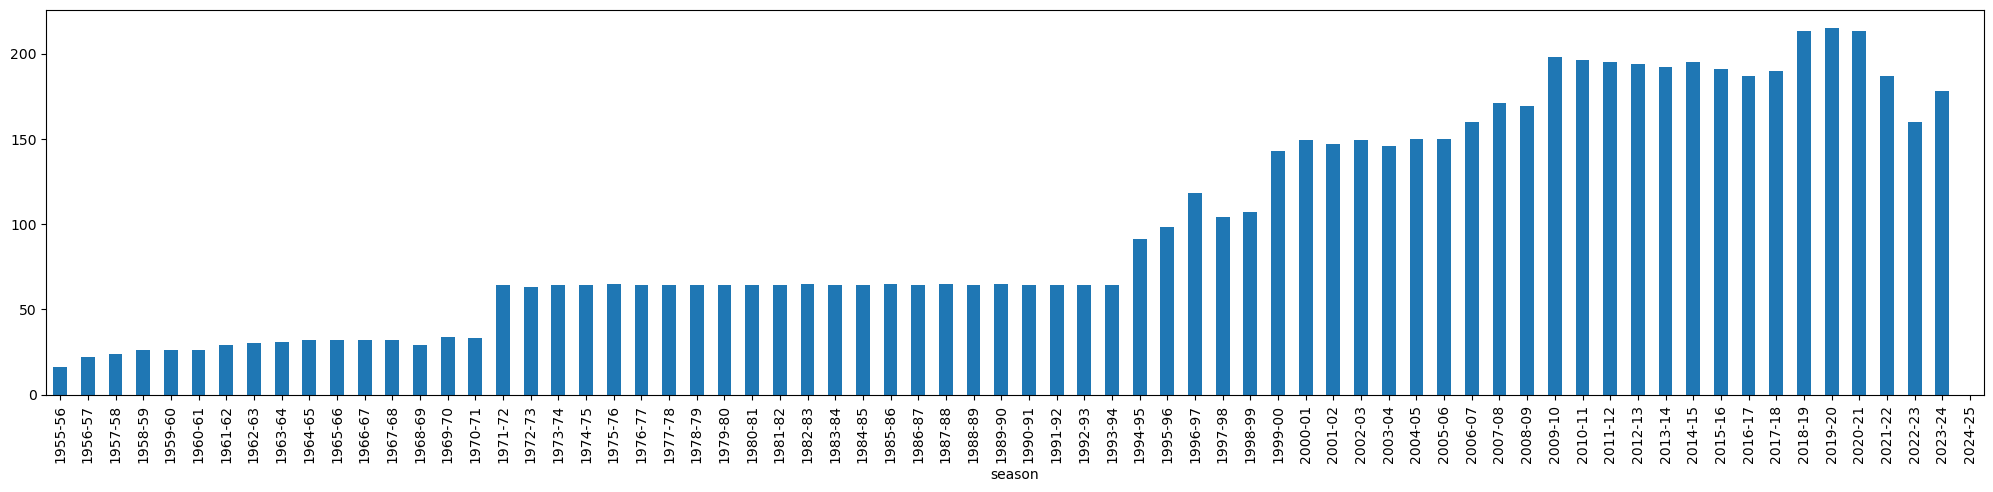

In [44]:
df.groupby('season')['remaining_teams_count'].max().plot.bar(figsize=(25,5))

In [45]:
df.groupby('remaining_teams_count').size().nlargest(16)

remaining_teams_count
32.0     4988
16.0     2577
56.0     1578
8.0      1350
64.0     1302
4.0       645
40.0      608
48.0      516
33.0      491
57.0      486
31.0      396
65.0      386
49.0      338
105.0     335
24.0      297
62.0      293
dtype: int64

## Let's find all Eastern European clubs

In [46]:
easternCountries = ['Hungary','Poland','Socialist Federal Republic of Yugoslavia','Romania','Czechoslovakia','Bulgaria','East Germany','Albania','Soviet Union','Commonwealth of Independent States','Slovenia','Estonia','Latvia','Ukraine','Russia','Lithuania','Georgia (country)','Moldova','Croatia','Belarus','Czech Republic','Federal Republic of Yugoslavia','North Macedonia','Armenia','Azerbaijan','Slovakia','Bosnia and Herzegovina','Kazakhstan','Serbia and Montenegro','Serbia','Montenegro','Kosovo']

In [47]:
easternClubs_wo_Germany = df[df['homeTeamCountry'].isin(easternCountries)]['homeTeam'].to_list()

In [48]:
easternGermanUrls = ['RB_Leipzig','1._FC_Union_Berlin','1._FC_Magdeburg','Hallescher_FC','FC_Rot-Wei%C3%9F_Erfurt']

In [49]:
easternGermanClubs = df[df['homeTeamCountry'] == 'East Germany']['homeTeam'].drop_duplicates().to_list() + df[df['homeTeamUrl'].isin(easternGermanUrls)]['homeTeam'].drop_duplicates().to_list()

In [50]:
easternGermanClubs

['ASK Vorwärts Berlin',
 'Motor Jena',
 'Chemie Halle-Leuna',
 'Motor Zwickau',
 'Aufbau Magdeburg',
 '1. FC Magdeburg',
 'BSG Chemie Leipzig',
 'BSG Sachsenring Zwickau',
 'Vorwärts Berlin',
 'BFC Dynamo',
 'Carl Zeiss Jena',
 'Magdeburg',
 'Sachsenring Zwickau',
 '1. FC Lokomotive Leipzig',
 'Lokomotive Leipzig',
 'Dynamo Dresden',
 'PSV Schwerin',
 'Chemie Halle',
 'Vorwärts Frankfurt',
 'Wismut Aue',
 'Stahl Brandenburg',
 'Hansa Rostock',
 'Karl-Marx-Stadt',
 'Chemnitzer FC',
 'Wismut Karl-Marx-Stadt',
 'SC Chemie Leipzig',
 'Chemie Halle-Leuna',
 'Aufbau Magdeburg',
 '1. FC Magdeburg',
 'Magdeburg',
 'Chemie Halle',
 'Hallescher FC',
 'Rot-Weiß Erfurt',
 'Union Berlin',
 'RB Leipzig']

In [51]:
easternClubs = easternClubs_wo_Germany + easternGermanClubs

In [52]:
[x for x in easternClubs if 'adbach' in x] 

[]

In [53]:
east = df[df['homeTeam'].isin(easternClubs)]
east2 =  df[df['homeTeam'].isin(easternClubs) | df['awayTeam'].isin(easternClubs)]
four = df[df['homeTeamCountry'].isin(['Germany','West Germany','Italy','Spain','England'])]

## Now for some basic exploration

<Axes: xlabel='season'>

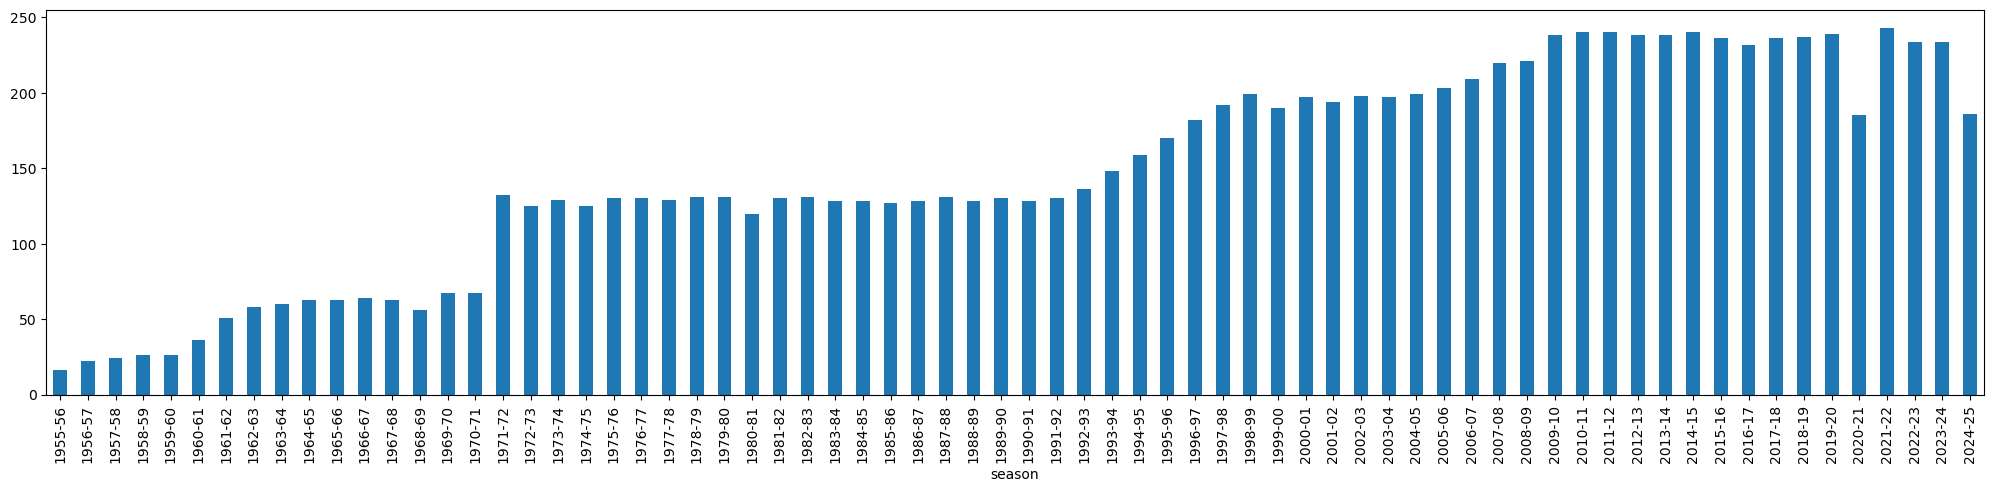

In [54]:
df.groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

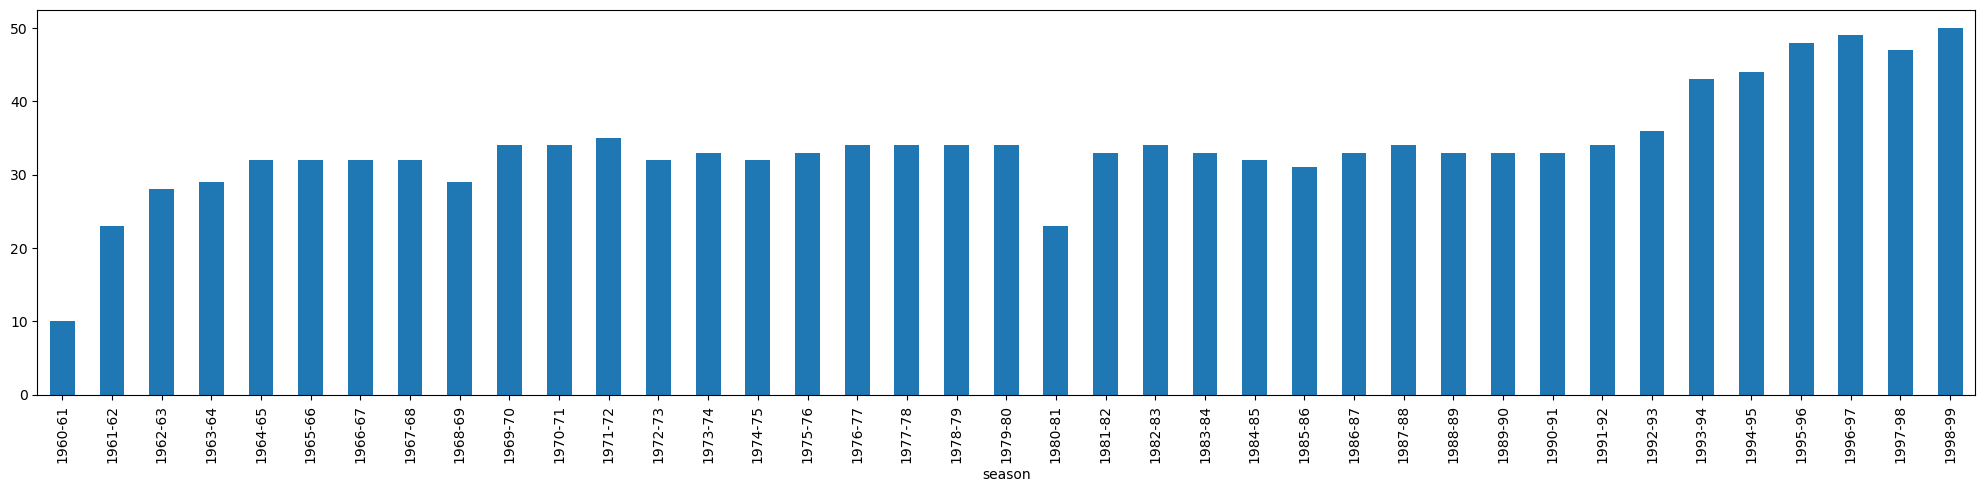

In [55]:
df[df['competition'] == 'CWC'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

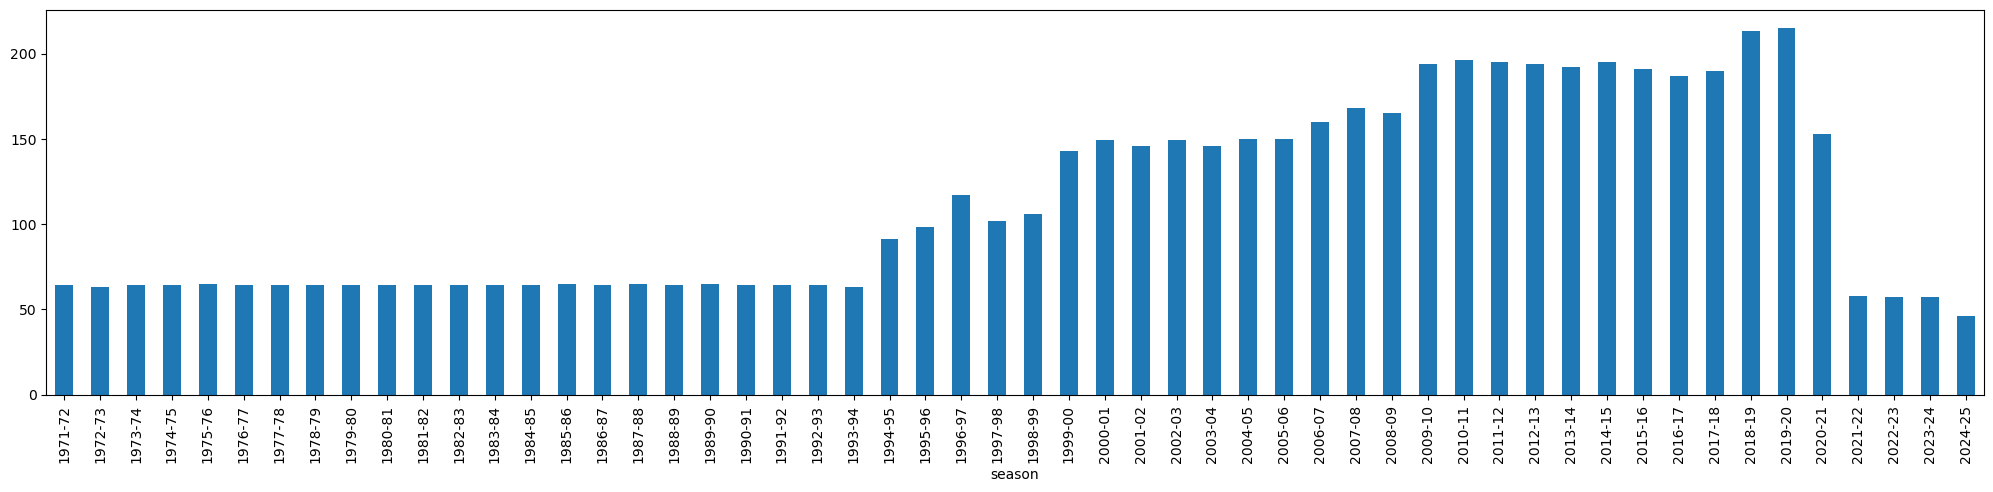

In [56]:
df[df['competition'] == 'EL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

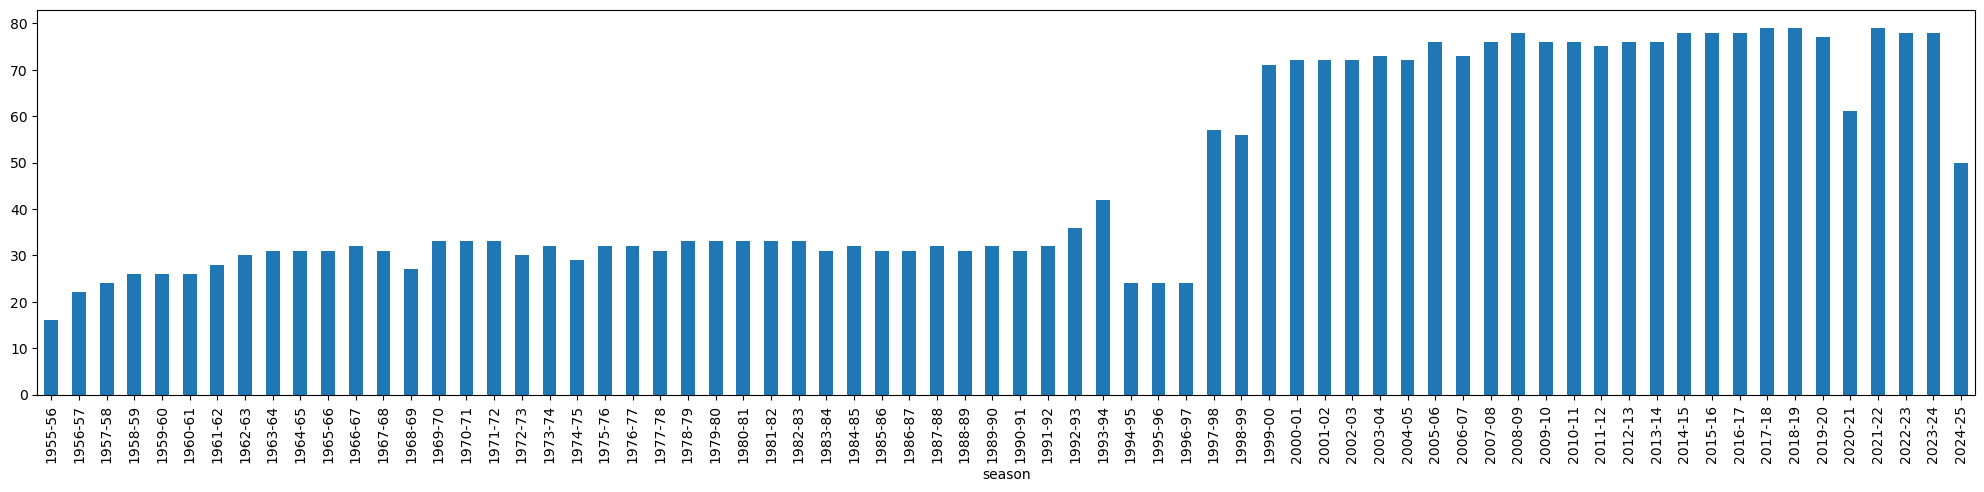

In [57]:
df[df['competition'] == 'UCL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

In [58]:
east[east['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(10)

homeTeam
Dynamo Kyiv          131
Red Star Belgrade     79
Shakhtar Donetsk      79
Sparta Prague         76
Steaua Bucharest      70
Dinamo Zagreb         68
Spartak Moscow        61
Partizan              53
BATE Borisov          52
CSKA Moscow           52
dtype: int64

In [59]:
east.groupby('city').size().nlargest(60)

city
Belgrade            361
Prague              339
Moscow              338
Bucharest           332
Sofia               303
Budapest            291
Kyiv                222
Baku                188
Zagreb              176
Warsaw              143
Bratislava          142
Skopje              141
Yerevan             141
Tallinn             131
Tirana              108
Donetsk              98
Split                98
Riga                 95
Saint Petersburg     94
Tbilisi              93
Maribor              92
Tiraspol             90
Minsk                89
Sarajevo             87
Chișinău             77
Vilnius              71
Podgorica            67
Plzeň                64
Razgrad              63
Kraków               62
Poznań               62
Cluj-Napoca          61
Leipzig              59
Trnava               58
Ljubljana            57
Rijeka               52
Barysaw              48
Chorzów              47
Žilina               47
Craiova              46
Dresden              46
Astana     

In [60]:
east[east['competition'] == 'UCL'].sort_values(by='remaining_teams_count').sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count
17926,UCL,1991-05-29,0-0,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Marseille,France,Olympique_de_Marseille,"Stadio San Nicola, Bari",final,51587.0,NaN,1990%E2%80%9391 European Cup,1990-91,Bari,2.0
17628,UCL,1986-05-07,0-0,Steaua Bucharest,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Barcelona,Spain,FC_Barcelona,"Estadio Ramón Sánchez Pizjuán, Seville",final,65000.0,NaN,1985%E2%80%9386 European Cup,1985-86,Seville,2.0
17805,UCL,1989-05-24,0-4,Steaua Bucharest,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Milan,Italy,AC_Milan,"Camp Nou, Barcelona",final,97000.0,NaN,1988%E2%80%9389 European Cup,1988-89,Barcelona,2.0
17984,UCL,1991-04-24,2-2,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Bayern Munich,Germany,FC_Bayern_Munich,"Marakana, Belgrade",semi-finals,79684.0,NaN,1990%E2%80%9391 European Cup,1990-91,Belgrade,4.0
15968,UCL,1957-04-03,0-1,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Fiorentina,Italy,ACF_Fiorentina,"Stadion JNA, Belgrade",semi-finals,40000.0,NaN,1956%E2%80%9357 European Cup,1956-57,Belgrade,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24171,UCL,2024-08-07,3-1,Slavia Prague,Czech Republic,SK_Slavia_Prague,Union Saint-Gilloise,Belgium,Royale_Union_Saint-Gilloise,"Fortuna Arena, Prague",third qualifying round,18470.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Prague,NaN
24172,UCL,2024-08-07,2-0,Slovan Bratislava,Slovakia,%C5%A0K_Slovan_Bratislava,APOEL,Cyprus,APOEL_FC,"Národný futbalový štadión, Bratislava",third qualifying round,20404.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Bratislava,NaN
24175,UCL,2024-08-13,2-3,FCSB,Romania,NaN,Sparta Prague,Czech Republic,NaN,"Steaua Stadium, Bucharest",third qualifying round,28875.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Bucharest,NaN
24177,UCL,2024-08-13,1-1,Ferencváros,Hungary,NaN,Midtjylland,Denmark,NaN,"Ferencváros Stadion, Budapest",third qualifying round,18027.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Budapest,NaN


In [61]:
east2.sort_values(by='remaining_teams_count').sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count
9226,EL,2009-05-20,2-1,Shakhtar Donetsk,Ukraine,FC_Shakhtar_Donetsk,Werder Bremen,Germany,SV_Werder_Bremen,"Şükrü Saracoğlu Stadium, Istanbul",final,37357.0,NaN,2008%E2%80%9309 UEFA Cup knockout stage,2008-09,Istanbul,2.0
8867,EL,2008-05-14,2-0,Zenit Saint Petersburg,Russia,FC_Zenit_Saint_Petersburg,Rangers,Scotland,Rangers_F.C.,"City of Manchester Stadium, Manchester",final,43878.0,NaN,2007%E2%80%9308 UEFA Cup knockout stage,2007-08,Manchester,2.0
3394,EL,1979-05-23,1-0,Borussia Mönchengladbach,West Germany,Borussia_M%C3%B6nchengladbach,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,"Rheinstadion, Düsseldorf",final,45000.0,NaN,1978%E2%80%9379 UEFA Cup,1978-79,Düsseldorf,2.0
114,CWC,1964-05-15,1-0,Sporting CP,Portugal,Sporting_CP,MTK Budapest,Hungary,MTK_Budapest_FC,"Bosuil Stadium, Antwerp",final,13924.0,NaN,1963%E2%80%9364 European Cup Winners%27 Cup,1963-64,Antwerp,2.0
417,CWC,1969-05-21,3-2,Slovan Bratislava,Czechoslovakia,%C5%A0K_Slovan_Bratislava,Barcelona,Spain,FC_Barcelona,"St. Jakob Stadium, Basel",final,19000.0,NaN,1968%E2%80%9369 European Cup Winners%27 Cup,1968-69,Basel,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25721,UECL,2024-08-15,1-0,Vojvodina,Serbia,NaN,Maribor,Slovenia,NaN,"TSC Arena, Bačka Topola",third qualifying round,1900.0,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Bačka Topola,NaN
25722,UECL,2024-08-15,3-1,Wisła Kraków,Poland,NaN,Spartak Trnava,Slovakia,NaN,"Henryk Reyman Stadium, Kraków",third qualifying round,15099.0,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Kraków,NaN
25723,UECL,2024-08-15,2-2,Zira,Azerbaijan,NaN,Osijek,Croatia,NaN,"Dalga Arena, Baku",third qualifying round,4000.0,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Baku,NaN
25724,UECL,2024-08-15,2-0,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",third qualifying round,5300.0,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Mostar,NaN


<Axes: xlabel='season'>

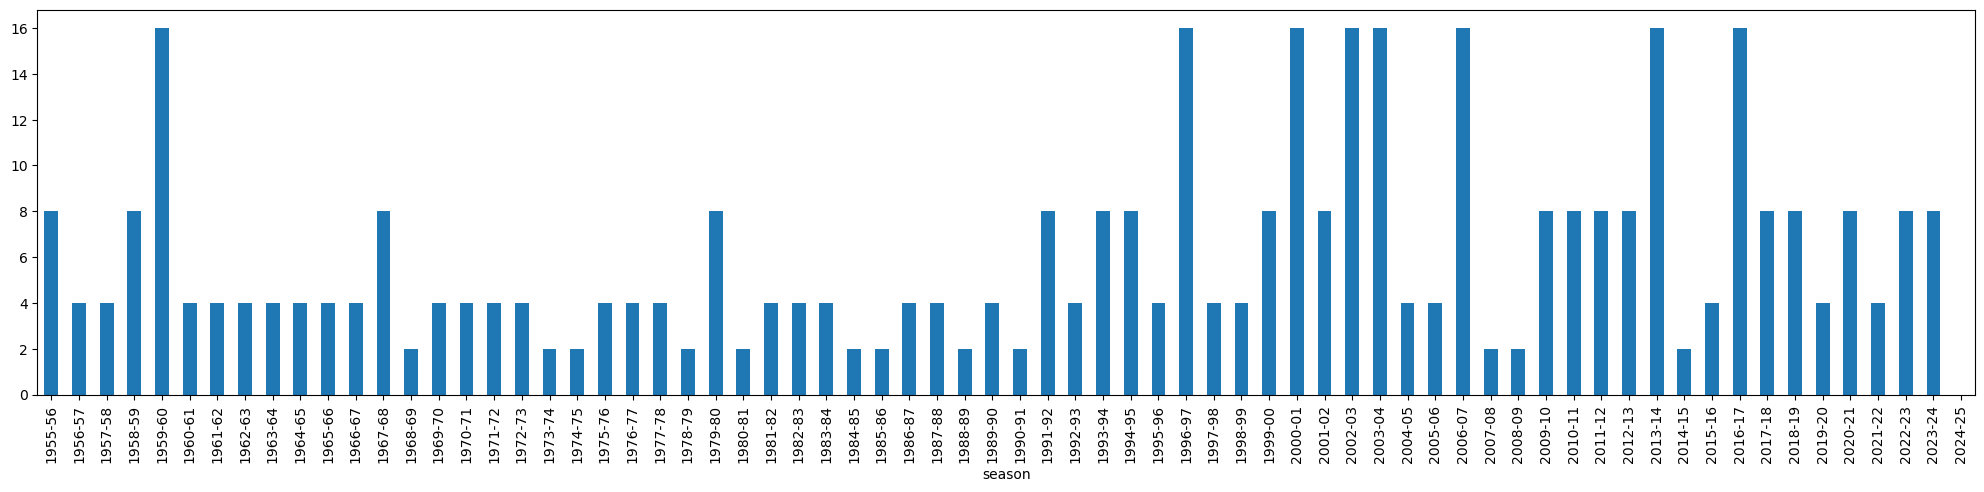

In [62]:
east.groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

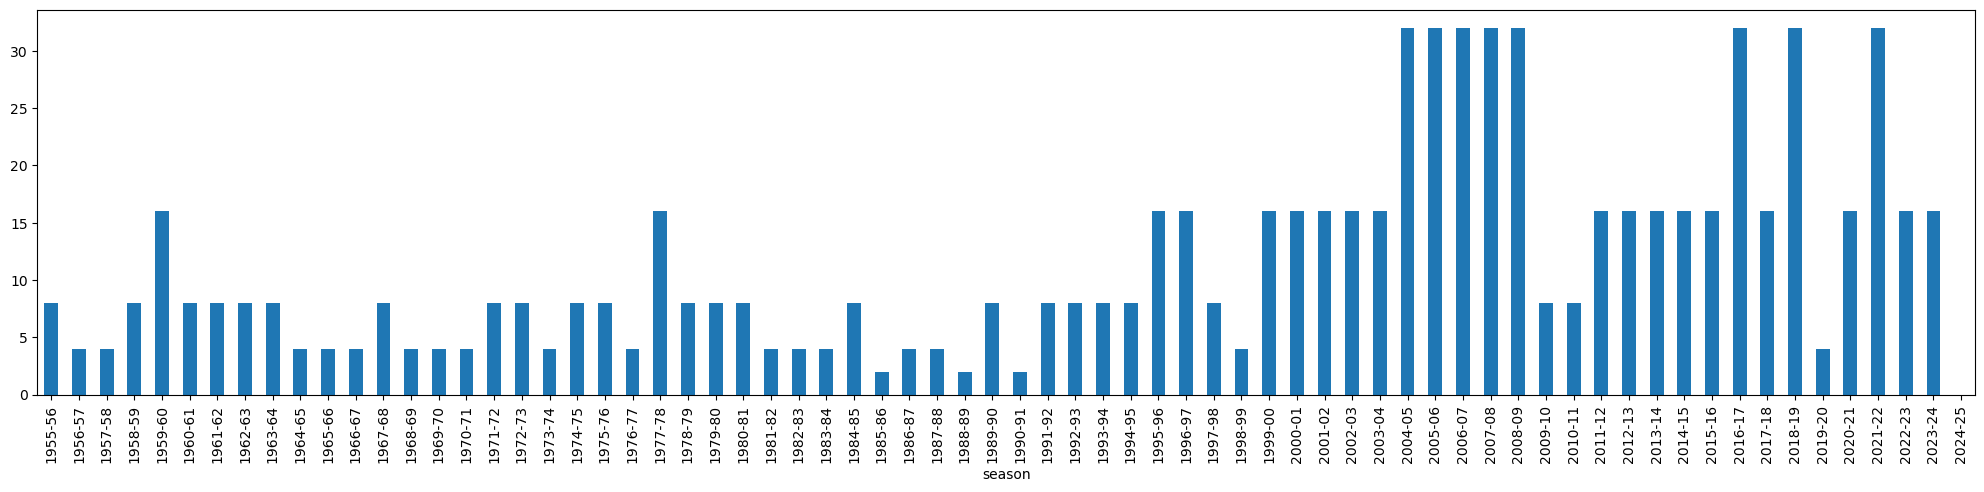

In [63]:
east[east['competition'] == 'UCL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

In [64]:
east[east['homeTeamCountry'] == 'Republic of Ireland']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count


In [65]:
east[east['competition'] == 'UCL'].groupby('homeTeamCountry')['remaining_teams_count'].min().nsmallest(50)

homeTeamCountry
Socialist Federal Republic of Yugoslavia     2.0
Romania                                      2.0
Ukraine                                      4.0
Poland                                       4.0
Bulgaria                                     4.0
Soviet Union                                 4.0
Czechoslovakia                               4.0
Hungary                                      4.0
Germany                                      4.0
Russia                                       8.0
Commonwealth of Independent States           8.0
Croatia                                      8.0
East Germany                                 8.0
Albania                                     16.0
Czech Republic                              16.0
Slovakia                                    24.0
Kazakhstan                                  32.0
Slovenia                                    32.0
Latvia                                      32.0
Lithuania                                   32.0
Mold

<Axes: xlabel='season'>

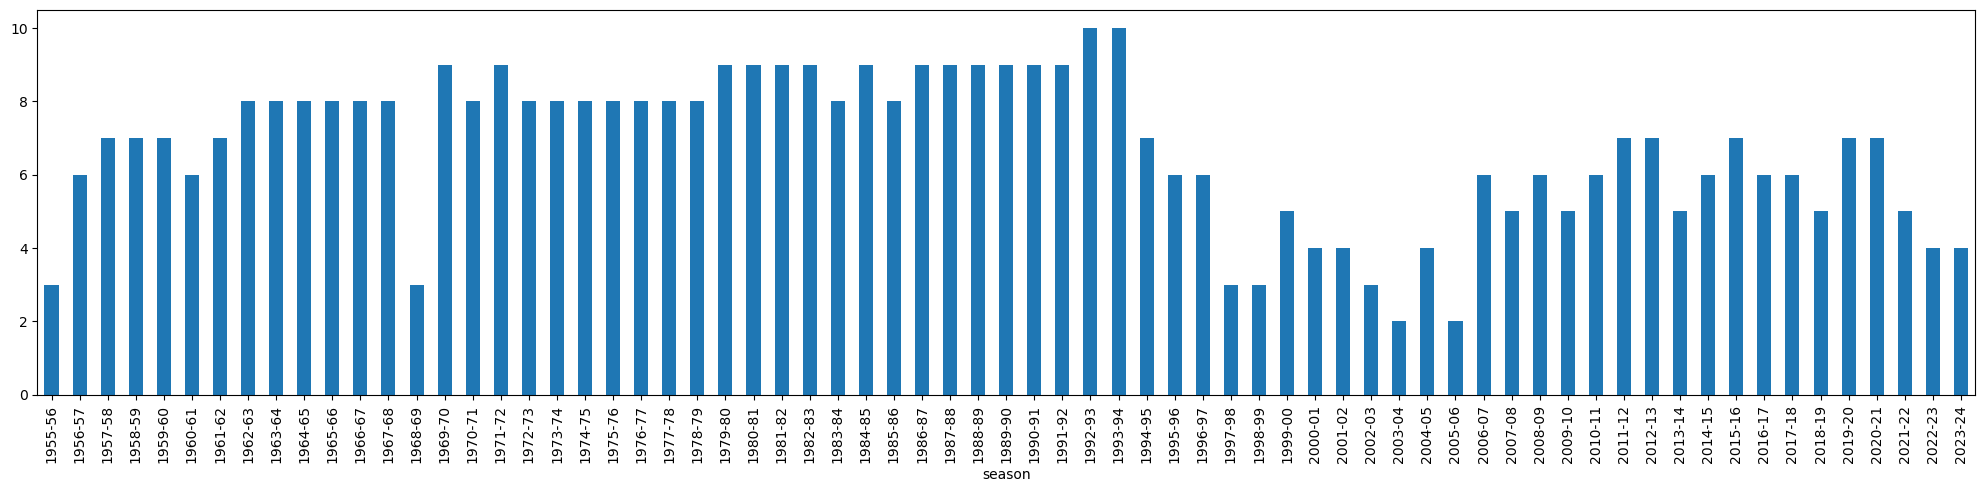

In [66]:
east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 32)].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

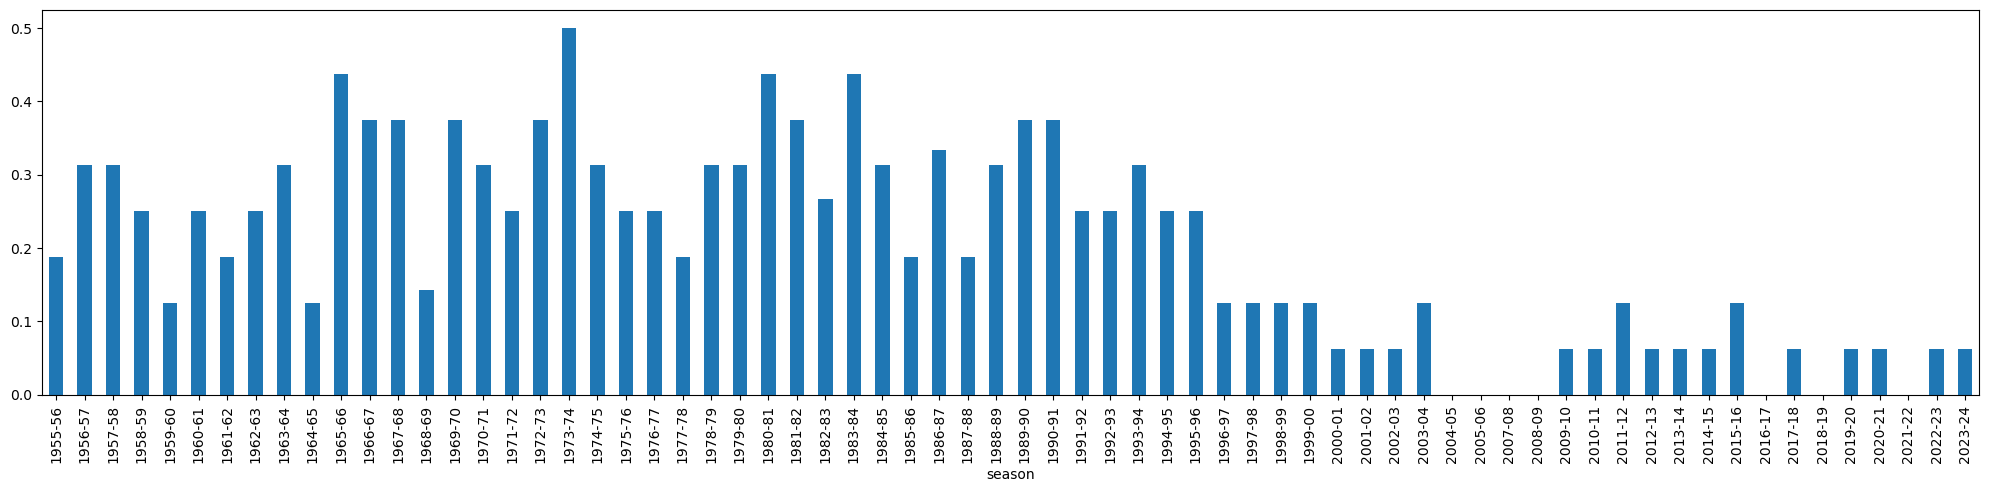

In [67]:
pd.Series(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'UCL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

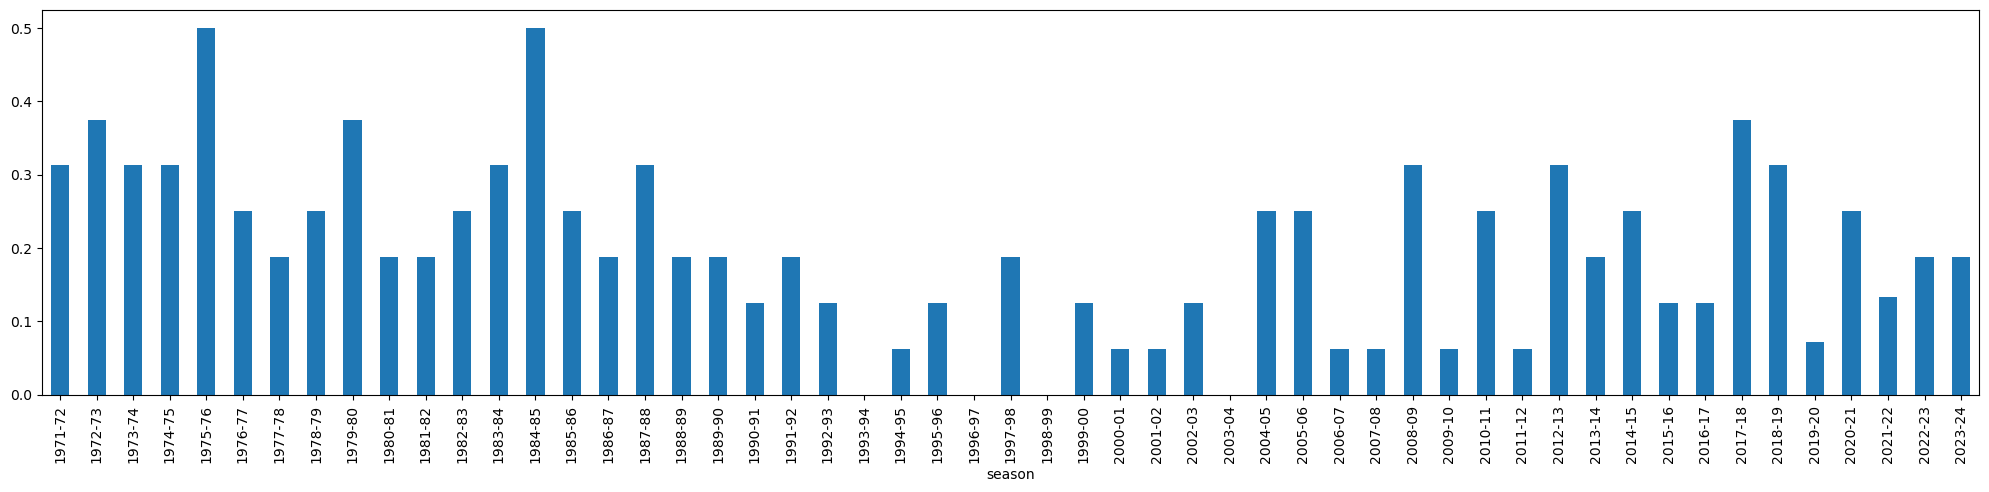

In [68]:
pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'EL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

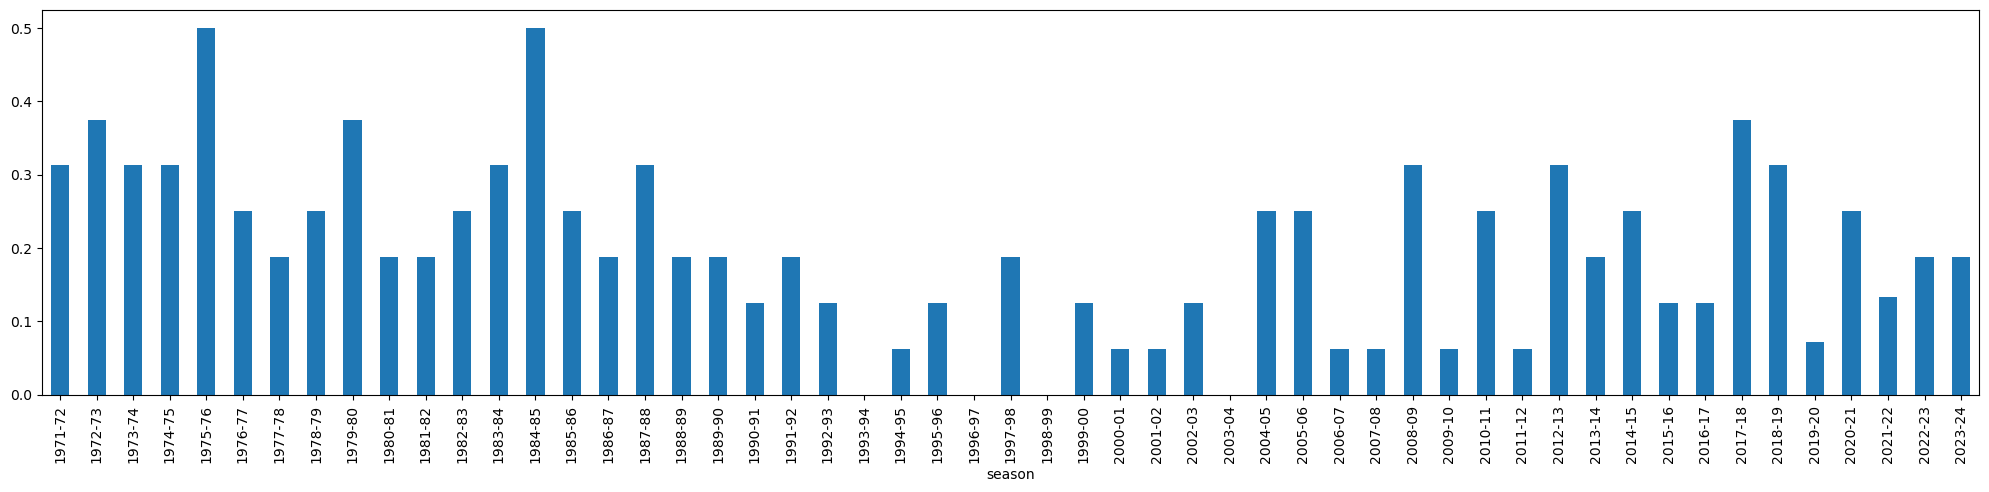

In [69]:
pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'EL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

In [70]:
east[(east['competition'] == 'UCL') & (east['season'] == '1991-92')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(10)

homeTeam
Dynamo Kyiv               8.0
Red Star Belgrade         8.0
Sparta Prague             8.0
Kispest Honvéd           16.0
Etar Veliko Tarnovo      32.0
Flamurtari               32.0
Hansa Rostock            32.0
Universitatea Craiova    32.0
Zagłębie Lubin           32.0
Name: remaining_teams_count, dtype: float64

In [71]:
half = len(df[df['competition'] == 'UCL'].groupby('season').size()) / 2

In [72]:
df[df['competition'] == 'UCL'].groupby('season').size().head(35)

season
1955-56    29
1956-57    44
1957-58    48
1958-59    55
1959-60    52
1960-61    51
1961-62    55
1962-63    59
1963-64    61
1964-65    63
1965-66    59
1966-67    65
1967-68    60
1968-69    52
1969-70    63
1970-71    63
1971-72    64
1972-73    57
1973-74    60
1974-75    55
1975-76    61
1976-77    61
1977-78    59
1978-79    63
1979-80    63
1980-81    63
1981-82    63
1982-83    61
1983-84    59
1984-85    61
1985-86    59
1986-87    57
1987-88    61
1988-89    60
1989-90    61
dtype: int64

In [73]:
east[(east['competition'] == 'UCL') & (east['season'] == '1992-93')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(10)

homeTeam
CSKA Moscow            8.0
Dinamo Bucharest      16.0
Lech Poznań           16.0
Slovan Bratislava     16.0
CSKA Sofia            32.0
Ferencváros           32.0
Olimpija Ljubljana    32.0
Skonto                32.0
Tavriya Simferopol    32.0
Žalgiris              32.0
Name: remaining_teams_count, dtype: float64

In [74]:
east[(east['competition'] == 'UCL') & (east['season'] > '1989-90') & (east['remaining_teams_count'] <= 32)].groupby('homeTeam').size().nlargest(16)

homeTeam
Dynamo Kyiv               67
Shakhtar Donetsk          59
Spartak Moscow            45
CSKA Moscow               41
Sparta Prague             34
Zenit Saint Petersburg    30
Steaua Bucharest          26
RB Leipzig                24
Lokomotiv Moscow          19
Red Star Belgrade         19
Dinamo Zagreb             18
BATE Borisov              15
Viktoria Plzeň            12
CFR Cluj                   9
Ferencváros                9
Maribor                    9
dtype: int64

In [75]:
pd.Series(east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby('homeTeam').size() / east[(east['competition'] == 'UCL') & (east['season'] > '1989-90')].groupby('homeTeam').size()).sort_values().dropna()

homeTeam
Dinamo Zagreb             0.030303
CSKA Moscow               0.040000
Vardar                    0.090909
Levski Sofia              0.105263
Dinamo Tbilisi            0.105263
Spartak Moscow            0.109091
Lech Poznań               0.181818
Slovan Bratislava         0.181818
Wisła Kraków              0.230769
Sparta Prague             0.245902
Dynamo Kyiv               0.247619
Legia Warsaw              0.275862
Ferencváros               0.310345
Dinamo Tirana             0.400000
Steaua Bucharest          0.428571
Partizan                  0.432432
Vllaznia                  0.500000
ŁKS Łódź                  0.500000
Željezničar               0.500000
Śląsk Wrocław             0.500000
Sarajevo                  0.600000
Dinamo Minsk              0.600000
Widzew Łódź               0.625000
Red Star Belgrade         0.755556
Hajduk Split              0.818182
Rapid Bucharest           1.000000
Partizani                 1.400000
MTK Budapest              2.000000
CSKA Sofia 

<Axes: xlabel='season', ylabel='remaining_teams_count'>

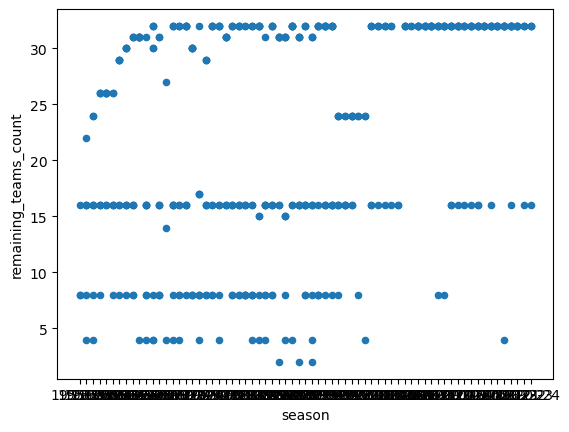

In [76]:
pd.DataFrame(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 32)].groupby(['season','homeTeam'])['remaining_teams_count'].min()).reset_index().plot.scatter(x='season',y='remaining_teams_count')

<Axes: xlabel='season'>

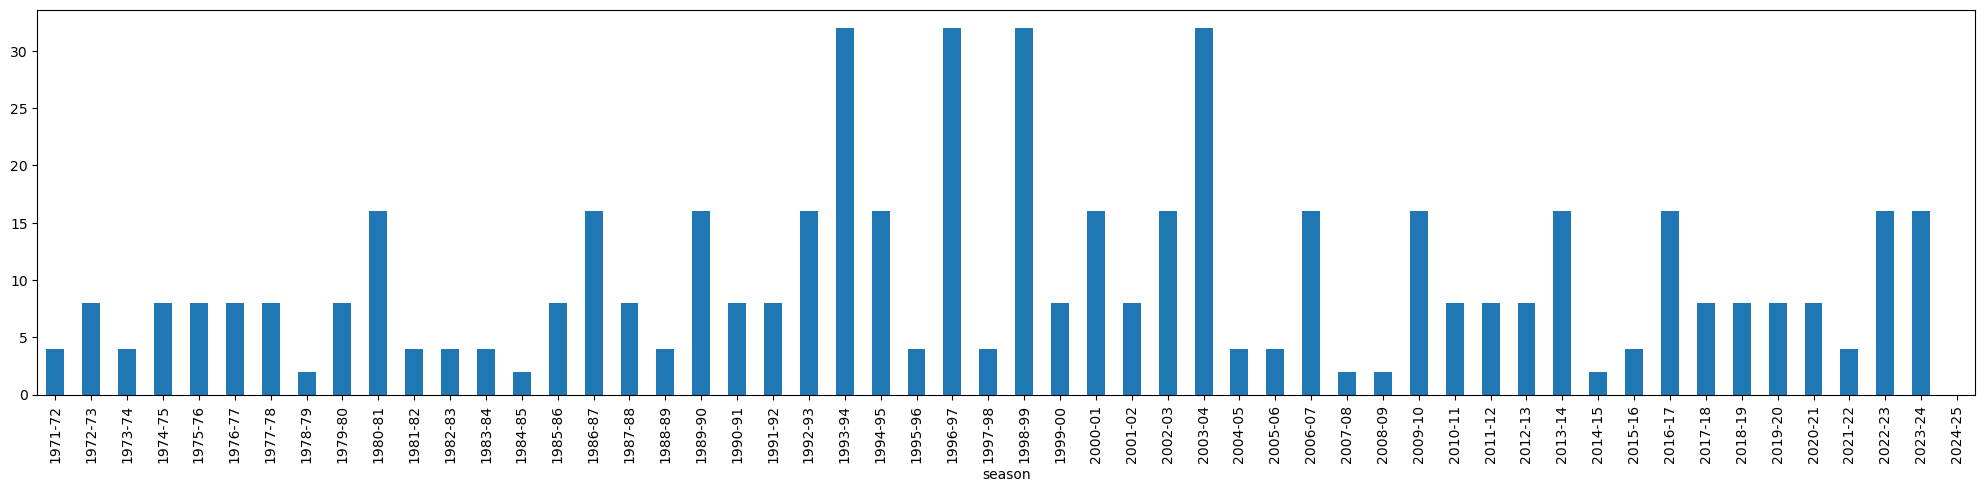

In [77]:
east[east['competition'] == 'EL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

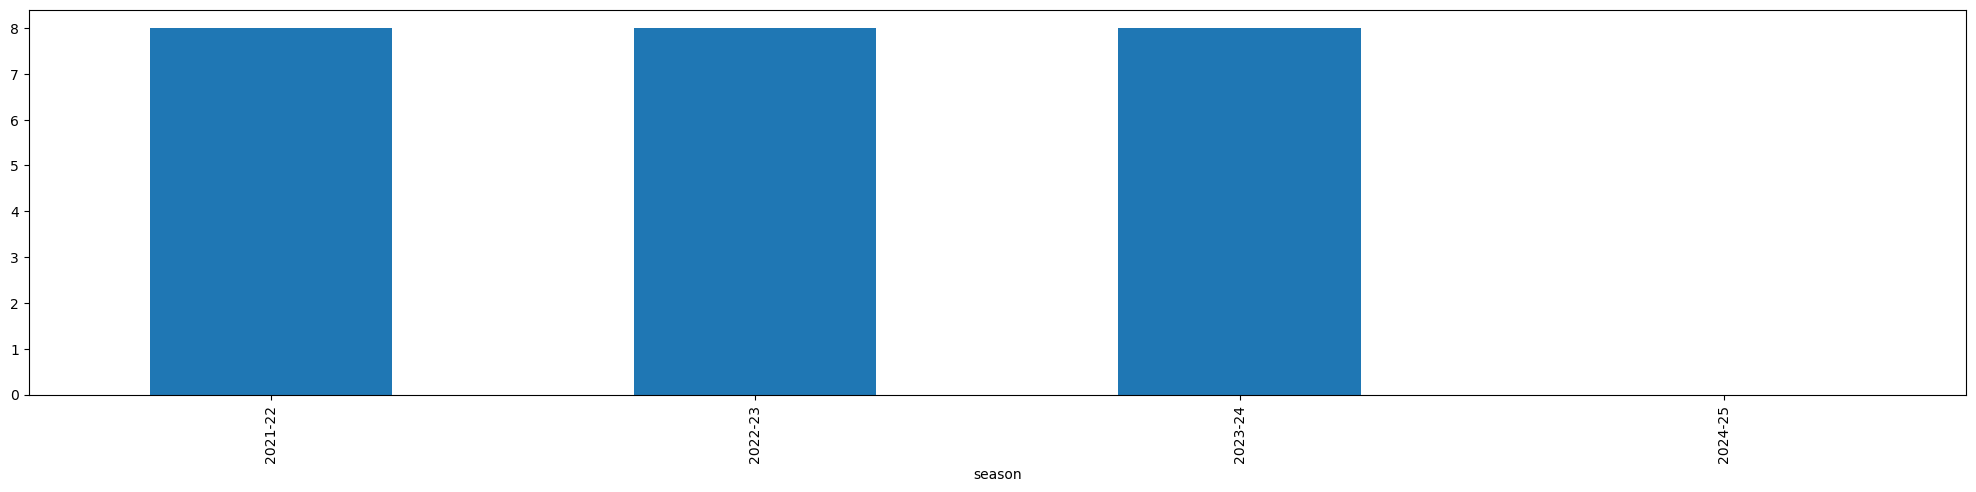

In [78]:
east[east['competition'] == 'UECL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

In [79]:
east[(east['competition'] == 'UCL')].groupby(['season','homeTeamCountry'])['remaining_teams_count'].min()

season   homeTeamCountry                         
1955-56  Hungary                                      8.0
         Poland                                      16.0
         Socialist Federal Republic of Yugoslavia     8.0
1956-57  Bulgaria                                     8.0
         Czechoslovakia                              16.0
                                                     ... 
2024-25  Romania                                      NaN
         Serbia                                       NaN
         Slovakia                                     NaN
         Slovenia                                     NaN
         Ukraine                                      NaN
Name: remaining_teams_count, Length: 980, dtype: float64

## Sparta x Bucurest

In [80]:
east[(east['homeTeam'] == 'Sparta Prague') & (east['awayTeam'].str.contains('Bucha',na=False))]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count
17817,UCL,1988-09-07,1-5,Sparta Prague,Czechoslovakia,AC_Sparta_Prague,Steaua Bucharest,Romania,CSA_Steaua_Bucure%C8%99ti_(football),"Stadion Letná, Prague",first round,22296.0,NaN,1988%E2%80%9389 European Cup,1988-89,Prague,31.0
22608,UCL,2016-07-26,1-1,Sparta Prague,Czech Republic,AC_Sparta_Prague,Steaua Bucharest,Romania,FC_Steaua_Bucure%C8%99ti,"Generali Arena, Prague",third qualifying round,13257.0,NaN,2016%E2%80%9317 UEFA Champions League qualifyi...,2016-17,Prague,57.0


In [81]:
east[(east['awayTeam'] == 'Sparta Prague') & (east['homeTeam'].str.contains('Bucha',na=False))]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count
17833,UCL,1988-10-05,2-2,Steaua Bucharest,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Sparta Prague,Czechoslovakia,AC_Sparta_Prague,"Stadionul Steaua, Bucharest",first round,25000.0,NaN,1988%E2%80%9389 European Cup,1988-89,Bucharest,31.0
22629,UCL,2016-08-03,2-0,Steaua Bucharest,Romania,NaN,Sparta Prague,Czech Republic,NaN,"Arena Națională, Bucharest",third qualifying round,37127.0,NaN,2016%E2%80%9317 UEFA Champions League qualifyi...,2016-17,Bucharest,57.0


In [82]:
east[(east['competition'] == 'UCL') & (east['homeTeam'] == 'Sparta Prague')].groupby('season')['remaining_teams_count'].min().nsmallest(10)

season
1965-66     8.0
1967-68     8.0
1984-85     8.0
1991-92     8.0
1987-88    16.0
1989-90    16.0
1993-94    16.0
1999-00    16.0
2001-02    16.0
2003-04    16.0
Name: remaining_teams_count, dtype: float64

In [83]:
east[(east['competition'] == 'UCL') & (east['homeTeam'].str.contains('Bucha',na=False))].groupby('season')['remaining_teams_count'].min().nsmallest(10)

season
1985-86     2.0
1988-89     2.0
1983-84     4.0
1987-88     4.0
1982-83    15.0
1986-87    15.0
1956-57    16.0
1957-58    16.0
1963-64    16.0
1965-66    16.0
Name: remaining_teams_count, dtype: float64

## Club names

In [84]:
east['nazev'] = east['homeTeam'].apply(lambda x: x.split(' ')[0])
east['dedina'] = east['homeTeam'].apply(lambda x: x.split(' ')[-1])

C:\Users\micha\AppData\Local\Temp\ipykernel_3812\3891702428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['nazev'] = east['homeTeam'].apply(lambda x: x.split(' ')[0])
C:\Users\micha\AppData\Local\Temp\ipykernel_3812\3891702428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['dedina'] = east['homeTeam'].apply(lambda x: x.split(' ')[-1])


In [85]:
nazvy = east.copy()
nazvy['nazev'] = nazvy['nazev'].apply(lambda x: x.replace('Dyn','Din'))
nazvy = nazvy.groupby('nazev')['dedina'].nunique().nlargest(1000)
nazvy = nazvy[nazvy >= 3]
nazvy

nazev
Dinamo       11
Spartak      10
CSKA          6
FK            6
FC            5
NK            3
Slavia        3
Khazar        3
TJ            3
Artmedia      3
Arsenal       3
KS            3
Lokomotiv     3
MTK           3
Inter         3
Vasas         3
Budućnost     3
Metalurh      3
Zagłębie      3
Zenit         3
Olimpija      3
Daugava       3
Bohemians     3
Levadia       3
Name: dedina, dtype: int64

In [86]:
dynama = pd.DataFrame(df[df['homeTeam'].str.lower().str.contains('d[iy]nam',na=False)][['homeTeam']].drop_duplicates())
dynama['city'] = dynama['homeTeam'].apply(lambda x: x.split(' ')[-1])
print(dynama['city'].drop_duplicates())
print(len(dynama['city'].drop_duplicates()))

10         Zagreb
32         Žilina
237          Kyiv
428     Bucharest
602        Dynamo
603        Tirana
631        Moscow
932       Tbilisi
1288      Dresden
1599        Minsk
2151       Batumi
6240         Baku
8912        Brest
Name: city, dtype: object
13


In [87]:
dynama

,homeTeam,city
10,Dinamo Zagreb,Zagreb
32,Dynamo Žilina,Žilina
237,Dynamo Kyiv,Kyiv
428,Dinamo Bucharest,Bucharest
602,BFC Dynamo,Dynamo
603,Dinamo Tirana,Tirana
631,Dynamo Moscow,Moscow
932,Dinamo Tbilisi,Tbilisi
1288,Dynamo Dresden,Dresden
1599,Dinamo Minsk,Minsk


In [88]:
df[df['homeTeam'].str.lower().str.contains('K\wln',na=False)]['homeTeam'].drop_duplicates()

Series([], Name: homeTeam, dtype: object)

In [89]:
df[df['homeTeam'].str.lower().str.contains('star',na=False)]['homeTeam'].drop_duplicates()

627          Red Star Belgrade
729     PFC Beroe Stara Zagora
1123        Beroe Stara Zagora
1250              Velež Mostar
2916                     Start
8903           Zrinjski Mostar
Name: homeTeam, dtype: object

In [90]:
east[east['homeTeam'].str.lower().str.contains('cska',na=False)]['homeTeam'].drop_duplicates().to_list()

['CSKA Cherveno Zname',
 'CSKA September Flag',
 'CSKA Sofia',
 'CSKA Moscow',
 'CSKA Kyiv',
 'CSKA Septemvriysko Zname',
 'CSKA Red Flag',
 'CSKA 1948']

In [91]:
east[east['homeTeam'].str.lower().str.contains('naft',na=False)]['homeTeam'].drop_duplicates().to_list()

['Internacionál Slovnaft Bratislava',
 'Naftex Burgas',
 'Naftan',
 'Naftan Novopolotsk']

In [92]:
east[east['homeTeam'].str.lower().str.contains('metal',na=False)]['homeTeam'].drop_duplicates()

1682           Metalist Kharkiv
2433         Liepājas Metalurgs
7322           Metalurh Donetsk
7358      Metalurh Zaporizhzhya
7461        Metalurh Zaporizhya
8459     FHK Liepājas Metalurgs
9176          Liepājas Metalurg
10104           Metalurg Skopje
Name: homeTeam, dtype: object

In [93]:
east[east['homeTeam'].str.lower().str.contains('slavia',na=False)]['homeTeam'].drop_duplicates()

133      Slavia Sofia
822     Slavia Prague
6843     Slavia Mozyr
Name: homeTeam, dtype: object

In [94]:
east[east['homeTeam'].str.lower().str.contains('cska',na=False)]['homeTeam'].drop_duplicates()

243           CSKA Cherveno Zname
537           CSKA September Flag
799                    CSKA Sofia
1850                  CSKA Moscow
2427                    CSKA Kyiv
4191     CSKA Septemvriysko Zname
16235               CSKA Red Flag
25314                   CSKA 1948
Name: homeTeam, dtype: object

In [95]:
east[east['homeTeam'].str.lower().str.contains('arsenal',na=False)]['homeTeam'].drop_duplicates()

11448     Arsenal Kyiv
14754     Arsenal Tula
25080    Arsenal Tivat
Name: homeTeam, dtype: object

In [96]:
east[east['nazev'].str.contains('Slav',na=False)]['homeTeam'].drop_duplicates()

133      Slavia Sofia
822     Slavia Prague
6843     Slavia Mozyr
8897    Slaven Belupo
9979          Slavija
Name: homeTeam, dtype: object

In [97]:
east[east['nazev'].str.contains('Ol',na=False)]['homeTeam'].drop_duplicates()

540      Olimpija Ljubljana
2111          Olimpija Rīga
9249             Olimps/RFS
9289           Olimpik Baku
10073               Olimpia
10074              Olimpija
12498               Olimpic
13366          Oleksandriya
13840       Olimpik Donetsk
Name: homeTeam, dtype: object

In [98]:
east[east['nazev'].str.contains('Loko',na=False)]['homeTeam'].drop_duplicates()

979           Lokomotiv Sofia
1003        Lokomotiva Košice
1004       Lokomotive Leipzig
1033        Lokomotíva Košice
2249         Lokomotiv Moscow
2484     Lokomotiv-96 Vitebsk
2573        Lokomotiv Plovdiv
11896              Lokomotiva
Name: homeTeam, dtype: object

In [99]:
east[east['nazev'].str.contains('Metal',na=False)]['homeTeam'].drop_duplicates()

1682          Metalist Kharkiv
7322          Metalurh Donetsk
7358     Metalurh Zaporizhzhya
7461       Metalurh Zaporizhya
10104          Metalurg Skopje
Name: homeTeam, dtype: object

In [100]:
df['nazev'] = df['homeTeam'].apply(lambda x: x.split(' ')[0])
df['dedina'] = df['homeTeam'].apply(lambda x: x.split(' ')[-1])

In [101]:
df[df['homeTeam'].str.contains('Union',na=False)].groupby('homeTeam').size()

homeTeam
Racing Union             1
Union Berlin            14
Union Luxembourg        19
Union Saint-Gilloise    14
dtype: int64

In [102]:
df.groupby('nazev')['dedina'].nunique().nlargest(60)

nazev
FC             18
Spartak        10
Inter           9
FK              8
Hapoel          8
Dinamo          7
CSKA            6
Dynamo          6
IFK             6
Racing          5
Real            5
St              5
Aris            4
Arsenal         4
Austria         4
B               4
Maccabi         4
1.              3
Admira          3
Apollon         3
Artmedia        3
BK              3
Bnei            3
Bohemians       3
Boldklubben     3
Budućnost       3
Cork            3
Daugava         3
Fortuna         3
KR              3
KS              3
Khazar          3
La              3
Lausanne        3
Levadia         3
Lokomotiv       3
MTK             3
Metalurh        3
NK              3
Olimpija        3
PSV             3
Rapid           3
Red             3
Slavia          3
Sporting        3
St.             3
Stade           3
TJ              3
Torpedo         3
Union           3
Vasas           3
Vitória         3
Víkingur        3
Zagłębie        3
Zenit           3
ÍA  

In [103]:
df[df['nazev'].str.contains('Sparta',na=False)]['homeTeam'].drop_duplicates()

44                Spartak Varna
96             Sparta Rotterdam
180               Sparta Prague
319              Spartak Moscow
383              Spartak Trnava
487              Levski-Spartak
3047       Levski-Spartak Sofia
5332        Spartak Vladikavkaz
7469            Spartak Yerevan
10456     Spartak Zlatibor Voda
12552          Spartaks Jūrmala
13027            Spartak Myjava
13921          Spartak Subotica
16133    Spartak Hradec Králové
16296           Spartak Plovdiv
Name: homeTeam, dtype: object

In [104]:
df[df['nazev'].str.contains('Prague',na=False)]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina


In [105]:
df[df['nazev'].str.contains('Hapoel',na=False)]['homeTeam'].drop_duplicates()

1934            Hapoel Petah Tikva
2294    Hapoel Ironi Rishon LeZion
2342            Hapoel Be'er Sheva
5698               Hapoel Tel Aviv
6441                  Hapoel Haifa
7576              Hapoel Ramat Gan
7960           Hapoel Bnei Sakhnin
9561    Hapoel Ironi Kiryat Shmona
Name: homeTeam, dtype: object

In [106]:
df[df['nazev'].str.contains('Real',na=False)]['homeTeam'].drop_duplicates()

198       Real Zaragoza
562         Real Madrid
988          Real Betis
1604      Real Sociedad
1721    Real Valladolid
Name: homeTeam, dtype: object

In [107]:
df[df['nazev'].str.contains('Metal',na=False)]['homeTeam'].drop_duplicates()

1682          Metalist Kharkiv
7322          Metalurh Donetsk
7358     Metalurh Zaporizhzhya
7461       Metalurh Zaporizhya
10104          Metalurg Skopje
10577      Metalurgist Rustavi
11081        Metalurgi Rustavi
Name: homeTeam, dtype: object

In [108]:
df[df['nazev'].str.contains('Ol',na=False)]['homeTeam'].drop_duplicates()

28               Olympiacos
540      Olimpija Ljubljana
990      Olympiakos Nicosia
2111          Olimpija Rīga
9249             Olimps/RFS
9289           Olimpik Baku
9599         Olimpi Rustavi
10073               Olimpia
10074              Olimpija
10932      Olympiakos Volou
11006      Olympiacos Volos
12498               Olimpic
13366          Oleksandriya
13840       Olimpik Donetsk
Name: homeTeam, dtype: object

In [109]:
df.groupby('nazev')['homeTeam'].nunique().nlargest(10)

nazev
FC         18
Spartak    10
Inter       9
CSKA        8
FK          8
Hapoel      8
Dinamo      7
Dynamo      6
IFK         6
Racing      5
Name: homeTeam, dtype: int64

In [110]:
df.groupby('nazev')['homeTeamCountry'].nunique().nlargest(20)

nazev
FC           11
Dynamo        9
Inter         8
Dinamo        7
Spartak       7
FK            6
Red           6
Arsenal       4
CSKA          4
Partizan      4
Slavia        4
Torpedo       4
1.            3
Aris          3
Borac         3
Budućnost     3
Hajduk        3
La            3
OFK           3
Olimpija      3
Name: homeTeamCountry, dtype: int64

In [111]:
df[df['nazev'].str.contains('Red',na=False)].groupby('homeTeamCountry')['homeTeam'].nunique().nlargest(20)

homeTeamCountry
Austria                                     1
Federal Republic of Yugoslavia              1
Luxembourg                                  1
Serbia                                      1
Serbia and Montenegro                       1
Socialist Federal Republic of Yugoslavia    1
Name: homeTeam, dtype: int64

In [112]:
df[df['nazev'].str.contains('Sparta',na=False)].groupby('homeTeamCountry')['homeTeam'].nunique().nlargest(20)

homeTeamCountry
Bulgaria          4
Czechoslovakia    3
Russia            2
Serbia            2
Slovakia          2
Armenia           1
Czech Republic    1
Latvia            1
Netherlands       1
Soviet Union      1
Name: homeTeam, dtype: int64

In [113]:
df[df['nazev'].str.contains('Ol',na=False)].groupby('homeTeamCountry')['homeTeam'].nunique().nlargest(10)

homeTeamCountry
Greece                                      3
Latvia                                      2
Slovenia                                    2
Ukraine                                     2
Azerbaijan                                  1
Bosnia and Herzegovina                      1
Cyprus                                      1
Georgia                                     1
Moldova                                     1
Socialist Federal Republic of Yugoslavia    1
Name: homeTeam, dtype: int64

In [114]:
df[df['nazev'].str.contains('namo',na=False)]['homeTeam'].drop_duplicates()

10          Dinamo Zagreb
32          Dynamo Žilina
237           Dynamo Kyiv
428      Dinamo Bucharest
603         Dinamo Tirana
631         Dynamo Moscow
932        Dinamo Tbilisi
1288       Dynamo Dresden
1599         Dinamo Minsk
2151        Dinamo Batumi
2181      Dinamo-93 Minsk
6240          Dynamo Baku
8912         Dinamo Brest
14241        Dynamo Brest
Name: homeTeam, dtype: object

In [115]:
df[df['nazev'].str.lower().str.contains('dinam',na=False)]['homeTeam'].drop_duplicates()

10         Dinamo Zagreb
428     Dinamo Bucharest
603        Dinamo Tirana
932       Dinamo Tbilisi
1599        Dinamo Minsk
2151       Dinamo Batumi
2181     Dinamo-93 Minsk
8912        Dinamo Brest
Name: homeTeam, dtype: object

In [116]:
df[df['nazev'].str.lower().str.contains('dynam',na=False)]['homeTeam'].drop_duplicates()

32        Dynamo Žilina
237         Dynamo Kyiv
631       Dynamo Moscow
1288     Dynamo Dresden
6240        Dynamo Baku
14241      Dynamo Brest
Name: homeTeam, dtype: object

In [117]:
east[east['nazev'].str.contains('namo',na=False)]['homeTeam'].drop_duplicates()

10          Dinamo Zagreb
32          Dynamo Žilina
237           Dynamo Kyiv
428      Dinamo Bucharest
603         Dinamo Tirana
631         Dynamo Moscow
932        Dinamo Tbilisi
1288       Dynamo Dresden
1599         Dinamo Minsk
2181      Dinamo-93 Minsk
6240          Dynamo Baku
8912         Dinamo Brest
14241        Dynamo Brest
Name: homeTeam, dtype: object

## Getting more serious about losers / winners of the transformation

In [118]:
last_country = pd.DataFrame(east.sort_values(by='date').groupby('homeTeam')['homeTeamCountry'].last().reset_index())
last_country

,homeTeam,homeTeamCountry
0,1. FC Lokomotive Leipzig,East Germany
1,1. FC Magdeburg,East Germany
2,17 Nëntori,Albania
3,17 Nëntori Tirana,Albania
4,ASA Târgu Mureș,Romania
...,...,...
679,Željezničar,Bosnia and Herzegovina
680,Željezničar Sarajevo,Bosnia and Herzegovina
681,Žepče,Bosnia and Herzegovina
682,Žilina,Slovakia


In [119]:
last_country[last_country['homeTeamCountry'].str.contains('Czechos')]

,homeTeam,homeTeamCountry
49,Baník Ostrava,Czechoslovakia
61,Bohemians,Czechoslovakia
63,Bohemians Prague,Czechoslovakia
149,Dukla Prague,Czechoslovakia
151,Dunajská Streda,Czechoslovakia
158,Dynamo Žilina,Czechoslovakia
228,Internacionál Bratislava,Czechoslovakia
229,Internacionál Slovnaft Bratislava,Czechoslovakia
313,Lokomotiva Košice,Czechoslovakia
315,Lokomotíva Košice,Czechoslovakia


In [120]:
last_country.loc[last_country['homeTeamCountry'] == 'Germany', 'homeTeamCountry'] = 'East Germany'
last_country.loc[last_country['homeTeam'] == 'Zenit', 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Dnepropetrovsk',na=False), 'homeTeamCountry'] = 'Ukraine'
last_country.loc[last_country['homeTeam'].str.contains('Kiev',na=False), 'homeTeamCountry'] = 'Ukraine'
last_country.loc[last_country['homeTeam'].str.contains('Rostov',na=False), 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Leningrad',na=False), 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Petersburg',na=False), 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Voroshilovgrad',na=False), 'homeTeamCountry'] = 'Ukraine'
last_country.loc[last_country['homeTeam'].str.contains('Prague',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Brno',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Ostrava',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Plzeň',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Vítkovice',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Hradec',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Bratislava',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Košice',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('VSS',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Nitra',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Žilina',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Streda',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Belgrade XI',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Budućnost Banatski Dvor',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Sartid',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Železnik',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Bečej',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Železnik',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Obilić',na=False), 'homeTeamCountry'] = 'Kosovo'
last_country.loc[last_country['homeTeam'].str.contains('FK Partizan',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'] == 'Partizan', 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('FK Red Star',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Vardar',na=False), 'homeTeamCountry'] = 'North Macedonia'
last_country.loc[last_country['homeTeam'].str.contains('FK Vojvodina',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('GNK Dinamo Zagreb',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('HAŠK Građanski',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('NK Rijeka',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('Napredak Kruševac',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Novi Sad XI',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Obilić',na=False), 'homeTeamCountry'] = 'Kosovo'
last_country.loc[last_country['homeTeam'].str.contains('RŠD Velež',na=False), 'homeTeamCountry'] = 'Bosnia and Herzegovina'
last_country.loc[last_country['homeTeam'].str.contains('Trešnjevka Zagreb',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('Zagreb XI',na=False), 'homeTeamCountry'] = 'Croatia'

In [121]:
last_country = last_country[last_country['homeTeamCountry'] != 'Czechoslovakia']

In [122]:
def get_city(club):
    try:
        return df[df['homeTeam'] == club]['city'].value_counts().nlargest(1).index.to_list()[0]
    except Exception as E:
        print(club)
        print(E)
        return None

In [123]:
last_country['city'] = last_country['homeTeam'].apply(lambda x: get_city(x))

1. FC Lokomotive Leipzig
list index out of range
Aufbau Magdeburg
list index out of range
BSG Chemie Leipzig
list index out of range
BSG Sachsenring Zwickau
list index out of range
Czarni Żagań
list index out of range
Diósgyőri VTK Miskolc
list index out of range
FC Shakhtar Donetsk
list index out of range
FK Bor
list index out of range
Haladás VSE
list index out of range
Jiul Petroşani
list index out of range
KS Partizani
list index out of range
Lokomotiva Košice
list index out of range
MTK/VM Budapest
list index out of range
Raba Vasas ETO
list index out of range
Stal Rzeszów
list index out of range


C:\Users\micha\AppData\Local\Temp\ipykernel_3812\1158077462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_country['city'] = last_country['homeTeam'].apply(lambda x: get_city(x))


In [124]:
last_country.loc[last_country['city'].str.contains('Leningrad',na=False), 'city'] = 'Saint Petersburg'
last_country.loc[last_country['city'] == 'East Berlin', 'city'] = 'Berlin'
last_country.loc[last_country['city'] == 'Slovakia', 'city'] = 'Dnipropetrovsk'
last_country.loc[last_country['homeTeam'] == 'Czarni Żagań', 'city'] = 'Żagań'
last_country.loc[last_country['homeTeam'] == 'Stal Rzeszów', 'city'] = 'Rzeszów'
last_country.loc[last_country['homeTeam'] == '1. FC Lokomotive Leipzig', 'city'] = 'Leipzig'
last_country.loc[last_country['homeTeam'] == 'Aufbau Magdeburg', 'city'] = 'Magdeburg'
last_country.loc[last_country['homeTeam'] == 'BSG Chemie Leipzig', 'city'] = 'Leipzig'
last_country.loc[last_country['homeTeam'] == 'BSG Sachsenring Zwickau', 'city'] = 'Zwickau'
last_country.loc[last_country['homeTeam'] == 'Diósgyőri VTK Miskolc', 'city'] = 'Miskolc'
last_country.loc[last_country['homeTeam'] == 'Haladás VSE', 'city'] = 'Szombathely'
last_country.loc[last_country['homeTeam'] == 'MTK/VM Budapest', 'city'] = 'Budapest'
last_country.loc[last_country['homeTeam'] == 'Raba Vasas ETO', 'city'] = 'Györ'
last_country.loc[last_country['homeTeam'] == 'Jiul Petroşani', 'city'] = 'Petroşani'
last_country.loc[last_country['homeTeam'] == 'Lokomotiva Košice', 'city'] = 'Košice'
last_country.loc[last_country['homeTeam'] == 'Polissya Zhytomyr', 'city'] = 'Zhytomyr'

last_country.loc[last_country['homeTeam'] == 'Ararat Yerevan', 'homeTeamCountry'] = 'Armenia'
last_country.loc[last_country['homeTeam'] == 'Dinamo Tbilisi', 'homeTeamCountry'] = 'Georgia'
last_country.loc[last_country['homeTeam'] == 'Dynamo Moscow', 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'] == 'Spartak Moscow', 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'] == 'Torpedo Moscow', 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'] == 'FC Shakhtar Donetsk', 'homeTeamCountry'] = 'Ukraine'

last_country.loc[last_country['homeTeam'] == 'Borac Banja Luka', 'homeTeamCountry'] = 'Bosnia and Herzegovina'
last_country.loc[last_country['homeTeam'] == 'FK Bor', 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'] == 'Hajduk Split', 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'] == 'OFK Beograd', 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'] == 'Red Star Belgrade', 'homeTeamCountry'] = 'Serbia'


last_country.loc[last_country['homeTeam'] == 'FC Shakhtar Donetsk', 'city'] = 'Donetsk'
last_country.loc[last_country['homeTeam'] == 'FK Bor', 'homeTeamCountry'] = 'Bor'
last_country.loc[last_country['homeTeam'] == 'KS Partizani', 'homeTeamCountry'] = 'Tirana'

In [125]:
def count_matches(row):
    before89 = len(df[(df['homeTeam'] == row['homeTeam']) & (df['season'] <= '1989-90') & (df['remaining_teams_count'] <= 8)]) + len(df[(df['awayTeam'] == row['homeTeam']) & (df['season'] <= '1989-90') & (df['remaining_teams_count'] <= 8)])
    after89 = len(df[(df['homeTeam'] == row['homeTeam']) & (df['season'] > '1989-90') & (df['remaining_teams_count'] <= 8)]) + len(df[(df['awayTeam'] == row['homeTeam']) & (df['season'] > '1989-90') & (df['remaining_teams_count'] <= 8)])
    return pd.Series([before89, after89])

In [126]:
last_country[['before_89','after_89']] = last_country.apply(lambda row: count_matches(row), axis=1)

C:\Users\micha\AppData\Local\Temp\ipykernel_3812\2927248340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_country[['before_89','after_89']] = last_country.apply(lambda row: count_matches(row), axis=1)
C:\Users\micha\AppData\Local\Temp\ipykernel_3812\2927248340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_country[['before_89','after_89']] = last_country.apply(lambda row: count_matches(row), axis=1)


In [127]:
last_country.sample(10)

,homeTeam,homeTeamCountry,city,before_89,after_89
647,Zawisza Bydgoszcz,Poland,Bydgoszcz,0,0
508,Sloboda Tuzla,Bosnia and Herzegovina,Tuzla,0,0
506,Slavija,Bosnia and Herzegovina,Sarajevo,0,0
601,Valmiera,Latvia,Riga,0,0
674,Šibenik,Croatia,Dugopolje,0,0
432,RAF Jelgava,Latvia,Jelgava,0,0
503,Slavia Mozyr,Belarus,Mozyr,0,0
461,Rīga,Latvia,Liepāja,0,0
95,CSU Galați,Romania,Galați,0,0
604,Varteks,Croatia,Varaždin,0,2


In [128]:
last_country.groupby('homeTeamCountry')['city'].nunique().nlargest(50)

homeTeamCountry
Poland                    29
Romania                   25
Hungary                   18
Ukraine                   17
Russia                    15
Bulgaria                  15
East Germany              14
Czech Republic            14
Slovakia                  12
Belarus                   12
Croatia                   11
Kazakhstan                11
Slovenia                  11
Serbia                    10
Bosnia and Herzegovina    10
Lithuania                  9
North Macedonia            7
Albania                    6
Latvia                     6
Azerbaijan                 6
Moldova                    4
Estonia                    4
Kosovo                     4
Montenegro                 3
Armenia                    3
Georgia                    1
Bor                        0
Tirana                     0
Name: city, dtype: int64

In [129]:
last_country[(last_country['city'].isnull())]

,homeTeam,homeTeamCountry,city,before_89,after_89
176,FK Bor,Bor,None,0,0
244,KS Partizani,Tirana,None,0,0


In [130]:
last_country[last_country['homeTeamCountry'] == 'Ukraine']['city'].drop_duplicates().sort_values()

142    Dnipropetrovsk
170           Donetsk
337           Kharkiv
271         Kovalivka
138        Kryvyi Rih
26               Kyiv
256              Lviv
221          Mariupol
109             Odesa
385      Oleksandriia
625           Poltava
559        Simferopol
378          Vinnitsa
661    Voroshilovgrad
340        Zaporizhia
660      Zaporizhzhia
418          Zhytomyr
Name: city, dtype: object

In [131]:
last_country[last_country['city'] == 'Slovakia']

,homeTeam,homeTeamCountry,city,before_89,after_89


In [132]:
last_country[last_country['homeTeamCountry'] == 'Czech Republic']['city'].drop_duplicates()

49                Ostrava
60                   Brno
62                 Prague
146              Drnovice
177              Jablonec
184               Olomouc
218        Hradec Králové
236    Jablonec nad Nisou
334               Příbram
349        Mladá Boleslav
511               Liberec
513      Uherské Hradiště
548                 Plzeň
561               Teplice
Name: city, dtype: object

In [133]:
last_country[last_country['homeTeamCountry'] == 'Romania']['city'].drop_duplicates().sort_values()

591               Arad
44               Bacău
167          Baia Mare
200           Bistrița
69            Botoșani
71              Brașov
82           Bucharest
366          București
85         Cluj-Napoca
163            Craiova
95              Galați
33             Giurgiu
94                Iași
198             Mediaș
189             Moreni
183             Ovidiu
241          Petroşani
608       Piatra Neamț
23             Pitești
410           Ploiești
108     Râmnicu Vâlcea
475    Sfântu Gheorghe
112              Sibiu
419          Timișoara
4          Târgu Mureș
Name: city, dtype: object

In [134]:
last_country[last_country['after_89'] == 0].sort_values(by='before_89',ascending=False).head(10)

,homeTeam,homeTeamCountry,city,before_89,after_89
149,Dukla Prague,Czech Republic,Prague,16,0
186,Ferencváros,Hungary,Budapest,11,0
405,Partizan,Serbia,Belgrade,11,0
314,Lokomotive Leipzig,East Germany,Leipzig,11,0
49,Baník Ostrava,Czech Republic,Ostrava,10,0
129,Dinamo Bucharest,Romania,Bucharest,10,0
207,Górnik Zabrze,Poland,Zabrze,10,0
97,Carl Zeiss Jena,East Germany,Jena,9,0
327,Magdeburg,East Germany,Magdeburg,9,0
131,Dinamo Tbilisi,Georgia,Tbilisi,9,0


In [135]:
last_country[last_country['before_89'] == 0].sort_values(by='after_89',ascending=False).head(10)

,homeTeam,homeTeamCountry,city,before_89,after_89
89,CSKA Moscow,Russia,Moscow,0,15
504,Slavia Prague,Czech Republic,Prague,0,14
652,Zenit Saint Petersburg,Russia,Saint Petersburg,0,9
308,Lokomotiv Moscow,Russia,Moscow,0,8
433,RB Leipzig,East Germany,Leipzig,0,8
617,Viktoria Plzeň,Czech Republic,Plzeň,0,3
604,Varteks,Croatia,Varaždin,0,2
454,Rubin Kazan,Russia,Kazan,0,2
298,Levski Sofia,Bulgaria,Sofia,0,2
511,Slovan Liberec,Czech Republic,Liberec,0,2


In [136]:
last_country[last_country['homeTeam'].str.contains('Zenit',na=False)]

,homeTeam,homeTeamCountry,city,before_89,after_89
650,Zenit,Russia,Saint Petersburg,0,0
651,Zenit Leningrad,Russia,Saint Petersburg,0,0
652,Zenit Saint Petersburg,Russia,Saint Petersburg,0,9


In [137]:
eastern_countries = last_country.groupby('homeTeamCountry')[['before_89','after_89']].sum()

In [138]:
eastern_countries[eastern_countries['before_89'] == 0].sort_values(by='after_89',ascending=False).head(5)

,before_89,after_89
homeTeamCountry,,
Albania,0,0
Azerbaijan,0,0
Bor,0,0
Estonia,0,0
Kazakhstan,0,0


In [139]:
eastern_countries[eastern_countries['after_89'] == 0].sort_values(by='before_89',ascending=False).head(10)

,before_89,after_89
homeTeamCountry,,
Hungary,58,0
Slovakia,11,0
Georgia,9,0
Bosnia and Herzegovina,8,0
Belarus,5,0
Armenia,2,0
Albania,0,0
Lithuania,0,0
Slovenia,0,0


In [140]:
east[east['homeTeamCountry'] == 'Czech Republic'].groupby(['homeTeam','competition','season'])['remaining_teams_count'].min().sort_values().head(25)

homeTeam        competition  season 
Slavia Prague   EL           1995-96     4.0
Sparta Prague   CWC          1992-93     8.0
Slavia Prague   EL           2020-21     8.0
                             2018-19     8.0
Slovan Liberec  EL           2001-02     8.0
Viktoria Plzeň  UECL         2023-24     8.0
Slavia Prague   UECL         2021-22     8.0
Sparta Prague   EL           2015-16     8.0
Slavia Prague   CWC          1997-98     8.0
                EL           1999-00     8.0
Sparta Prague   UCL          1999-00    16.0
Viktoria Plzeň  EL           2017-18    16.0
                             2013-14    16.0
                             2012-13    16.0
Sparta Prague   UCL          1993-94    16.0
Slavia Prague   EL           2000-01    16.0
Sparta Prague   EL           2023-24    16.0
                             1995-96    16.0
                CWC          1996-97    16.0
Hradec Králové  CWC          1995-96    16.0
Slavia Prague   EL           2023-24    16.0
                  

In [141]:
eastern_countries.sort_values(by='after_89',ascending=False).head(100)

,before_89,after_89
homeTeamCountry,,
Russia,24,58
Ukraine,34,42
Czech Republic,46,31
Serbia,56,11
East Germany,73,10
Romania,38,8
Croatia,26,6
Poland,34,6
Bulgaria,41,2


In [142]:
east[(east['awayTeam'].str.contains('Leverku')) & (east['remaining_teams_count'] <= 16)]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
5577,EL,1994-11-22,1-4,GKS Katowice,Poland,GKS_Katowice,Bayer Leverkusen,Germany,Bayer_04_Leverkusen,"GKS Katowice Stadium, Chorzów",third round,8000.0,NaN,1994%E2%80%9395 UEFA Cup,1994-95,Chorzów,16.0,GKS,Katowice
9109,EL,2008-04-10,0-1,Zenit Saint Petersburg,Russia,FC_Zenit_Saint_Petersburg,Bayer Leverkusen,Germany,Bayer_04_Leverkusen,"Petrovsky Stadium, Saint Petersburg",quarter-finals,21500.0,NaN,2007%E2%80%9308 UEFA Cup knockout stage,2007-08,Saint Petersburg,8.0,Zenit,Petersburg
15598,EL,2023-03-16,0-2,Ferencváros,Hungary,NaN,Bayer Leverkusen,Germany,NaN,"Puskás Aréna, Budapest",round of 16,50675.0,NaN,2022%E2%80%9323 UEFA Europa League knockout phase,2022-23,Budapest,16.0,Ferencváros,Ferencváros
15801,EL,2024-03-07,2-2,Qarabağ,Azerbaijan,Qaraba%C4%9F_FK,Bayer Leverkusen,Germany,Bayer_04_Leverkusen,"Tofiq Bahramov Republican Stadium, Baku",round of 16,30423.0,NaN,2023%E2%80%9324 UEFA Europa League knockout phase,2023-24,Baku,16.0,Qarabağ,Qarabağ


In [143]:
east[(east['homeTeamCountry'] == 'Hungary') & (east['remaining_teams_count'] <= 8)]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
51,CWC,1962-02-13,4-3,Újpest Dózsa,Hungary,%C3%9Ajpest_FC,Dunfermline Athletic,Scotland,Dunfermline_Athletic_F.C.,"Népstadion, Budapest",quarter-finals,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Budapest,8.0,Újpest,Dózsa
62,CWC,1962-04-11,0-1,Újpest Dózsa,Hungary,%C3%9Ajpest_FC,Fiorentina,Italy,ACF_Fiorentina,"Megyeri úti stadion, Budapest",semi-finals,21277.0,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Budapest,4.0,Újpest,Dózsa
145,CWC,1964-02-27,2-0,MTK Budapest,Hungary,MTK_Budapest_FC,Fenerbahçe,Turkey,Fenerbah%C3%A7e_S.K._(football),"Hungaria Körut, Budapest",quarter-finals,13697.0,NaN,1963%E2%80%9364 European Cup Winners%27 Cup,1963-64,Budapest,8.0,MTK,Budapest
150,CWC,1964-03-18,1-0,MTK Budapest,Hungary,MTK_Budapest_FC,Fenerbahçe,Turkey,Fenerbah%C3%A7e_S.K._(football),"Stadio Flaminio, Rome",quarter-finals,700.0,NaN,1963%E2%80%9364 European Cup Winners%27 Cup,1963-64,Rome,8.0,MTK,Budapest
172,CWC,1964-04-29,4-0,MTK Budapest,Hungary,MTK_Budapest_FC,Celtic,Scotland,Celtic_F.C.,"Népstadion, Budapest",semi-finals,10800.0,NaN,1963%E2%80%9364 European Cup Winners%27 Cup,1963-64,Budapest,4.0,MTK,Budapest
271,CWC,NaT,0-0,Budapest Honvéd,Hungary,Budapest_Honv%C3%A9d_FC,Liverpool,England,Liverpool_F.C.,NaN,quarter-finals,NaN,1966-01-12,1965%E2%80%9366 European Cup Winners%27 Cup,1965-66,NaN,8.0,Budapest,Honvéd
333,CWC,NaT,2-1,Vasas ETO Győr,Hungary,Gy%C5%91ri_ETO_FC,Standard Liège,Belgium,Standard_Li%C3%A8ge,NaN,quarter-finals,NaN,1967-04-07,1966%E2%80%9367 European Cup Winners%27 Cup,1966-67,NaN,8.0,Vasas,Győr
832,CWC,NaT,1-1,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,Malmö FF,Sweden,Malm%C3%B6_FF,NaN,quarter-finals,NaN,1975-03-05,1974%E2%80%9375 European Cup Winners%27 Cup,1974-75,NaN,8.0,Ferencváros,Ferencváros
851,CWC,1975-04-09,2-1,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,"Népstadion, Budapest",semi-finals,55000.0,NaN,1974%E2%80%9375 European Cup Winners%27 Cup,1974-75,Budapest,4.0,Ferencváros,Ferencváros
956,CWC,NaT,1-1,MTK/VM Budapest,Hungary,MTK_Hung%C3%A1ria_FC,Hamburger SV,West Germany,Hamburger_SV,NaN,quarter-finals,NaN,1977-03-02,1976%E2%80%9377 European Cup Winners%27 Cup,1976-77,NaN,8.0,MTK/VM,Budapest


In [144]:
east[(east['homeTeamCountry'] == 'Hungary') & (east['remaining_teams_count'] <= 32)].tail()

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
20989,UCL,2009-11-24,0-1,Debrecen,Hungary,Debreceni_VSC,Liverpool,England,Liverpool_F.C.,"Ferenc Puskás Stadium, Budapest",group stage,41500.0,NaN,2009%E2%80%9310 UEFA Champions League group stage,2009-10,Budapest,32.0,Debrecen,Debrecen
23321,UCL,2020-10-28,2-2,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,"Groupama Arena, Budapest",group stage,6171.0,NaN,2020%E2%80%9321 UEFA Champions League group stage,2020-21,Budapest,32.0,Ferencváros,Ferencváros
23338,UCL,2020-11-04,1-4,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,Juventus,Italy,Juventus_FC,"Puskás Aréna, Budapest",group stage,18531.0,NaN,2020%E2%80%9321 UEFA Champions League group stage,2020-21,Budapest,32.0,Ferencváros,Ferencváros
23369,UCL,2020-12-02,0-3,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,Barcelona,Spain,FC_Barcelona,"Puskás Aréna, Budapest",group stage,0.0,NaN,2020%E2%80%9321 UEFA Champions League group stage,2020-21,Budapest,32.0,Ferencváros,Ferencváros
25225,UECL,2024-02-22,0-1,Ferencváros,Hungary,NaN,Olympiacos,Greece,NaN,"Ferencváros Stadion, Budapest",knockout round play-offs,21057.0,NaN,2023%E2%80%9324 UEFA Europa Conference League ...,2023-24,Budapest,24.0,Ferencváros,Ferencváros


In [145]:
east[east['homeTeam'].str.contains('Tbili',na=False)].sort_values(by='remaining_teams_count').head(5)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
1175,CWC,1981-05-13,2-1,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,Carl Zeiss Jena,East Germany,FC_Carl_Zeiss_Jena,"Rheinstadion, Düsseldorf",final,4750.0,NaN,1980%E2%80%9381 European Cup Winners%27 Cup,1980-81,Düsseldorf,2.0,Dinamo,Tbilisi
1216,CWC,1981-04-08,3-0,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,Feyenoord,Netherlands,Feyenoord,"Lenin Dinamo Stadium, Tbilisi",semi-finals,80000.0,NaN,1980%E2%80%9381 European Cup Winners%27 Cup,1980-81,Tbilisi,4.0,Dinamo,Tbilisi
1278,CWC,1982-04-07,0-1,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,Standard Liège,Belgium,Standard_Li%C3%A8ge,"Lenin Dinamo Stadium, Tbilisi",semi-finals,88400.0,NaN,1981%E2%80%9382 European Cup Winners%27 Cup,1981-82,Tbilisi,4.0,Dinamo,Tbilisi
1196,CWC,1981-03-18,0-1,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,West Ham United,England,West_Ham_United_F.C.,"Lenin Dinamo Stadium, Tbilisi",quarter-finals,90000.0,NaN,1980%E2%80%9381 European Cup Winners%27 Cup,1980-81,Tbilisi,8.0,Dinamo,Tbilisi
1259,CWC,1982-03-17,1-0,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,Legia Warsaw,Poland,Legia_Warsaw,"Lenin Dinamo Stadium, Tbilisi",quarter-finals,80000.0,NaN,1981%E2%80%9382 European Cup Winners%27 Cup,1981-82,Tbilisi,8.0,Dinamo,Tbilisi


In [146]:
eastern_cities = last_country.groupby('city')[['before_89','after_89']].sum()

In [147]:
eastern_cities[eastern_cities['after_89'] <= 2].sort_values(by='before_89',ascending=False).head(10)

,before_89,after_89
city,,
Budapest,46,0
Sofia,37,2
Split,16,2
Dresden,16,2
Jena,14,0
Magdeburg,13,0
Ostrava,12,0
Berlin,12,0
Zabrze,10,0


In [148]:
eastern_cities[eastern_cities['after_89'] == 0].sort_values(by='before_89',ascending=False).head(20)

,before_89,after_89
city,,
Budapest,46,0
Jena,14,0
Magdeburg,13,0
Berlin,12,0
Ostrava,12,0
Zabrze,10,0
Tbilisi,9,0
Bratislava,9,0
Győr,6,0


In [149]:
eastern_cities[eastern_cities['before_89'] == 0].sort_values(by='after_89',ascending=False).head(10)

,before_89,after_89
city,,
Saint Petersburg,0,9
Plzeň,0,3
Varaždin,0,2
Liberec,0,2
Kazan,0,2
Olomouc,0,2
Poznań,0,2
Kharkiv,0,2
Razgrad,0,0


In [150]:
eastern_cities[eastern_cities['before_89'] <= 2].sort_values(by='after_89',ascending=False).head(5)

,before_89,after_89
city,,
Donetsk,2,13
Saint Petersburg,0,9
Plzeň,0,3
Varaždin,0,2
Kharkiv,0,2


## Attendance

In [151]:
df['attendance'] = pd.to_numeric(df['attendance'])

In [152]:
df[df['competition'] == 'UCL'].groupby("city")['attendance'].sum().nlargest(20)

city
Madrid        18997146.0
Barcelona     12479150.0
Milan         12209518.0
Manchester    11860931.0
London        11234933.0
Glasgow       10297185.0
Munich        10211916.0
Lisbon         8324919.0
Kyiv           5593720.0
Istanbul       5584396.0
Amsterdam      5482016.0
Athens         5457659.0
Turin          4970880.0
Porto          4902801.0
Liverpool      4863735.0
Dortmund       4704540.0
Belgrade       4196802.0
Moscow         3915908.0
Rome           3643959.0
Paris          3588586.0
Name: attendance, dtype: float64

In [153]:
east[east['competition'] == 'UCL'].groupby("city")['attendance'].sum().nlargest(20)

city
Kyiv                5517159.0
Belgrade            4107318.0
Moscow              3848598.0
Bucharest           2641002.0
Sofia               2560903.0
Budapest            2138790.0
Prague              1973449.0
Donetsk             1492777.0
Zagreb              1254881.0
Baku                1017376.0
Saint Petersburg     850990.0
Chorzów              787803.0
Leipzig              739690.0
Warsaw               705165.0
Bratislava           643659.0
Tbilisi              516381.0
Berlin               478006.0
Astana               449937.0
Kharkiv              422205.0
Split                420664.0
Name: attendance, dtype: float64

In [154]:
pd.Series(east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby("city")['attendance'].sum() / east[(east['competition'] == 'UCL') & (east['season'] > '1989-90')].groupby("city")['attendance'].sum()).dropna().sort_values()

city
Zagreb               0.037194
Leipzig              0.051857
Skopje               0.086967
Moscow               0.091497
Saint Petersburg     0.108074
Kharkiv              0.235641
Minsk                0.315978
Poznań               0.365226
Kyiv                 0.368922
Elbasan              0.415743
Warsaw               0.431970
Sarajevo             0.444085
Prague               0.518471
Bratislava           0.561351
Yerevan              0.655489
Kraków               0.712017
Wrocław              0.787550
Belgrade             0.853352
Bucharest            0.952380
Berlin               0.979919
Split                1.089892
Tbilisi              1.311660
Łódź                 1.628117
Budapest             2.196475
Győr                 2.436264
Sofia                2.459562
Simferopol           2.823367
Tirana               3.386444
Trnava               5.538171
Dresden             16.191072
Ostrava             26.268532
Craiova             27.271000
Name: attendance, dtype: float64

In [155]:
east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby("city")['attendance'].sum()

city
Arad           49781.0
Aue           142000.0
Barcelona      97000.0
Belgrade     1891161.0
Berlin        236579.0
               ...    
Wrocław        25000.0
Yerevan       124748.0
Zabrze        107876.0
Zagreb         45000.0
Łódź          135500.0
Name: attendance, Length: 65, dtype: float64

In [156]:
pd.Series(east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby("city")['attendance'].sum() / east[(east['competition'] == 'UCL') & (east['season'] > '1989-90')].groupby("city")['attendance'].sum()).dropna().sort_values()

city
Zagreb               0.037194
Leipzig              0.051857
Skopje               0.086967
Moscow               0.091497
Saint Petersburg     0.108074
Kharkiv              0.235641
Minsk                0.315978
Poznań               0.365226
Kyiv                 0.368922
Elbasan              0.415743
Warsaw               0.431970
Sarajevo             0.444085
Prague               0.518471
Bratislava           0.561351
Yerevan              0.655489
Kraków               0.712017
Wrocław              0.787550
Belgrade             0.853352
Bucharest            0.952380
Berlin               0.979919
Split                1.089892
Tbilisi              1.311660
Łódź                 1.628117
Budapest             2.196475
Győr                 2.436264
Sofia                2.459562
Simferopol           2.823367
Tirana               3.386444
Trnava               5.538171
Dresden             16.191072
Ostrava             26.268532
Craiova             27.271000
Name: attendance, dtype: float64

<Axes: xlabel='season'>

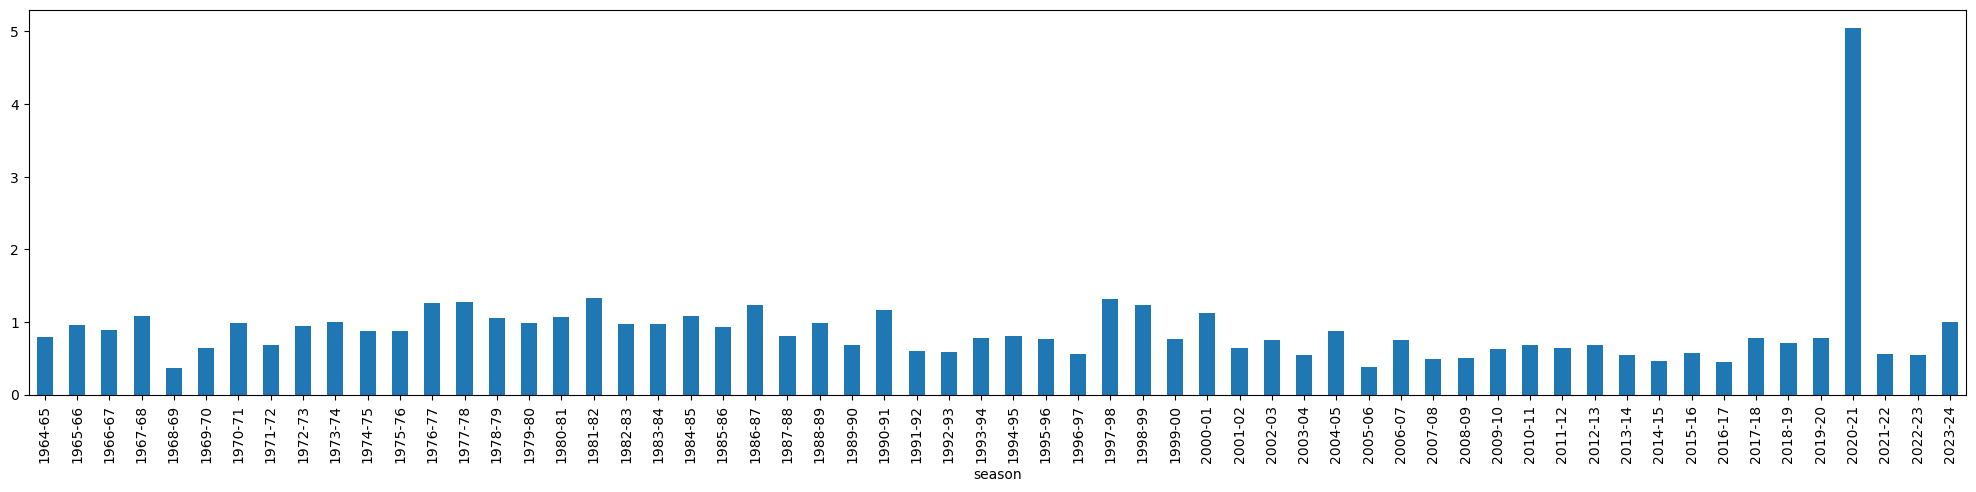

In [157]:
pd.Series(east[(east['remaining_teams_count'] > 2) & (east['remaining_teams_count'] <= 32) & (east['competition'] == 'UCL')].groupby('season')['attendance'].mean() / df[(df['remaining_teams_count'] > 2) & (df['remaining_teams_count'] <= 32) & (df['competition'] == 'UCL')].groupby('season')['attendance'].mean()).tail(60).plot.bar(figsize=(25,5))

In [158]:
east.groupby('city')['attendance'].median().nlargest(60)

city
Barcelona                   97000.0
Seville                     65000.0
Bari                        51587.0
Chorzow                     48617.0
Germany                     46969.0
Manchester                  43878.0
Odessa                      40887.0
Lyon                        39300.0
Lenin Dinamo Stadium        35000.0
Dresden                     33000.0
Kharkiv                     33000.0
Leipzig                     30800.0
Brussels                    30000.0
Volgograd                   26000.0
Kiev                        25811.5
Kyiv                        25610.5
Donetsk                     25500.0
Kryvyi Rih                  25440.0
Bytom                       25000.0
Magdeburg                   25000.0
Gdańsk                      24697.0
Karl-Marx-Stadt             24300.0
Lviv                        23618.0
Mielec                      23385.0
Split                       22800.0
Craiova                     22067.0
Aue                         22000.0
Krasnodar              

In [159]:
east.groupby('location')['attendance'].max().nlargest(50)

location
Red Star Stadium, Belgrade                   110000.0
Central Stadium, Kyiv                        102000.0
Olympic Stadium, Kyiv                        100069.0
Republican Stadium, Kyiv                     100067.0
Népstadion, Budapest                         100000.0
Camp Nou, Barcelona                           97000.0
Respublikanskiy Stadium, Kyiv                 93700.0
Lenin Dinamo Stadium, Tbilisi                 90000.0
Stadion Crvena Zvezda, Belgrade               90000.0
Vladimir Lenin Stadium, Tbilisi               90000.0
Marakana, Belgrade                            89806.0
Silesian Stadium, Chorzów                     89089.0
Central Lenin Stadium, Moscow                 86500.0
Stadion Crvena zvezda, Belgrade               85227.0
Central Stadium Vladimir Lenin, Moscow        85000.0
Stadionul August 23, Bucharest                85000.0
Olimpiyskiy National Sports Complex, Kyiv     83200.0
Olimpiyskiy NSC, Kyiv                         82750.0
Zentralstadion, Lei

In [160]:
df[df['season'] >= '2021-22'].groupby('location')['attendance'].median().nlargest(60)

location
Wembley Stadium, London                      86212.0
Westfalenstadion, Dortmund                   81182.5
Camp Nou, Barcelona                          75468.0
Allianz Arena, Munich                        75000.0
Stade de France, Saint-Denis                 75000.0
Old Trafford, Manchester                     73130.0
Atatürk Olympic Stadium, Istanbul            71412.0
San Siro, Milan                              71368.0
Metropolitano Stadium, Madrid                63423.5
Estádio do Sport Lisboa e Benfica, Lisbon    62594.0
Santiago Bernabéu, Madrid                    62271.5
Wanda Metropolitano Stadium, Madrid          60725.0
Emirates Stadium, London                     59929.0
Stade Vélodrome, Marseille                   56279.5
Puskás Aréna, Budapest                       56075.5
Celtic Park, Glasgow                         55436.0
Tottenham Hotspur Stadium, London            55180.0
Estádio da Luz, Lisbon                       55130.0
Johan Cruyff Arena, Amsterdam        

In [161]:
df[df['season'] > '2013-14'].groupby('awayTeam')['attendance'].median().nlargest(60)

awayTeam
Newcastle United            65695.0
Brighton & Hove Albion      57780.0
Paris Saint-Germain         49333.0
Barcelona                   47470.0
Real Madrid                 46585.0
Oostende                    46519.0
Manchester City             44855.5
Bayern Munich               44510.0
Juventus                    42186.0
Dinamo Bucharest            41845.0
Liverpool                   39186.5
Valencia                    39070.0
Atlético Madrid             37447.0
RB Leipzig                  37351.5
Porto                       36919.0
Rostov                      36896.0
Chelsea                     35127.0
Inter Milan                 34750.0
Borussia Dortmund           34598.0
Lens                        34055.5
Benfica                     33815.0
CSKA Moscow                 33651.5
Utrecht                     33446.0
Arsenal                     33228.0
Celta Vigo                  33117.0
Toulouse                    32719.0
Napoli                      32391.0
SC Freiburg        

In [162]:
east[(east['remaining_teams_count'] > 2) & (east['remaining_teams_count'] <= 32) & (east['competition'] == 'UCL')].groupby('season')['attendance'].mean()

season
1955-56    30000.000000
1956-57    38000.000000
1957-58    37750.000000
1958-59    24166.666667
1959-60    43125.000000
               ...     
2019-20    31405.208333
2020-21     6756.590909
2021-22    19505.400000
2022-23    26833.923077
2023-24    52031.769231
Name: attendance, Length: 69, dtype: float64

## A potential plot twist: is there _more_ European-level soccer in the East after all?

In [163]:
east['competition'].drop_duplicates()

2         CWC
2528       EL
15901     UCL
24186    UECL
Name: competition, dtype: object

<Axes: xlabel='season'>

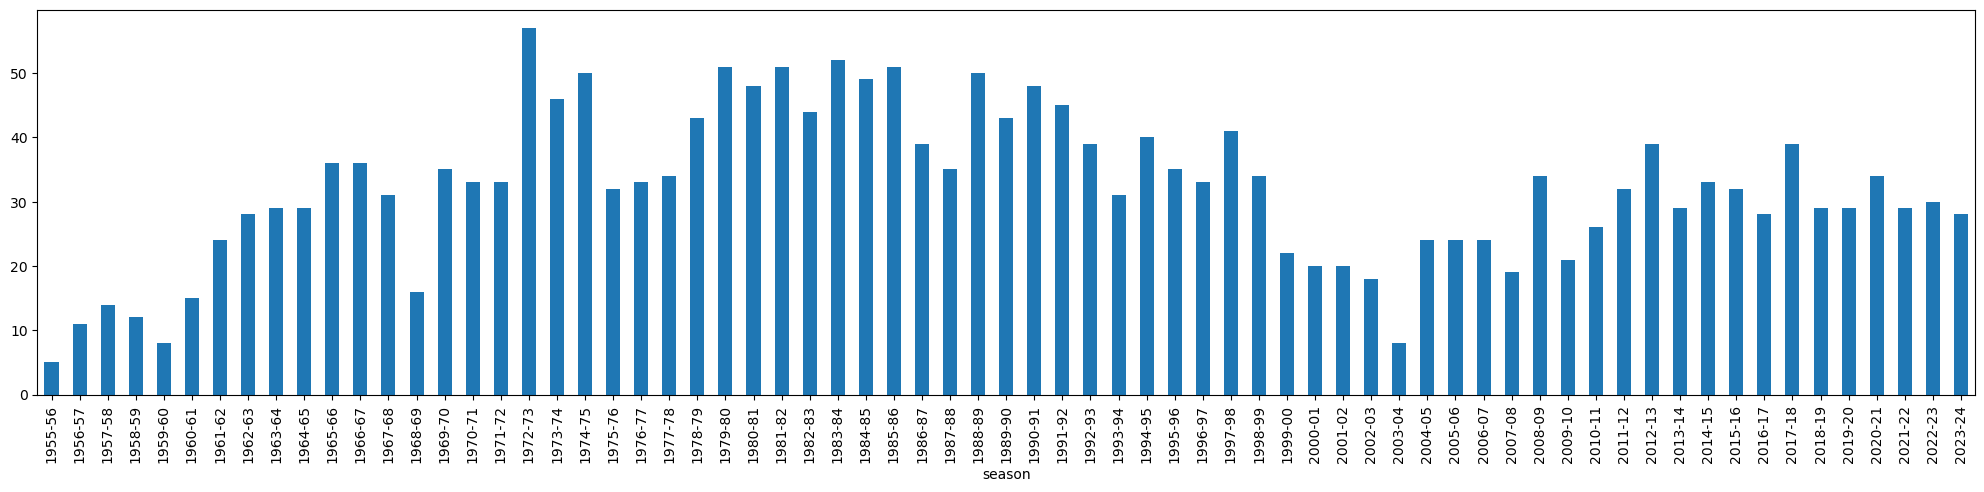

In [164]:
east[east['remaining_teams_count'] <= 32].groupby('season').size().plot.bar(figsize=(25,5))

In [165]:
top4 = df[df['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(4).index.to_list()
top4

['Real Madrid', 'Bayern Munich', 'Barcelona', 'Juventus']

In [166]:
df[df['homeTeam'].str.contains('Pozna',na=False)].groupby('homeTeam').size()

homeTeam
Lech Poznań    64
dtype: int64

In [167]:
top8 = ['Real Madrid','Milan','Inter Milan','Bayern Munich','Bayern Münich','FC Bayern Munich','Liverpool','Barcelona','FC Barcelona','Ajax','Manchester United']

In [168]:
df[df['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(20)

homeTeam
Real Madrid          245
Bayern Munich        195
Barcelona            174
Juventus             149
Manchester United    147
Benfica              144
Porto                137
Milan                134
Dynamo Kyiv          131
Ajax                 123
Liverpool            122
Celtic               113
Inter Milan          106
Arsenal              104
Anderlecht           101
PSV Eindhoven         98
Chelsea               96
Borussia Dortmund     93
Galatasaray           93
Olympiacos            93
dtype: int64

In [169]:
df.groupby('homeTeam').size().nlargest(20)

homeTeam
Real Madrid          291
Barcelona            263
Bayern Munich        249
Benfica              236
Juventus             227
Ajax                 222
Dynamo Kyiv          212
Anderlecht           210
Inter Milan          209
Milan                205
Porto                205
Liverpool            204
Celtic               203
Manchester United    200
PSV Eindhoven        197
Rangers              190
Olympiacos           182
Red Star Belgrade    178
Sporting CP          177
Club Brugge          176
dtype: int64

## Best EE clubs after 1990

In [170]:
east[(east['competition'] == 'UCL') & (east['season'] >= '1990-91')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(20)

homeTeam
Red Star Belgrade     2.0
Dynamo Kyiv           4.0
RB Leipzig            4.0
Spartak Moscow        4.0
CSKA Moscow           8.0
Dynamo Dresden        8.0
Hajduk Split          8.0
Shakhtar Donetsk      8.0
Sparta Prague         8.0
CSKA Sofia           16.0
Dinamo Bucharest     16.0
Ferencváros          16.0
Kispest Honvéd       16.0
Lech Poznań          16.0
Legia Warsaw         16.0
Levski Sofia         16.0
Lokomotiv Moscow     16.0
Slovan Bratislava    16.0
Steaua Bucharest     16.0
Widzew Łódź          16.0
Name: remaining_teams_count, dtype: float64

In [171]:
east[east['remaining_teams_count'] == 0]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina


In [172]:
east[(east['competition'] == 'EL') & (east['season'] >= '1990-91')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(20)

homeTeam
Dnipro Dnipropetrovsk      2.0
Shakhtar Donetsk           2.0
Zenit Saint Petersburg     2.0
CSKA Moscow                4.0
Dynamo Kyiv                4.0
RB Leipzig                 4.0
Slavia Prague              4.0
Spartak Moscow             4.0
Steaua Bucharest           4.0
Dinamo Zagreb              8.0
Levski Sofia               8.0
Metalist Kharkiv           8.0
Rapid Bucharest            8.0
Rubin Kazan                8.0
Sigma Olomouc              8.0
Slovan Liberec             8.0
Sparta Prague              8.0
Torpedo Moscow             8.0
Red Star Belgrade         15.0
Anzhi Makhachkala         16.0
Name: remaining_teams_count, dtype: float64

In [173]:
east[(east['season'] >= '1990-91')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(20)

homeTeam
Dnipro Dnipropetrovsk     2.0
Red Star Belgrade         2.0
Shakhtar Donetsk          2.0
Zenit Saint Petersburg    2.0
CSKA Moscow               4.0
Dynamo Kyiv               4.0
Legia Warsaw              4.0
Lokomotiv Moscow          4.0
RB Leipzig                4.0
Slavia Prague             4.0
Spartak Moscow            4.0
Steaua Bucharest          4.0
Dinamo Zagreb             8.0
Dynamo Dresden            8.0
Dynamo Moscow             8.0
Hajduk Split              8.0
Lech Poznań               8.0
Levski Sofia              8.0
Metalist Kharkiv          8.0
Rapid Bucharest           8.0
Name: remaining_teams_count, dtype: float64

In [174]:
df[df['awayTeam'] == 'Slavia Prague'].sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
5764,EL,1996-04-16,1-0,Bordeaux,France,FC_Girondins_de_Bordeaux,Slavia Prague,Czech Republic,SK_Slavia_Prague,"Stade du Parc Lescure, Bordeaux",semi-finals,31500.0,NaN,1995%E2%80%9396 UEFA Cup,1995-96,Bordeaux,4.0,Bordeaux,Bordeaux
14179,EL,2019-04-18,4-3,Chelsea,England,NaN,Slavia Prague,Czech Republic,NaN,"Stamford Bridge, London",quarter-finals,38326.0,NaN,2018%E2%80%9319 UEFA Europa League knockout phase,2018-19,London,8.0,Chelsea,Chelsea
5728,EL,1996-03-19,3-1,Roma,Italy,AS_Roma,Slavia Prague,Czech Republic,SK_Slavia_Prague,"Stadio Olimpico, Rome",quarter-finals,63859.0,NaN,1995%E2%80%9396 UEFA Cup,1995-96,Rome,8.0,Roma,Roma
24413,UECL,2022-04-07,3-3,Feyenoord,Netherlands,Feyenoord,Slavia Prague,Czech Republic,SK_Slavia_Prague,"De Kuip, Rotterdam",quarter-finals,42163.0,NaN,2021%E2%80%9322 UEFA Europa Conference League ...,2021-22,Rotterdam,8.0,Feyenoord,Feyenoord
6610,EL,2000-03-16,3-0,Leeds United,England,Leeds_United_F.C.,Slavia Prague,Czech Republic,SK_Slavia_Prague,"Elland Road, Leeds",quarter-finals,39519.0,NaN,1999%E2%80%932000 UEFA Cup,1999-00,Leeds,8.0,Leeds,United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13295,EL,2016-07-14,3-1,Levadia Tallinn,Estonia,FC_Levadia_Tallinn,Slavia Prague,Czech Republic,SK_Slavia_Prague,"Kadriorg Stadium, Tallinn",second qualifying round,2750.0,NaN,2016%E2%80%9317 UEFA Europa League qualifying ...,2016-17,Tallinn,140.0,Levadia,Tallinn
15764,EL,NaT,1-1,Dnipro-1,Ukraine,SC_Dnipro-1,Slavia Prague,Czech Republic,SK_Slavia_Prague,NaN,qualifying phase and play-off round,NaN,2023-08-10,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24,NaN,NaN,Dnipro-1,Dnipro-1
15784,EL,NaT,2-1,Zorya Luhansk,Ukraine,FC_Zorya_Luhansk,Slavia Prague,Czech Republic,SK_Slavia_Prague,NaN,qualifying phase and play-off round,NaN,2023-08-24,2023%E2%80%9324 UEFA Europa League qualifying ...,2023-24,NaN,NaN,Zorya,Luhansk
24130,UCL,2024-08-20,2-0,Lille,France,Lille_OSC,Slavia Prague,Czech Republic,SK_Slavia_Prague,"Stade du Hainaut, Valenciennes",play-off round,15019.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Valenciennes,NaN,Lille,Lille


In [175]:
east[(east['competition'] == 'UECL') & (east['season'] >= '1990-91')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(20)

homeTeam
Lech Poznań            8.0
Slavia Prague          8.0
Viktoria Plzeň         8.0
Dinamo Zagreb         16.0
Partizan              16.0
Sheriff Tiraspol      16.0
Slovan Bratislava     16.0
CFR Cluj              24.0
Dnipro-1              24.0
Ferencváros           24.0
Legia Warsaw          24.0
Ludogorets Razgrad    24.0
Qarabağ               24.0
Sparta Prague         24.0
Alashkert             40.0
Astana                40.0
Ballkani              40.0
CSKA Sofia            40.0
FCSB                  40.0
Flora                 40.0
Name: remaining_teams_count, dtype: float64

In [176]:
east[(east['competition'] == 'UCL') & (east['homeTeam'] == 'Sparta Prague') & (east['season'] >= '1990-91')].tail(20)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
20102,UCL,2004-08-25,2-0,Sparta Prague,Czech Republic,AC_Sparta_Prague,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"Stadion Letná, Prague",third qualifying round,18010.0,NaN,2004%E2%80%9305 UEFA Champions League qualifyi...,2004-05,Prague,48.0,Sparta,Prague
20141,UCL,2005-09-14,1-1,Sparta Prague,Czech Republic,AC_Sparta_Prague,Ajax,Netherlands,AFC_Ajax,"Letná Stadium, Prague",group stage,15386.0,NaN,2005%E2%80%9306 UEFA Champions League group stage,2005-06,Prague,32.0,Sparta,Prague
20166,UCL,2005-10-18,0-2,Sparta Prague,Czech Republic,AC_Sparta_Prague,Arsenal,England,Arsenal_F.C.,"Letná Stadium, Prague",group stage,12528.0,NaN,2005%E2%80%9306 UEFA Champions League group stage,2005-06,Prague,32.0,Sparta,Prague
20221,UCL,2005-12-07,0-0,Sparta Prague,Czech Republic,AC_Sparta_Prague,Thun,Switzerland,FC_Thun,"Letná Stadium, Prague",group stage,9233.0,NaN,2005%E2%80%9306 UEFA Champions League group stage,2005-06,Prague,32.0,Sparta,Prague
20682,UCL,2007-08-15,0-2,Sparta Prague,Czech Republic,AC_Sparta_Prague,Arsenal,England,Arsenal_F.C.,"Generali Arena, Prague",third qualifying round,19856.0,NaN,2007%E2%80%9308 UEFA Champions League qualifyi...,2007-08,Prague,48.0,Sparta,Prague
20879,UCL,2008-08-06,2-0,Sparta Prague,Czech Republic,AC_Sparta_Prague,Sheriff Tiraspol,Moldova,FC_Sheriff_Tiraspol,"AXA Arena, Prague",second qualifying round,11479.0,NaN,2008%E2%80%9309 UEFA Champions League qualifyi...,2008-09,Prague,63.0,Sparta,Prague
20896,UCL,2008-08-13,1-2,Sparta Prague,Czech Republic,AC_Sparta_Prague,Panathinaikos,Greece,Panathinaikos_F.C.,"AXA Arena, Prague",third qualifying round,14478.0,NaN,2008%E2%80%9309 UEFA Champions League qualifyi...,2008-09,Prague,49.0,Sparta,Prague
21103,UCL,2009-07-28,3-1,Sparta Prague,Czech Republic,AC_Sparta_Prague,Panathinaikos,Greece,Panathinaikos_F.C.,"AXA Arena, Prague",third qualifying round,12058.0,NaN,2009%E2%80%9310 UEFA Champions League qualifyi...,2009-10,Prague,57.0,Sparta,Prague
21233,UCL,2010-08-17,0-2,Sparta Prague,Czech Republic,AC_Sparta_Prague,Žilina,Slovakia,M%C5%A0K_%C5%BDilina,"Generali Arena, Prague",play-off round,18744.0,NaN,2010%E2%80%9311 UEFA Champions League qualifyi...,2010-11,Prague,42.0,Sparta,Prague
21306,UCL,2010-07-21,2-0,Sparta Prague,Czech Republic,AC_Sparta_Prague,Liepājas Metalurgs,Latvia,FK_Liep%C4%81jas_Metalurgs,"Generali Arena, Prague",second qualifying round,8025.0,NaN,2010%E2%80%9311 UEFA Champions League qualifyi...,2010-11,Prague,74.0,Sparta,Prague


In [177]:
east[(east['competition'] == 'UCL') & (east['season'] >= '2013-14')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(30)

homeTeam
RB Leipzig                 4.0
Dynamo Kyiv               16.0
Shakhtar Donetsk          16.0
Zenit Saint Petersburg    16.0
Astana                    32.0
BATE Borisov              32.0
CSKA Moscow               32.0
Dinamo Zagreb             32.0
Ferencváros               32.0
Krasnodar                 32.0
Legia Warsaw              32.0
Lokomotiv Moscow          32.0
Ludogorets Razgrad        32.0
Maribor                   32.0
Qarabağ                   32.0
Red Star Belgrade         32.0
Rostov                    32.0
Sheriff Tiraspol          32.0
Slavia Prague             32.0
Spartak Moscow            32.0
Steaua Bucharest          32.0
Union Berlin              32.0
Viktoria Plzeň            32.0
CFR Cluj                  38.0
Raków Częstochowa         38.0
Vidi                      38.0
FCSB                      42.0
Partizan                  42.0
Rijeka                    42.0
Shakhter Karagandy        42.0
Name: remaining_teams_count, dtype: float64

## Groups

In [178]:
df[(df['competition'] == 'UCL') & (df['phase'].str.contains('group',na=False))].groupby('season')['homeTeam'].nunique()

season
1991-92     8
1992-93     8
1993-94     8
1994-95    16
1995-96    16
1996-97    16
1997-98    24
1998-99    24
1999-00    32
2000-01    32
2001-02    32
2002-03    32
2003-04    32
2004-05    32
2005-06    32
2006-07    32
2007-08    32
2008-09    32
2009-10    32
2010-11    32
2011-12    32
2012-13    32
2013-14    32
2014-15    32
2015-16    32
2016-17    32
2017-18    32
2018-19    32
2019-20    32
2020-21    32
2021-22    32
2022-23    32
2023-24    32
Name: homeTeam, dtype: int64

<Axes: xlabel='season'>

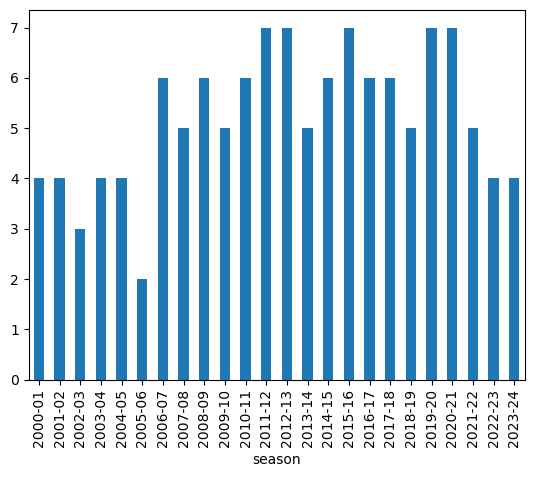

In [179]:
east[(east['competition'] == 'UCL') & (east['phase'].str.contains('group',na=False)) & (east['season'] > '1999-00')].groupby('season')['homeTeam'].nunique().plot.bar()

## Final match host cities

In [180]:
df[df['phase'] == 'final'].groupby(['competition','season']).size().nlargest(50)

competition  season 
CWC          1960-61    2
             1961-62    2
             1963-64    2
             1970-71    2
EL           1971-72    2
             1972-73    2
             1973-74    2
             1974-75    2
             1975-76    2
             1976-77    2
             1977-78    2
             1978-79    2
             1979-80    2
             1980-81    2
             1981-82    2
             1982-83    2
             1983-84    2
             1984-85    2
             1985-86    2
             1986-87    2
             1987-88    2
             1988-89    2
             1989-90    2
             1990-91    2
             1991-92    2
             1992-93    2
             1993-94    2
             1994-95    2
             1995-96    2
             1996-97    2
UCL          1973-74    2
CWC          1962-63    1
             1964-65    1
             1965-66    1
             1966-67    1
             1967-68    1
             1968-69    1
             1969

In [181]:
df[(df['phase'] == 'final') & (df['competition'] == 'UCL')].tail(20)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
19694,UCL,2004-05-26,0-3,Monaco,France,AS_Monaco_FC,Porto,Portugal,FC_Porto,"Arena AufSchalke, Gelsenkirchen",final,53053.0,NaN,2003%E2%80%9304 UEFA Champions League knockout...,2003-04,Gelsenkirchen,2.0,Monaco,Monaco
19899,UCL,2005-05-25,3-3,Milan,Italy,A.C._Milan,Liverpool,England,Liverpool_F.C.,"Atatürk Olympic Stadium, Istanbul",final,70025.0,NaN,2004%E2%80%9305 UEFA Champions League knockout...,2004-05,Istanbul,2.0,Milan,Milan
20104,UCL,2006-05-17,2-1,Barcelona,Spain,FC_Barcelona,Arsenal,England,Arsenal_F.C.,"Stade de France, Saint-Denis",final,79610.0,NaN,2005%E2%80%9306 UEFA Champions League knockout...,2005-06,Saint-Denis,2.0,Barcelona,Barcelona
20491,UCL,2008-05-21,1-1,Manchester United,England,Manchester_United_F.C.,Chelsea,England,Chelsea_F.C.,"Luzhniki Stadium, Moscow",final,67310.0,NaN,2007%E2%80%9308 UEFA Champions League knockout...,2007-08,Moscow,2.0,Manchester,United
20704,UCL,2009-05-27,2-0,Barcelona,Spain,FC_Barcelona,Manchester United,England,Manchester_United_F.C.,"Stadio Olimpico, Rome",final,62467.0,NaN,2008%E2%80%9309 UEFA Champions League knockout...,2008-09,Rome,2.0,Barcelona,Barcelona
20917,UCL,2010-05-22,0-2,Bayern Munich,Germany,FC_Bayern_Munich,Inter Milan,Italy,Inter_Milan,"Santiago Bernabéu Stadium, Madrid",final,73490.0,NaN,2009%E2%80%9310 UEFA Champions League knockout...,2009-10,Madrid,2.0,Bayern,Munich
21130,UCL,2011-05-28,3-1,Barcelona,Spain,FC_Barcelona,Manchester United,England,Manchester_United_F.C.,"Wembley Stadium, London",final,87695.0,NaN,2010%E2%80%9311 UEFA Champions League knockout...,2010-11,London,2.0,Barcelona,Barcelona
21343,UCL,2012-05-19,1-1,Bayern Munich,Germany,FC_Bayern_Munich,Chelsea,England,Chelsea_F.C.,"Allianz Arena, Munich",final,62500.0,NaN,2011%E2%80%9312 UEFA Champions League knockout...,2011-12,Munich,2.0,Bayern,Munich
21556,UCL,2013-05-25,1-2,Borussia Dortmund,Germany,Borussia_Dortmund,Bayern Munich,Germany,FC_Bayern_Munich,"Wembley Stadium, London",final,86298.0,NaN,2012%E2%80%9313 UEFA Champions League knockout...,2012-13,London,2.0,Borussia,Dortmund
21769,UCL,2014-05-24,4-1,Real Madrid,Spain,Real_Madrid_CF,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Estádio da Luz, Lisbon",final,60976.0,NaN,2013%E2%80%9314 UEFA Champions League knockout...,2013-14,Lisbon,2.0,Real,Madrid


In [182]:
df[df['phase'].str[0:4] == 'fina']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
0,CWC,1961-05-17,0-2,Rangers,Scotland,Rangers_F.C.,Fiorentina,Italy,ACF_Fiorentina,"Ibrox Park, Glasgow",final,80000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Glasgow,2.0,Rangers,Rangers
1,CWC,1961-05-27,2-1,Fiorentina,Italy,NaN,Rangers,Scotland,NaN,"Stadio Comunale, Florence",final,27000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Florence,2.0,Fiorentina,Fiorentina
18,CWC,1962-05-10,1-1,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,Fiorentina,Italy,ACF_Fiorentina,"Hampden Park, Glasgow",final,27000.0,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Glasgow,2.0,Atlético,Madrid
19,CWC,1962-09-05,3-0,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,Fiorentina,Italy,ACF_Fiorentina,"Neckarstadion, Stuttgart",final,38000.0,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Stuttgart,2.0,Atlético,Madrid
63,CWC,1963-05-15,5-1,Tottenham Hotspur,England,Tottenham_Hotspur_F.C.,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Feijenoord Stadion, Rotterdam",final,49000.0,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1962-63,Rotterdam,2.0,Tottenham,Hotspur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23672,UCL,2023-06-10,1-0,Manchester City,England,Manchester_City_F.C.,Inter Milan,Italy,Inter_Milan,"Atatürk Olympic Stadium, Istanbul",final,71412.0,NaN,2022%E2%80%9323 UEFA Champions League knockout...,2022-23,Istanbul,2.0,Manchester,City
23886,UCL,2024-06-01,0-2,Borussia Dortmund,Germany,Borussia_Dortmund,Real Madrid,Spain,Real_Madrid_CF,"Wembley Stadium, London",final,86212.0,NaN,2023%E2%80%9324 UEFA Champions League knockout...,2023-24,London,2.0,Borussia,Dortmund
24183,UECL,2022-05-25,1-0,Roma,Italy,AS_Roma,Feyenoord,Netherlands,Feyenoord,"Arena Kombëtare, Tirana",final,19597.0,NaN,2021%E2%80%9322 UEFA Europa Conference League ...,2021-22,Tirana,2.0,Roma,Roma
24640,UECL,2023-06-07,1-2,Fiorentina,Italy,ACF_Fiorentina,West Ham United,England,West_Ham_United_F.C.,"Fortuna Arena, Prague",final,17363.0,NaN,2022%E2%80%9323 UEFA Europa Conference League ...,2022-23,Prague,2.0,Fiorentina,Fiorentina


## Charts

In [183]:
def irozhlas_graf(
    carovy=[],
    sloupcovy=[],
    vodorovny=[],
    procenta=[],
    skryte=[],
    barvy=[],
    histogram=False,
    max_procenta=100,
    target="",
    titulek="",
    podtitulek="",
    naproti = [],
    osay=" ",
    osay2=" ",
    osaymin=None,
    osaymax=None,
    kredity=["zdroj dat a autorstvo", "url odkazu"],
    zaokrouhleni=1,
    prvni=True,
    skladany=False,
    naopak=False,
    vzhurunohama=False,
    skrytnuly=False,
):
    """
    Funkce vygeneruje HighCharts graf z pandas Series (jedné nebo více).

    iROZHLAS-friendly barvy:
    - "#b2e061" světle zelená
    - "#7eb0d5" světle modrá
    - "#fd7f6f" světle červená
    - "#bd7ebe" světle fialová
    - "#ffb55a" oranžová
    - "#ffee65" žlutá
    - "#beb9db" levandulová
    - "#fdcce5" skoro černá
    - "#8bd3c7" světle tyrkysová
    """

    import os
    import pandas as pd
    from highcharts_core.chart import Chart
    from highcharts_core.options.series.area import LineSeries
    from highcharts_core.options.series.bar import ColumnSeries
    from highcharts_core.options.series.bar import BarSeries
    from highcharts_core.options.series.histogram import HistogramSeries
    from highcharts_core.options.legend import Legend
    from highcharts_core.options.title import Title
    from highcharts_core.options.subtitle import Subtitle
    from highcharts_core.options.credits import Credits

    nastaveni = {}

    if prvni:
        zdrojaky = f"""<script src="https://code.highcharts.com/highcharts.js"></script><style type="text/css">text{{font-family:"Asap"!important}}.paragraph{{font-family:"Noticia text"!important}}.href{{color:#666;fill:#666}}.highcharts-title{{font-family:"Noticia text"!important;font-weight:700!important;text-align:left!important;left:10px!important}}.highcharts-subtitle{{text-align:left!important;font-size:.95rem!important;left:10px!important;font-family:"Asap"!important}}.highcharts-data-labels text{{font-size:.85rem!important}}.highcharts-axis-labels text{{font-size:.85rem!important}}text.highcharts-plot-line-label{{font-size:.85rem!important;fill:#666}}text.highcharts-plot-band-label{{font-size:.85rem!important;fill:#666}}text.highcharts-credits{{font-size:.75rem!important}}.highcharts-tooltip span{{font-family:"Asap"!important}}.axis-label-on-tick{{fill:#aaa;color:#aaa}}.mock-empty-line{{fill:#fff;color:#fff}}</style>"""
    else:
        zdrojaky = ""

    pred = f"""{zdrojaky}
        <figure id="{target}">
        <div id="container"></div>
        </figure>
        <script>"""

    if len(carovy) > 0:
        categories = carovy[0].index.to_list()
    if len(sloupcovy) > 0:
        categories = sloupcovy[0].index.to_list()
    if len(vodorovny) > 0:
        categories = vodorovny[0].index.to_list()

    categories = [str(x) for x in categories]

    nastaveni["xAxis"] = {"categories": categories, "min": 0}
    nastaveni["yAxis"] = [
        {
            "title": {"text": osay},
            "reversed": vzhurunohama,
            "max": osaymax,
            "min": osaymin,
        }
    ]

    if skladany:
        if len(sloupcovy) > 0:
            nastaveni["plotOptions"] = {"column": {"stacking": "normal"}}
        if len(vodorovny) > 0:
            nastaveni["plotOptions"] = {"bar": {"stacking": "normal"}}
    if histogram:
        nastaveni["plotOptions"] = {
            "column": {
                "pointPadding": 0,
                "borderWidth": 0,
                "groupPadding": 0,
                "shadow": False,
            }
        }

    if len(procenta) > 0:
        osa_procent = {
            "title": {"text": osay2},
            "max": max_procenta,
            "min": 0,
            "labels": {"format": "{value} %"},
        }

        if len(procenta) != len(carovy) + len(sloupcovy):
            osa_procent["opposite"] = True
            druha_osa = 1
            nastaveni["yAxis"].append(osa_procent)
            nastaveni["alignTicks"] = False
        if len(procenta) == len(carovy) + len(sloupcovy):
            nastaveni["yAxis"] = [osa_procent]
            druha_osa = 0
            
    if len(naproti) > 0:
        druha_osa = 1
        druha_osa_y =  {
            "title": {"text": osay2},
            "opposite": True,
            "max": naproti[0].max(),
            "min": 0
        }
        nastaveni["yAxis"].append(druha_osa_y)

    my_chart = Chart(container=target, options=nastaveni)

    procenta = [p.name for p in procenta]
    naproti = [n.name for n in naproti]
    skryte = [s.name for s in skryte]

    def vykresleni(serie, typ):
        for s in serie:
            popisek = s.name

            if s.name in skryte:
                viditelnost = False
            else:
                viditelnost = True

            ktera_osa = 0
            if s.name in naproti:
                ktera_osa = druha_osa
                
            if s.name in procenta:
                s = [round(x * 100, zaokrouhleni) for x in s.fillna(0).to_list()]
                my_chart.add_series(
                    typ(
                        data=s,
                        visible=viditelnost,
                        name=popisek,
                        y_axis=druha_osa,
                        tooltip={"valueSuffix": " %"},
                    )
                )
                    
            else:
                my_chart.add_series(
                    typ(
                        data=s.fillna(0).to_list(),
                        visible=viditelnost,
                        name=popisek,
                        y_axis=ktera_osa,
                    )
                )

    if len(sloupcovy) > 0:
        vykresleni(sloupcovy, ColumnSeries)
    if len(carovy) > 0:
        vykresleni(carovy, LineSeries)
    if len(vodorovny) > 0:
        vykresleni(vodorovny, BarSeries)

    if len(barvy) > 0:
        my_chart.options.colors = barvy
    else:
        my_chart.options.colors = colors = [
            "#b2e061",  ## světle zelená (light green)
            "#7eb0d5",  ## světle modrá (light blue)
            "#fd7f6f",  ## světle červená (light red)
            "#bd7ebe",  ## světle fialová (light purple)
            "#ffb55a",  ## oranžová (orange)
            "#ffee65",  ## žlutá (yellow)
            "#beb9db",  ## levandulová (lavender)
            "#fdcce5",  ## skoro černá
            "#8bd3c7",  ## světle tyrkysová (light turquoise)
        ]

    if naopak:
        my_chart.options.legend = Legend(reversed=True)

    my_chart.options.title = Title(text=titulek, align="left", margin=30)

    if len(podtitulek) > 0:
        my_chart.options.subtitle = Subtitle(text=podtitulek, align="left")

    my_chart.options.credits = Credits(text=kredity[0], enabled=True, href=kredity[1])

    as_js_literal = my_chart.to_js_literal()

    if skrytnuly == True:
        as_js_literal = as_js_literal.replace("y: 0.0", "y: null")

    code = f"<html><head><title>{titulek}</title></head><body>{pred}{as_js_literal}</script></body></html>"

    if not os.path.exists("grafy"):
        os.mkdir("grafy")

    with open(os.path.join("grafy", target + ".html"), "w+") as f:
        f.write(code)

    with open(os.path.join("grafy", target + ".txt"), "w+") as f:
        f.write(f"{pred}{as_js_literal}</script>")

        print("Graf uložen.")

In [184]:
ligamistru = pd.Series(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons).fillna(0), name="PMEZ / Liga mistrů")
uefa = pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons).fillna(0), name="Pohár UEFA / EL")
pvp = pd.Series(east[(east['competition'] == 'CWC') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons).fillna(0), name="Pohár vítězů pohárů")
uecl = pd.Series(east[(east['competition'] == 'UECL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons).fillna(0), name="Konferenční liga")

In [185]:
podpis = ['Vizualizace: Samizdat, datový tým Českého rozhlasu','https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika']

In [186]:
east[east['homeTeam'].str.contains('namo',na=False)].groupby('homeTeam').size().nlargest(50)

homeTeam
Dynamo Kyiv         212
Dinamo Zagreb       152
Dinamo Bucharest     89
Dinamo Tbilisi       85
Dinamo Minsk         69
Dynamo Moscow        53
Dynamo Dresden       46
BFC Dynamo           30
Dinamo Tirana        19
Dynamo Brest          6
Dinamo-93 Minsk       3
Dinamo Brest          2
Dynamo Žilina         2
Dynamo Baku           1
dtype: int64

In [187]:
east[(east['remaining_teams_count'] <= 8)].groupby('homeTeam')['season'].nunique().nlargest(10)

homeTeam
Dynamo Kyiv          16
Red Star Belgrade    13
Dynamo Dresden        8
Sparta Prague         8
Hajduk Split          7
Spartak Moscow        7
Dukla Prague          6
Slavia Prague         6
Steaua Bucharest      6
Dynamo Moscow         5
Name: season, dtype: int64

In [188]:
east[(east['remaining_teams_count'] <= 8)].groupby('homeTeam')['date'].max().nlargest(10)

homeTeam
Viktoria Plzeň           2024-04-11
Lech Poznań              2023-04-13
RB Leipzig               2022-04-28
Slavia Prague            2022-04-14
Dinamo Zagreb            2021-04-08
Shakhtar Donetsk         2020-08-11
CSKA Moscow              2018-04-12
Sparta Prague            2016-04-14
Dnipro Dnipropetrovsk    2015-05-27
Zenit Saint Petersburg   2015-04-23
Name: date, dtype: datetime64[ns]

In [189]:
east[east['date'] == '2016-04-14']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
12761,EL,2016-04-14,4-0,Shakhtar Donetsk,Ukraine,NaN,Braga,Portugal,NaN,"Arena Lviv, Lviv",quarter-finals,33617.0,NaN,2015%E2%80%9316 UEFA Europa League knockout phase,2015-16,Lviv,8.0,Shakhtar,Donetsk
12762,EL,2016-04-14,2-4,Sparta Prague,Czech Republic,NaN,Villarreal,Spain,NaN,"Generali Arena, Prague",quarter-finals,18201.0,NaN,2015%E2%80%9316 UEFA Europa League knockout phase,2015-16,Prague,8.0,Sparta,Prague


In [190]:
irozhlas_graf(sloupcovy=[ligamistru, uefa, pvp, uecl], skladany=True, target="ctvrtfinale", kredity=podpis, titulek="Východoevropské kluby mezi 8 nejlepšími v pohárech", podtitulek='Do nejvíce čtvrtfinále (či odpovídající skupinové fáze) se podívalo Dynamo Kyjev, v 16 sezonách. Následuje Crvena zvezda Bělehrad, na sdíleném třetím místě je Sparta.', barvy=["#fd7f6f","#7eb0d5","#b2e061","#ffee65"])

Graf uložen.


In [191]:
df[df['homeTeam'] == 'Dynamo Kyiv'].tail(10)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
23553,UCL,2021-11-23,1-2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Bayern Munich,Germany,FC_Bayern_Munich,"NSC Olimpiyskiy, Kyiv",group stage,28732.0,NaN,2021%E2%80%9322 UEFA Champions League group stage,2021-22,Kyiv,32.0,Dynamo,Kyiv
23802,UCL,2022-08-17,0-2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Benfica,Portugal,S.L._Benfica,"Stadion Miejski im. Władysława Króla, Łódź, Po...",play-off round,16450.0,NaN,2022%E2%80%9323 UEFA Champions League qualifyi...,2022-23,Poland,38.0,Dynamo,Kyiv
23845,UCL,2022-07-20,0-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Fenerbahçe,Turkey,Fenerbah%C3%A7e_S.K._(football),"Stadion Miejski im. Władysława Króla, Łódź, Po...",second qualifying round,11603.0,NaN,2022%E2%80%9323 UEFA Champions League qualifyi...,2022-23,Poland,60.0,Dynamo,Kyiv
23872,UCL,2022-08-03,1-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Sturm Graz,Austria,SK_Sturm_Graz,"Stadion Miejski im. Władysława Króla, Łódź, Po...",third qualifying round,6092.0,NaN,2022%E2%80%9323 UEFA Champions League qualifyi...,2022-23,Poland,48.0,Dynamo,Kyiv
24131,UCL,2024-08-21,0-2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Red Bull Salzburg,Austria,FC_Red_Bull_Salzburg,"Arena Lublin, Lublin, Poland",play-off round,7126.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Poland,NaN,Dynamo,Kyiv
24137,UCL,2024-07-23,6-2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Partizan,Serbia,FK_Partizan,"Arena Lublin, Lublin, Poland",second qualifying round,4712.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Poland,NaN,Dynamo,Kyiv
24163,UCL,2024-08-06,1-1,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Rangers,Scotland,Rangers_F.C.,"Arena Lublin, Lublin, Poland",third qualifying round,8315.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Poland,NaN,Dynamo,Kyiv
25235,UECL,2023-08-24,2-3,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Beşiktaş,Turkey,Be%C5%9Fikta%C5%9F_J.K.,"Stadionul Rapid-Giulești, Bucharest, Romania",play-off round,NaN,NaN,2023%E2%80%9324 UEFA Europa Conference League ...,2023-24,Romania,62.0,Dynamo,Kyiv
25469,UECL,2023-08-17,2-1,Dynamo Kyiv,Ukraine,NaN,Aris,Greece,NaN,"Stadionul Rapid-Giulești, Bucharest, Romania",third qualifying round,4461.0,NaN,2023%E2%80%9324 UEFA Europa Conference League ...,2023-24,Romania,94.0,Dynamo,Kyiv
25493,UECL,NaT,2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Aris,Greece,Aris_Thessaloniki_F.C.,NaN,third qualifying round,NaN,2023-08-09,2023%E2%80%9324 UEFA Europa Conference League ...,2023-24,NaN,94.0,Dynamo,Kyiv


In [192]:
dobryfotbal = pd.Series(east[east['awayTeam'].isin(top8)].groupby('season')['homeTeam'].nunique().reindex(allseasons[:-1]), name="proti Realu, Interu, AC Milán, Bayernu, Liverpoolu, Barceloně, Ajaxu a Manchasteru United")

In [193]:
dobryfotbal.tail(15).mean()

6.0

<Axes: xlabel='season'>

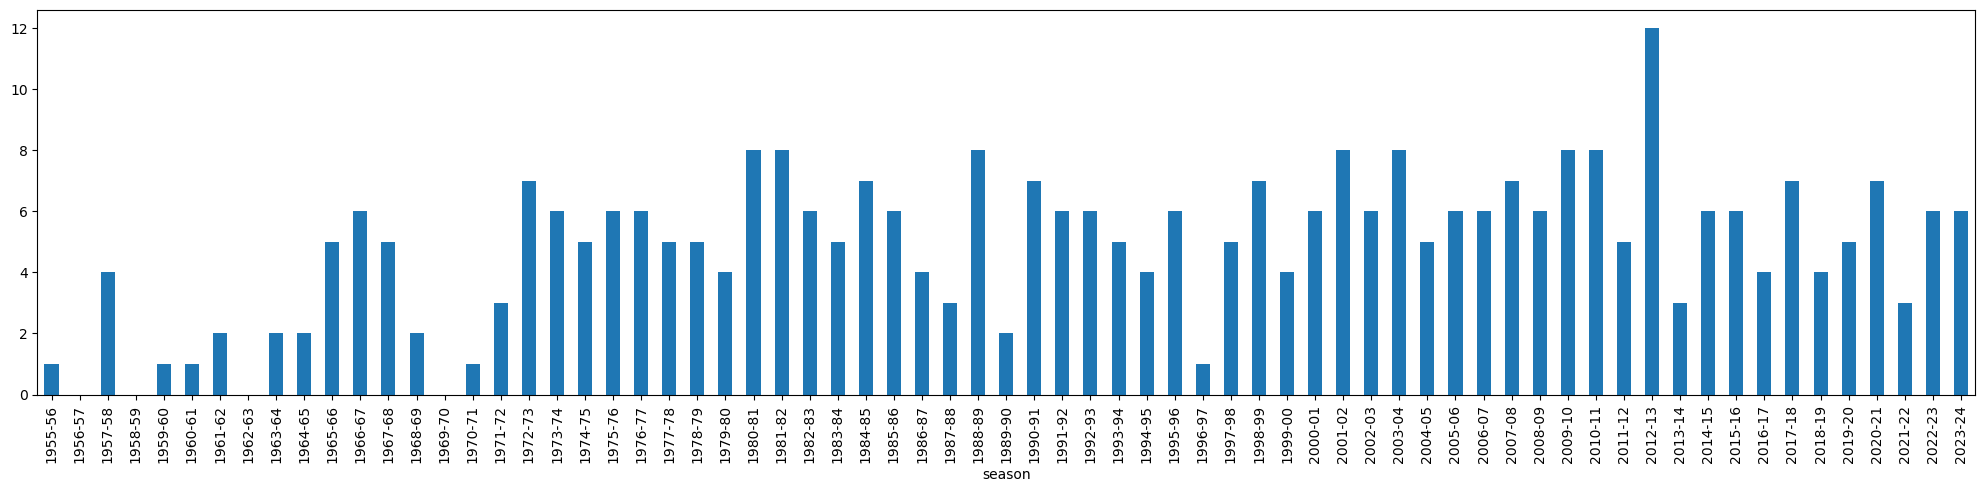

In [194]:
dobryfotbal.plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

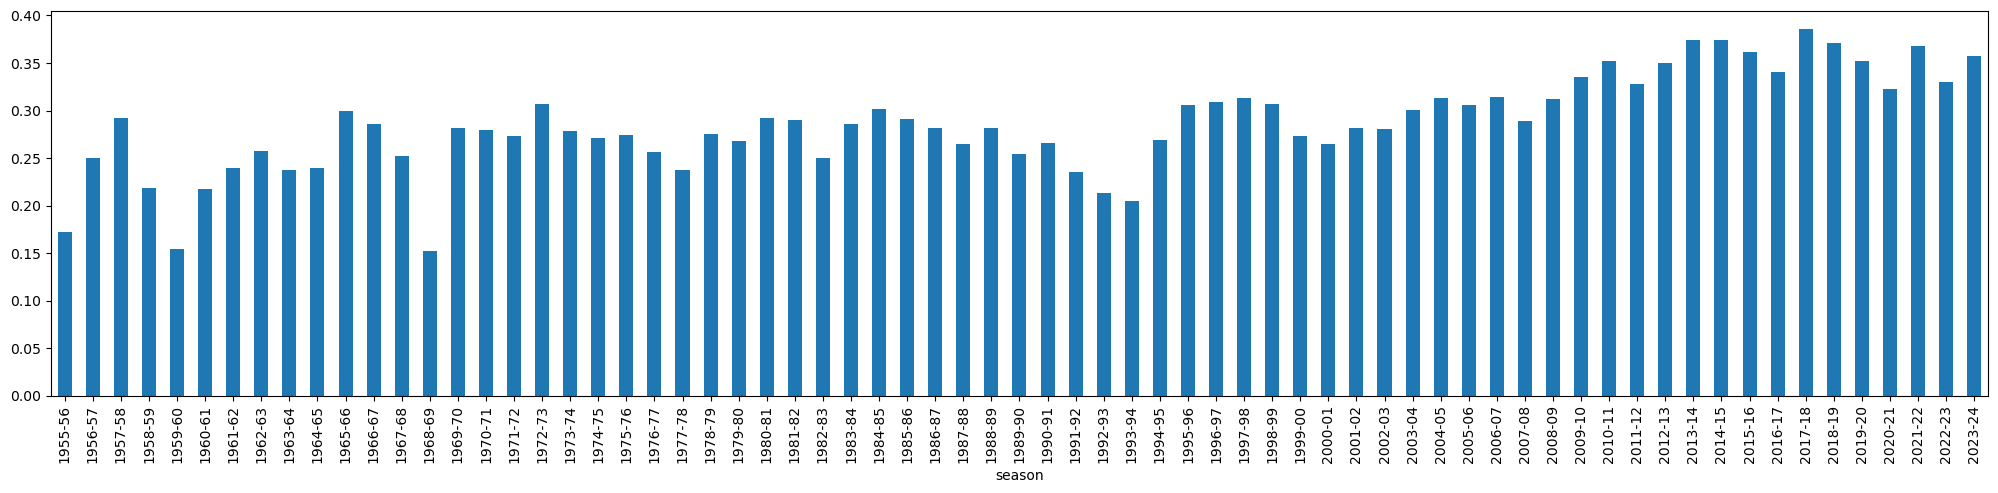

In [195]:
pd.Series(east.groupby('season').size().reindex(allseasons[:-1]) / df.groupby('season').size().reindex(allseasons[:-1])).plot.bar(figsize=(25,5))

In [196]:
vsechenfotbal = pd.Series(east.groupby('season').size().reindex(allseasons[:-1]), name="všechna utkání")

In [197]:
fotbal_v_zapadni_ctyrce = pd.Series(four.groupby('season').size().reindex(allseasons[:-1]), name="všechna utkání")

<Axes: xlabel='season'>

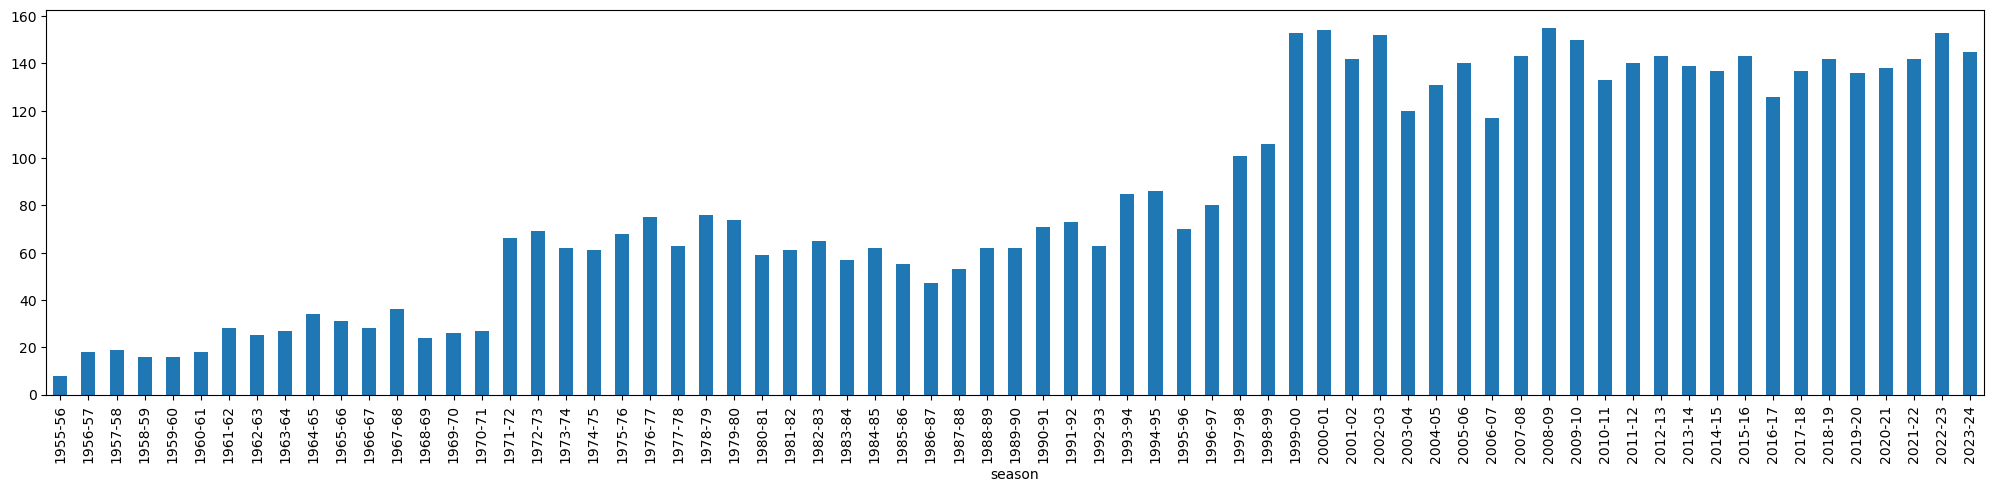

In [198]:
fotbal_v_zapadni_ctyrce.plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

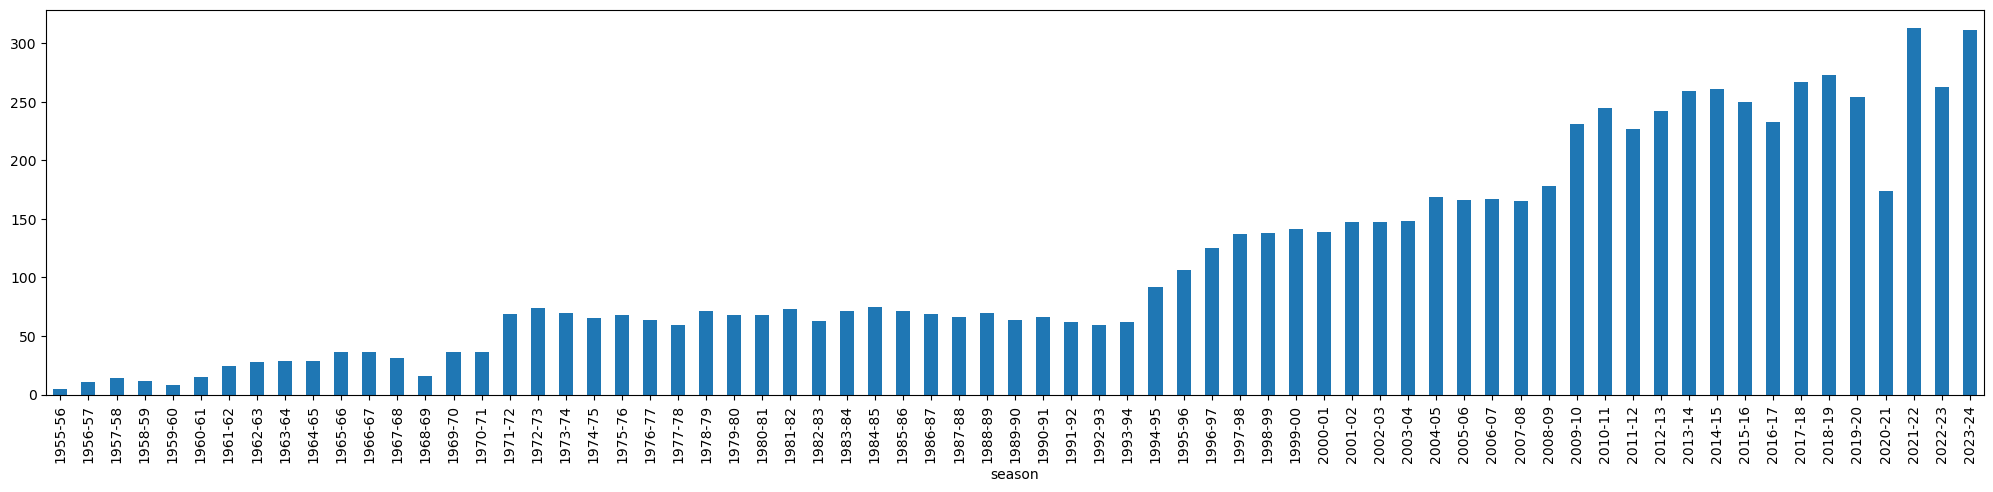

In [199]:
vsechenfotbal.plot.bar(figsize=(25,5))

In [200]:
irozhlas_graf(sloupcovy=[dobryfotbal], carovy=[vsechenfotbal], naproti = [dobryfotbal], osay="Celkem utkání", osay2="Utkání s top 8 týmy", target="vsecko", kredity=podpis, titulek="Domácí utkání východoevropských klubů ve všech kolech i předkolech evropských pohárů", barvy=["#ffee65","#fd7f6f"])

Graf uložen.


## Still looking for errors

In [201]:
df[df['homeTeam'].str.contains('Púchov')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
6989,EL,2001-09-11,0-0,Matador Púchov,Slovakia,M%C5%A0K_P%C3%BAchov,Freiburg,Germany,SC_Freiburg,"Mestský štadión, Púchov",first round,5476.0,NaN,2001%E2%80%9302 UEFA Cup,2001-02,Púchov,105.0,Matador,Púchov
7123,EL,2001-08-09,3-0,Matador Púchov,Slovakia,FK_P%C3%BAchov,Sliema Wanderers,Malta,Sliema_Wanderers_F.C.,"Mestský štadión, Púchov",qualifying round,4200.0,NaN,2001%E2%80%9302 UEFA Cup,2001-02,Púchov,147.0,Matador,Púchov
7357,EL,2002-10-03,1-4,Matador Púchov,Slovakia,M%C5%A0K_P%C3%BAchov,Bordeaux,France,FC_Girondins_de_Bordeaux,"Mestský štadión, Púchov",qualified teams,2446.0,NaN,2002%E2%80%9303 UEFA Cup first round,2002-03,Púchov,106.0,Matador,Púchov
7494,EL,2002-08-29,2-0,Matador Púchov,Slovakia,FK_P%C3%BAchov,Atyrau,Kazakhstan,FC_Atyrau,"Mestský štadión, Púchov",qualifying round,4164.0,NaN,2002%E2%80%9303 UEFA Cup qualifying round,2002-03,Púchov,149.0,Matador,Púchov
7584,EL,2003-09-24,1-1,Matador Púchov,Slovakia,M%C5%A0K_P%C3%BAchov,Barcelona,Spain,FC_Barcelona,"Štadión Antona Malatinského, Trnava",first round,18500.0,NaN,2003%E2%80%9304 UEFA Cup,2003-04,Trnava,105.0,Matador,Púchov
7700,EL,2003-08-14,3-0,Matador Púchov,Slovakia,M%C5%A0K_P%C3%BAchov,Sioni Bolnisi,Georgia,FC_Sioni_Bolnisi,"Mestský štadión, Púchov",qualifying round,3825.0,NaN,2003%E2%80%9304 UEFA Cup,2003-04,Púchov,146.0,Matador,Púchov


In [202]:
df[(df['competition'] == 'CWC') & (df['season'] == '1961-62')].head(50)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
18,CWC,1962-05-10,1-1,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,Fiorentina,Italy,ACF_Fiorentina,"Hampden Park, Glasgow",final,27000.0,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Glasgow,2.0,Atlético,Madrid
19,CWC,1962-09-05,3-0,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,Fiorentina,Italy,ACF_Fiorentina,"Neckarstadion, Stuttgart",final,38000.0,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Stuttgart,2.0,Atlético,Madrid
20,CWC,1961-10-25,5-0,Dunfermline Athletic,Scotland,Dunfermline_Athletic_F.C.,FK Vardar,Socialist Federal Republic of Yugoslavia,FK_Vardar,"East End Park, Dunfermline",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Dunfermline,16.0,Dunfermline,Athletic
21,CWC,1961-10-25,3-1,Fiorentina,Italy,ACF_Fiorentina,Rapid Wien,Austria,SK_Rapid_Wien,"Stadio Artemio Franchi, Florence",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Florence,16.0,Fiorentina,Fiorentina
22,CWC,1961-10-25,1-1,Leicester City,England,Leicester_City_F.C.,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Filbert Street, Leicester",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Leicester,16.0,Leicester,City
23,CWC,1961-10-25,2-0,Werder Bremen,West Germany,SV_Werder_Bremen,AGF,Denmark,Aarhus_Gymnastikforening,"Weserstadion, Bremen",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Bremen,16.0,Werder,Bremen
24,CWC,1961-11-01,2-3,AGF,Denmark,Aarhus_Gymnastikforening,Werder Bremen,West Germany,SV_Werder_Bremen,"Aarhus Stadium, Aarhus",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Aarhus,16.0,AGF,AGF
25,CWC,1961-11-02,2-1,Ajax,Netherlands,AFC_Ajax,Újpest Dózsa,Hungary,%C3%9Ajpest_FC,"Olympic Stadium, Amsterdam",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Amsterdam,16.0,Ajax,Ajax
26,CWC,1961-11-08,2-0,FK Vardar,Socialist Federal Republic of Yugoslavia,FK_Vardar,Dunfermline Athletic,Scotland,Dunfermline_Athletic_F.C.,"Gradski Stadion, Skopje",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Skopje,16.0,FK,Vardar
27,CWC,1961-11-15,2-0,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,Leicester City,England,Leicester_City_F.C.,"Estadio Metropolitano, Madrid",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1961-62,Madrid,16.0,Atlético,Madrid


In [203]:
east[(east['competition'] == 'CWC') & (east['season'] == '1960-61')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
2,CWC,1960-08-01,2-1,ASK Vorwärts Berlin,East Germany,FC_Viktoria_Frankfurt,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,"Stadion der Freundschaft, Frankfurt (Oder)",preliminary round,8000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Frankfurt,10.0,ASK,Berlin
3,CWC,1960-08-11,2-0,Rudá Hvězda Brno,Czechoslovakia,NaN,ASK Vorwärts Berlin,East Germany,NaN,"Stadion Za Lužánkami, Brno",preliminary round,15000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Brno,10.0,Rudá,Brno
5,CWC,1960-10-12,2-1,Ferencváros,Hungary,NaN,Rangers,Scotland,NaN,"Üllői úti stadion, Budapest",preliminary round,25000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Budapest,10.0,Ferencváros,Ferencváros
6,CWC,1960-09-28,0-0,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,NK_Dinamo_Zagreb,"Stadion Za Lužánkami, Brno",quarter-finals,7000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Brno,8.0,Rudá,Brno
10,CWC,1960-11-30,2-0,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,NaN,Rudá Hvězda Brno,Czechoslovakia,NaN,"Gradski Stadion Maksimir, Zagreb",quarter-finals,11500.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Zagreb,8.0,Dinamo,Zagreb
16,CWC,1961-04-12,2-1,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,NaN,Fiorentina,Italy,NaN,"Gradski Stadion Maksimir, Zagreb",semi-finals,20000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Zagreb,4.0,Dinamo,Zagreb


In [204]:
east[east['homeTeam'].str.contains('Red')]['homeTeam'].drop_duplicates()

627      Red Star Belgrade
16235        CSKA Red Flag
Name: homeTeam, dtype: object

In [205]:
east[east['homeTeam'].str.contains('Červ')]['homeTeam'].drop_duplicates()

16086    Červená Hviezda Bratislava
Name: homeTeam, dtype: object

In [206]:
east[east['homeTeam'].str.contains('Kras')]['homeTeam'].drop_duplicates()

11612    Kuban Krasnodar
12096          Krasnodar
Name: homeTeam, dtype: object

In [207]:
east[east['homeTeam'].str.contains('Rud')]['homeTeam'].drop_duplicates()

3        Rudá Hvězda Brno
2440        Rudar Velenje
8920             FK Rudar
10894      Rudar Pljevlja
Name: homeTeam, dtype: object

In [208]:
east[east['homeTeam'].str.contains('Hv')]['homeTeam'].drop_duplicates()

3                  Rudá Hvězda Brno
16086    Červená Hviezda Bratislava
Name: homeTeam, dtype: object

In [209]:
df[df['homeTeam'].str.contains('Arse')]['homeTeam'].drop_duplicates()

1119           Arsenal
11448     Arsenal Kyiv
14754     Arsenal Tula
25080    Arsenal Tivat
Name: homeTeam, dtype: object

In [210]:
east[east['homeTeam'].str.contains('Arse')]['homeTeam'].drop_duplicates()

11448     Arsenal Kyiv
14754     Arsenal Tula
25080    Arsenal Tivat
Name: homeTeam, dtype: object

## Finals

In [214]:
finals = pd.read_json('data/final_matches.json')

In [215]:
for puvodni, spravny in sjednoceni.items():
    finals['champions'] = finals['champions'].apply(lambda x: str(x).replace(puvodni, spravny))
    finals['runners-up'] = finals['runners-up'].apply(lambda x: str(x).replace(puvodni, spravny))

In [216]:
finals[finals['season'] == '1985-86']

,competition,season,champions,championsUrl,runners-up,runners-upUrl,venues
69,UEFA Cup Winners' Cup,1985-86,Dynamo Kyiv,FC_Dynamo_Kyiv,Atlético Madrid,Atl%C3%A9tico_Madrid,"[Stade de Gerland, Lyon, France]"
70,European Cup and UEFA Champions League,1985-86,Steaua Bucharest,CSA_Steaua_Bucure%C8%99ti_(football),Barcelona,FC_Barcelona,"[Ramón Sánchez Pizjuán, Seville, Spain]"
71,UEFA Cup and Europa League,1985-86,Real Madrid,Real_Madrid_CF,1. FC Köln,1._FC_K%C3%B6ln,"[Santiago Bernabéu, Madrid, Spain, Olympiastad..."


In [217]:
preklady = {
    'Budapest': 'Budapešť',
    'Moscow': 'Moskva',
    'Donetsk': 'Doněck',
    'Belgrade': 'Bělehrad',
    'Red Star': 'Crvena zvezda',
    'Saint Petersburg': 'Sankt-Petěrburg',
    'Partizan': 'Partizan Bělehrad',
    'SFR Yugoslavia': 'Jugoslávie',
    'Russia': 'Rusko',
    'Romania': 'Rumunsko',
    'Poland': 'Polsko',
    'Ukraine': 'Ukrajina',
    'Azerbaijan': 'Ázerbájdžán',
    'Albania': 'Albánie',
    'Hungary': 'Maďarsko',
    'Czech Republic': 'Česko',
    'Bucharest': 'Bukurešť',
    'Warsaw': 'Varšava',
    'Gdańsk': 'Gdaňsk',
    'Prague': 'Praha',
    'Kyiv': 'Kyjev',
    'Milan': 'Milán',
    'Shakhtar': 'Šachtar'
}

In [218]:
def tucne(x):
    if x in easternClubs:
        return True
    else:
        return False

In [219]:
tabulka_pro_clanek = finals[(finals['champions'].isin(easternClubs) | (finals['runners-up'].isin(easternClubs)))]
tabulka_pro_clanek = tabulka_pro_clanek[['competition','season','champions','runners-up']]
tabulka_pro_clanek['bold'] = tabulka_pro_clanek['champions'].apply(lambda x: tucne(x))
tabulka_pro_clanek = tabulka_pro_clanek.replace("UEFA Cup Winners' Cup","PVP")
tabulka_pro_clanek = tabulka_pro_clanek.replace("UEFA Cup and Europa League","Pohár UEFA")
tabulka_pro_clanek = tabulka_pro_clanek.replace("European Cup and UEFA Champions League","Pohár mistrů")
for anglicky, cesky in preklady.items():
    tabulka_pro_clanek['champions'] = tabulka_pro_clanek['champions'].apply(lambda x: x.replace(anglicky, cesky))
    tabulka_pro_clanek['runners-up'] = tabulka_pro_clanek['runners-up'].apply(lambda x: x.replace(anglicky, cesky))
tabulka_pro_clanek = tabulka_pro_clanek.rename(columns={'competition': 'pohár', 'season':'sezona', 'champions': 'vítěz', 'runners-up': 'finalista'})
tabulka_pro_clanek = tabulka_pro_clanek.reset_index(drop=True)
tabulka_pro_clanek.at[18, 'pohár'] = 'Evropská liga'
tabulka_pro_clanek

,pohár,sezona,vítěz,finalista,bold
0,PVP,1963-64,Sporting CP,MTK Budapešť,False
1,Pohár mistrů,1965-66,Real Madrid,Partizan Bělehrad,False
2,PVP,1968-69,Slovan Bratislava,Barcelona,True
3,PVP,1969-70,Manchester City,Górnik Zabrze,False
4,PVP,1971-72,Rangers,Dynamo Moskva,False
5,PVP,1973-74,1. FC Magdeburg,Milán,True
6,PVP,1974-75,Dynamo Kyjev,Ferencváros,True
7,Pohár UEFA,1978-79,Borussia Mönchengladbach,Crvena zvezda Bělehrad,False
8,PVP,1980-81,Dinamo Tbilisi,Carl Zeiss Jena,True
9,Pohár UEFA,1984-85,Real Madrid,Videoton,False


In [220]:
def irozhlas_tabulka(
    frame,
    titulek="",
    podtitulek="",
    bez_tecky=[],
    na_procenta=[],
    poradi=False,
    bez_zavorek=True,
    apostrofy=True,
    tucne=''

):
    """
    Funkce generuje HTML tabulku pro přímé vložení do článku na iROZHLAS.cz z pandas DataFrame.
    """

    import pandas as pd

    df_tabulka = frame.copy()

    def cela(x):
        try:
            x = int(x)
        except:
            x = "–"
        return x
    
    def vytucni(radek):
        if radek[tucne] == True:
            return radek.apply(lambda x: "<strong>" + str(x) + "</strong>")
        else:
            return radek
    
    import re

    if poradi:
        sloupce = df_tabulka.columns.tolist()
        df_tabulka = df_tabulka.reset_index(drop=True)
        df_tabulka[" "] = pd.to_numeric(df_tabulka.index)
        df_tabulka[" "] = df_tabulka[" "].apply(lambda x: str(x + 1) + ".")
        nove_sloupce = [" "]
        for s in sloupce:
            nove_sloupce.append(s)
        df_tabulka = df_tabulka[nove_sloupce]

    sloupcu = len(df_tabulka.columns)
        

    if len(bez_tecky) > 0:
        for b in bez_tecky:
            df_tabulka[b] = df_tabulka[b].apply(lambda x: cela(x))

    if len(na_procenta) > 0:
        for p in na_procenta:
            df_tabulka[p] = df_tabulka[p].apply(lambda x: "{:.1%}".format(x))
            df_tabulka[p] = (
                df_tabulka[p]
                .astype("string")
                .apply(lambda x: x.replace(".", ",").replace("%", " %"))
            )
    
    if len(tucne) > 0:
        df_tabulka = df_tabulka.apply(vytucni, axis=1)
        df_tabulka = df_tabulka.drop(columns=[tucne])
    
    df_tabulka = re.sub("\\n\s*", "", df_tabulka.to_html(index=False))
    
    if len(tucne) > 0:
        df_tabulka = df_tabulka.replace('&lt;','<').replace('&gt;','>')
    
    df_tabulka = (
        df_tabulka.replace("<th>", '<th class="text-nowrap">')
        .replace("<tbody>", '<tbody class="text-sm">')
        .replace('border="1" ', "")
        .replace(
            'class="dataframe"',
            'class="dataframe table table--responsive table--w100p table--striped-red table--plain"',
        )
        .replace(" , ", ", ")
    )

    if apostrofy == True:
        df_tabulka = df_tabulka.replace("'", "’")
        
    if len(titulek) > 0:
        df_tabulka = df_tabulka.replace("<thead", f"<caption>{titulek}</caption><thead")

    if len(podtitulek) > 0:
        df_tabulka = df_tabulka.replace(
            "</tbody>",
            f'</tbody><tfoot><tr style="text-align: center;"><td colspan={sloupcu}>{podtitulek}</td></tr></tfoot>',
        )

    if bez_zavorek:
        df_tabulka = re.sub("\([\d]*\)", "", df_tabulka)
        df_tabulka = df_tabulka.replace(" </td>", "</td>")
        
    return df_tabulka

In [221]:
irozhlas_tabulka(tabulka_pro_clanek, tucne='bold', titulek="Východoevropští vítězové a finalisté pohárů")

'<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Východoevropští vítězové a finalisté pohárů</caption><thead><tr style="text-align: right;"><th class="text-nowrap">pohár</th><th class="text-nowrap">sezona</th><th class="text-nowrap">vítěz</th><th class="text-nowrap">finalista</th></tr></thead><tbody class="text-sm"><tr><td>PVP</td><td>1963-64</td><td>Sporting CP</td><td>MTK Budapešť</td></tr><tr><td>Pohár mistrů</td><td>1965-66</td><td>Real Madrid</td><td>Partizan Bělehrad</td></tr><tr><td><strong>PVP</strong></td><td><strong>1968-69</strong></td><td><strong>Slovan Bratislava</strong></td><td><strong>Barcelona</strong></td></tr><tr><td>PVP</td><td>1969-70</td><td>Manchester City</td><td>Górnik Zabrze</td></tr><tr><td>PVP</td><td>1971-72</td><td>Rangers</td><td>Dynamo Moskva</td></tr><tr><td><strong>PVP</strong></td><td><strong>1973-74</strong></td><td><strong>1. FC Magdeburg</strong></td><td><strong>Milán</strong></td></tr><tr><td>

In [222]:
final_venues = finals.explode('venues')
final_venues['city'] = final_venues['venues'].apply(lambda x: x.split(',')[1].strip())
final_venues['country'] = final_venues['venues'].apply(lambda x: x.split(',')[-1].strip())

In [223]:
final_venues['country'].drop_duplicates()

0                   France
1                    Spain
2                  Belgium
3             West Germany
4                 Scotland
5              Switzerland
6                    Italy
7              Netherlands
9                  England
11                 Austria
17                Portugal
25                  Greece
31          SFR Yugoslavia
57                  Sweden
68                 Hungary
91                 Germany
93                 Denmark
109                 Russia
122                 Turkey
133    Republic of Ireland
136                Romania
141                 Poland
145                  Wales
148                Ukraine
150             Azerbaijan
157                Albania
159         Czech Republic
Name: country, dtype: object

In [224]:
east_final_countries = ['SFR Yugoslavia','Hungary','Russia','Romania','Poland','Ukraine','Azerbaijan','Albania','Czech Republic']

In [225]:
final_venues[final_venues['champions'] == 'Borussia Mönchengladbach']

,competition,season,champions,championsUrl,runners-up,runners-upUrl,venues,city,country
38,UEFA Cup and Europa League,1974-75,Borussia Mönchengladbach,Borussia_M%C3%B6nchengladbach,Twente,FC_Twente,"Rheinstadion, Düsseldorf, West Germany",Düsseldorf,West Germany
38,UEFA Cup and Europa League,1974-75,Borussia Mönchengladbach,Borussia_M%C3%B6nchengladbach,Twente,FC_Twente,"Diekman Stadion, Enschede, Netherlands",Enschede,Netherlands
49,UEFA Cup and Europa League,1978-79,Borussia Mönchengladbach,Borussia_M%C3%B6nchengladbach,Red Star Belgrade,Red_Star_Belgrade,"Stadion Crvena Zvezda, Belgrade, SFR Yugoslavia",Belgrade,SFR Yugoslavia
49,UEFA Cup and Europa League,1978-79,Borussia Mönchengladbach,Borussia_M%C3%B6nchengladbach,Red Star Belgrade,Red_Star_Belgrade,"Rheinstadion, Düsseldorf, West Germany",Düsseldorf,West Germany


In [226]:
venues_pro_clanek = final_venues[final_venues['country'].isin(east_final_countries)]
venues_pro_clanek = venues_pro_clanek[(venues_pro_clanek['competition'] == 'European Cup and UEFA Champions League') | (venues_pro_clanek['season'] > '1998-99')]
venues_pro_clanek = venues_pro_clanek[['competition','season','city','country']]
venues_pro_clanek = venues_pro_clanek.replace("UEFA Cup Winners' Cup","PVP")
venues_pro_clanek = venues_pro_clanek.replace("UEFA Cup and Europa League","Pohár UEFA")
venues_pro_clanek = venues_pro_clanek.replace("UEFA Conference League","Konferenční liga")
venues_pro_clanek = venues_pro_clanek.replace("European Cup and UEFA Champions League","PMEZ")
for anglicky, cesky in preklady.items():
    venues_pro_clanek['city'] = venues_pro_clanek['city'].apply(lambda x: x.replace(anglicky, cesky))
    venues_pro_clanek['country'] = venues_pro_clanek['country'].apply(lambda x: x.replace(anglicky, cesky))
venues_pro_clanek = venues_pro_clanek.rename(columns={'competition':'pohár','season':'sezona','city':'město','country': 'země'}).reset_index(drop=True)
venues_pro_clanek.at[1, 'pohár'] = 'Liga mistrů'
venues_pro_clanek.at[4, 'pohár'] = 'Liga mistrů'
venues_pro_clanek

,pohár,sezona,město,země
0,PMEZ,1972-73,Bělehrad,Jugoslávie
1,Liga mistrů,2007-08,Moskva,Rusko
2,Pohár UEFA,2011-12,Bukurešť,Rumunsko
3,Pohár UEFA,2014-15,Varšava,Polsko
4,Liga mistrů,2017-18,Kyjev,Ukrajina
5,Pohár UEFA,2018-19,Baku,Ázerbájdžán
6,Pohár UEFA,2020-21,Gdaňsk,Polsko
7,Konferenční liga,2021-22,Tirana,Albánie
8,Pohár UEFA,2022-23,Budapešť,Maďarsko
9,Konferenční liga,2022-23,Praha,Česko


In [227]:
irozhlas_tabulka(venues_pro_clanek, titulek="Finálové zápasy konané ve východní Evropě", podtitulek="(Mimo domácí zápasy v sezonách, kdy se finále ještě hrála systémem doma-venku.)")

'<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Finálové zápasy konané ve východní Evropě</caption><thead><tr style="text-align: right;"><th class="text-nowrap">pohár</th><th class="text-nowrap">sezona</th><th class="text-nowrap">město</th><th class="text-nowrap">země</th></tr></thead><tbody class="text-sm"><tr><td>PMEZ</td><td>1972-73</td><td>Bělehrad</td><td>Jugoslávie</td></tr><tr><td>Liga mistrů</td><td>2007-08</td><td>Moskva</td><td>Rusko</td></tr><tr><td>Pohár UEFA</td><td>2011-12</td><td>Bukurešť</td><td>Rumunsko</td></tr><tr><td>Pohár UEFA</td><td>2014-15</td><td>Varšava</td><td>Polsko</td></tr><tr><td>Liga mistrů</td><td>2017-18</td><td>Kyjev</td><td>Ukrajina</td></tr><tr><td>Pohár UEFA</td><td>2018-19</td><td>Baku</td><td>Ázerbájdžán</td></tr><tr><td>Pohár UEFA</td><td>2020-21</td><td>Gdaňsk</td><td>Polsko</td></tr><tr><td>Konferenční liga</td><td>2021-22</td><td>Tirana</td><td>Albánie</td></tr><tr><td>Pohár UEFA</td><td

## Top 8 bilance

In [228]:
df['score'].drop_duplicates().to_list()

['0-2',
 '2-1',
 '2-0',
 '4-2',
 '0-0',
 '0-3',
 '8-0',
 '5-0',
 '6-2',
 '3-0',
 '1-1',
 '3-1',
 '2-3',
 '2-6',
 '1-0',
 '0-1',
 '7-0',
 '2-2',
 '4-1',
 '1-4',
 '2-5',
 '0-4',
 '10-2',
 '5-1',
 '4-3',
 '3-2',
 '1-3',
 '11-3',
 '4-0',
 '5-2',
 '5-3',
 '8-1',
 '3-3',
 '-',
 '6-0',
 '1-2',
 '1-5',
 '6-1',
 '16-1',
 '4-4',
 '10-0',
 '0-6',
 '1-6',
 'w/o',
 '2-10',
 '3-5',
 '2-4',
 '1',
 '10-1',
 nan,
 '01-2',
 '2-12',
 '21-2',
 '1-7',
 '9-0',
 '3',
 '0-5',
 '7-1',
 '0-7',
 '0-8',
 '2-7',
 '3-4',
 '13-0',
 '9-1',
 '11-0',
 '12-2',
 '12-0',
 '7-3',
 '7-2',
 '0-3Awarded',
 '5-4',
 '6-3',
 '3-6',
 '0-12',
 '11-1',
 '0-9',
 '0-10',
 '14-0',
 '3-7',
 '1-8',
 '0-11',
 '4-5',
 '8-2',
 '2-9',
 'Abandoned',
 '3-0Awarded',
 '9-2',
 '4-6',
 '6-6',
 '1-1Decidedbyacoinflip.',
 '8-3',
 'Matchunplayed',
 '1-10',
 '1-9',
 '6-4',
 '0-1Awarded',
 '2-8',
 '8-4',
 '2',
 '0',
 '4']

In [229]:
def bilance(score):
    try:
        if int(score.split('-')[0]) > int(score.split('-')[1]):
            return 'won'
        elif int(score.split('-')[0]) < int(score.split('-')[1]):
            return 'lost'
        else:
            return 'draw'
    except:
        return None

In [230]:
east['result'] = east['score'].apply(lambda x: bilance(x))

C:\Users\micha\AppData\Local\Temp\ipykernel_3812\2068861743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['result'] = east['score'].apply(lambda x: bilance(x))


In [231]:
east[east['awayTeam'].isin(top8)].groupby('result').size()

result
draw    101
lost    186
won      93
dtype: int64

In [232]:
east[east['awayTeam'].isin(top8) & (east['season'] <= '1989-90')] .groupby('result').size()

result
draw    43
lost    47
won     53
dtype: int64

In [233]:
east[east['awayTeam'].isin(top8) & (east['season'] > '1989-90')] .groupby('result').size()

result
draw     58
lost    139
won      40
dtype: int64

## Ban of English clubs

In [234]:
df[df['homeTeamCountry'] == 'England'].groupby('season').size().head(35).tail(10)

season
1981-82    18
1982-83    12
1983-84    25
1984-85    21
1990-91     7
1991-92    12
1992-93     7
1993-94    12
1994-95    17
1995-96    14
dtype: int64

## Final test

In [235]:
manual_check = [
    
    [pvp, '1960-61', 2],
    [pvp, '1969-70', 3],
    [pvp, '1982-83', 0],
    [pvp, '1998-99', 2],
    [ligamistru, '1955-56', 2],
    [ligamistru, '1964-65', 1],
    [ligamistru, '1975-76', 2],
    [ligamistru, '1980-81', 4],
    [ligamistru, '1992-93', 1],
    [ligamistru, '1993-94', 1],
    [ligamistru, '1997-98', 1],
    [ligamistru, '2017-18', 0],
    [ligamistru, '2018-19', 0],
    [ligamistru, '2023-24', 0],
    [uefa, '1971-72', 3],
    [uefa, '1985-86', 1],
    [uefa, '1993-94', 0],
    [uefa, '1999-00', 1],
    [uefa, '2017-18', 2],
    [uefa, '2018-19', 1],
    [uecl, '2021-22', 1],
    [uecl, '2023-24', 1]
]

In [236]:
len(manual_check)

22

In [237]:
for m in manual_check:
    serka = m[0]
    rok = m[1]
    soucet = m[2]
    if serka[serka.index == rok].iloc[0] == soucet:
        print(f"{m[0].name} {m[1]} je ok")
    else:
        try:
            print(f"{m[0].name} {m[1]} má být {m[2]}, ale v sérii je {serka[serka.index == rok].iloc[0]}")
        except Exception as E:
            print(E)

Pohár vítězů pohárů 1960-61 je ok
Pohár vítězů pohárů 1969-70 je ok
Pohár vítězů pohárů 1982-83 je ok
Pohár vítězů pohárů 1998-99 je ok
PMEZ / Liga mistrů 1955-56 je ok
PMEZ / Liga mistrů 1964-65 je ok
PMEZ / Liga mistrů 1975-76 je ok
PMEZ / Liga mistrů 1980-81 je ok
PMEZ / Liga mistrů 1992-93 je ok
PMEZ / Liga mistrů 1993-94 je ok
PMEZ / Liga mistrů 1997-98 je ok
PMEZ / Liga mistrů 2017-18 je ok
PMEZ / Liga mistrů 2018-19 je ok
PMEZ / Liga mistrů 2023-24 je ok
Pohár UEFA / EL 1971-72 je ok
Pohár UEFA / EL 1985-86 je ok
Pohár UEFA / EL 1993-94 je ok
Pohár UEFA / EL 1999-00 je ok
Pohár UEFA / EL 2017-18 je ok
Pohár UEFA / EL 2018-19 je ok
Konferenční liga 2021-22 je ok
Konferenční liga 2023-24 je ok


In [238]:
east[(east['competition'] == 'UECL') & (east['season'] == '2021-22') & (east['homeTeam'] == 'Slavia Prague')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina,result
24267,UECL,2021-09-16,3-1,Slavia Prague,Czech Republic,SK_Slavia_Prague,Union Berlin,Germany,1._FC_Union_Berlin,"Sinobo Stadium, Prague",group stage,15286.0,NaN,2021%E2%80%9322 UEFA Europa Conference League ...,2021-22,Prague,40.0,Slavia,Prague,won
24313,UECL,2021-11-04,1-0,Slavia Prague,Czech Republic,SK_Slavia_Prague,Maccabi Haifa,Israel,Maccabi_Haifa_F.C.,"Sinobo Stadium, Prague",group stage,13646.0,NaN,2021%E2%80%9322 UEFA Europa Conference League ...,2021-22,Prague,40.0,Slavia,Prague,won
24331,UECL,2021-11-25,2-2,Slavia Prague,Czech Republic,SK_Slavia_Prague,Feyenoord,Netherlands,Feyenoord,"Sinobo Stadium, Prague",group stage,14562.0,NaN,2021%E2%80%9322 UEFA Europa Conference League ...,2021-22,Prague,40.0,Slavia,Prague,draw
24363,UECL,2022-02-24,3-2,Slavia Prague,Czech Republic,NaN,Fenerbahçe,Turkey,NaN,"Sinobo Stadium, Prague",knockout round play-offs,10120.0,NaN,2021%E2%80%9322 UEFA Europa Conference League ...,2021-22,Prague,24.0,Slavia,Prague,won
24419,UECL,2022-04-14,1-3,Slavia Prague,Czech Republic,NaN,Feyenoord,Netherlands,NaN,"Sinobo Stadium, Prague",quarter-finals,19370.0,NaN,2021%E2%80%9322 UEFA Europa Conference League ...,2021-22,Prague,8.0,Slavia,Prague,lost
24426,UECL,2022-03-10,4-1,Slavia Prague,Czech Republic,SK_Slavia_Prague,LASK,Austria,LASK,"Sinobo Stadium, Prague",round of 16,16754.0,NaN,2021%E2%80%9322 UEFA Europa Conference League ...,2021-22,Prague,16.0,Slavia,Prague,won


In [239]:
df[(df['competition'] == 'CWC') & (df['season'] == '1960-61')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
0,CWC,1961-05-17,0-2,Rangers,Scotland,Rangers_F.C.,Fiorentina,Italy,ACF_Fiorentina,"Ibrox Park, Glasgow",final,80000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Glasgow,2.0,Rangers,Rangers
1,CWC,1961-05-27,2-1,Fiorentina,Italy,NaN,Rangers,Scotland,NaN,"Stadio Comunale, Florence",final,27000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Florence,2.0,Fiorentina,Fiorentina
2,CWC,1960-08-01,2-1,ASK Vorwärts Berlin,East Germany,FC_Viktoria_Frankfurt,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,"Stadion der Freundschaft, Frankfurt (Oder)",preliminary round,8000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Frankfurt,10.0,ASK,Berlin
3,CWC,1960-08-11,2-0,Rudá Hvězda Brno,Czechoslovakia,NaN,ASK Vorwärts Berlin,East Germany,NaN,"Stadion Za Lužánkami, Brno",preliminary round,15000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Brno,10.0,Rudá,Brno
4,CWC,1960-09-28,4-2,Rangers,Scotland,Rangers_F.C.,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"Ibrox Park, Glasgow",preliminary round,36000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Glasgow,10.0,Rangers,Rangers
5,CWC,1960-10-12,2-1,Ferencváros,Hungary,NaN,Rangers,Scotland,NaN,"Üllői úti stadion, Budapest",preliminary round,25000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Budapest,10.0,Ferencváros,Ferencváros
6,CWC,1960-09-28,0-0,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,NK_Dinamo_Zagreb,"Stadion Za Lužánkami, Brno",quarter-finals,7000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Brno,8.0,Rudá,Brno
7,CWC,1960-10-12,2-0,Austria Wien,Austria,FK_Austria_Wien,Wolverhampton Wanderers,England,Wolverhampton_Wanderers_F.C.,"České-srdce-Platz, Vienna",quarter-finals,20000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Vienna,8.0,Austria,Wien
8,CWC,1960-11-15,0-3,Borussia Mönchengladbach,West Germany,Borussia_M%C3%B6nchengladbach,Rangers,Scotland,Rangers_F.C.,"Rheinstadion, Düsseldorf",quarter-finals,50000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Düsseldorf,8.0,Borussia,Mönchengladbach
9,CWC,1960-11-23,0-3,FC Lucerne,Switzerland,FC_Lucerne,Fiorentina,Italy,ACF_Fiorentina,"Stadion Allmend, Lucerne",quarter-finals,11000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Lucerne,8.0,FC,Lucerne


In [240]:
east[(east['competition'] == 'CWC') & (east['season'] == '1960-61')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina,result
2,CWC,1960-08-01,2-1,ASK Vorwärts Berlin,East Germany,FC_Viktoria_Frankfurt,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,"Stadion der Freundschaft, Frankfurt (Oder)",preliminary round,8000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Frankfurt,10.0,ASK,Berlin,won
3,CWC,1960-08-11,2-0,Rudá Hvězda Brno,Czechoslovakia,NaN,ASK Vorwärts Berlin,East Germany,NaN,"Stadion Za Lužánkami, Brno",preliminary round,15000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Brno,10.0,Rudá,Brno,won
5,CWC,1960-10-12,2-1,Ferencváros,Hungary,NaN,Rangers,Scotland,NaN,"Üllői úti stadion, Budapest",preliminary round,25000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Budapest,10.0,Ferencváros,Ferencváros,won
6,CWC,1960-09-28,0-0,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,NK_Dinamo_Zagreb,"Stadion Za Lužánkami, Brno",quarter-finals,7000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Brno,8.0,Rudá,Brno,draw
10,CWC,1960-11-30,2-0,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,NaN,Rudá Hvězda Brno,Czechoslovakia,NaN,"Gradski Stadion Maksimir, Zagreb",quarter-finals,11500.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Zagreb,8.0,Dinamo,Zagreb,won
16,CWC,1961-04-12,2-1,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,NaN,Fiorentina,Italy,NaN,"Gradski Stadion Maksimir, Zagreb",semi-finals,20000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1960-61,Zagreb,4.0,Dinamo,Zagreb,won
